In [1]:
import sys
import os
from glob import glob
sys.path.append("../NEAT")
from NEATModels import NEATStaticDetection, nets
from NEATModels.Staticconfig  import StaticNeatConfig
from NEATUtils import helpers
from NEATUtils.helpers import save_json, load_json
os.environ["CUDA_VISIBLE_DEVICES"]="0"
os.environ["HDF5_USE_FILE_LOCKING"] = "FALSE"

Using TensorFlow backend.


In [2]:
NpzDirectory = '/data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2OYoloneatV1/'
TrainModelName = 'S54bin2V1.npz'
ValidationModelName = 'S54bin2V1Val.npz'


ModelDir = '/data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/'
#Model name based on wether it is residual or sequntial ONEAT network
Model_Name = 'OSnetbin2d47V1f48.h5'
StaticCategoriesJson = ModelDir + 'StaticCategories.json'
KeyCategories = load_json(StaticCategoriesJson)

StaticCordJson = ModelDir + 'StaticCord.json'
KeyCord = load_json(StaticCordJson)

#Neural network parameters





In [3]:
#For ORNET use residual = True and for OSNET use residual = False
residual = False
#NUmber of starting convolutional filters, is doubled down with increasing depth
startfilter = 48
#CNN network start layer, mid layers and lstm layer kernel size
start_kernel = 3
mid_kernel = 3
#Network depth has to be 9n + 2, n= 3 or 4 is optimal for Notum dataset
depth = 47
#Size of the gradient descent length vector, start small and use callbacks to get smaller when reaching the minima
learning_rate = 1.0E-4
#For stochastic gradient decent, the batch size used for computing the gradients
batch_size = 100
# use softmax for single event per box, sigmoid for multi event per box
multievent = False
# Trainng image size
yoloV0 = False
ImageX = 54
ImageY = 54
#Training epochs, longer the better with proper chosen learning rate
epochs = 250
nboxes = 5

In [4]:
config = StaticNeatConfig(residual = residual, depth = depth, start_kernel = start_kernel, mid_kernel = mid_kernel,
                         startfiler = startfilter, gridX = 1, gridY = 1, ImageX = ImageX, ImageY = ImageY, nboxes = nboxes, 
                         epochs = epochs, categories = len(KeyCategories), box_vector = len(KeyCord), learning_rate = learning_rate,
                         batch_size = batch_size, ModelName = Model_Name, multievent = multievent)

config_json = config.to_json()
show = True
print(config)
save_json(config_json, ModelDir + Model_Name + '_Parameter.json')

StaticNeatConfig(ImageX=54, ImageY=54, ModelName='OSnetbin2d47V0f48.h5', batch_size=100, box_vector=4, categories=4, depth=47, epochs=250, gridX=1, gridY=1, learning_rate=0.0001, mid_kernel=3, multievent=False, nboxes=5, residual=False, start_kernel=3, startfilter=32)


number of  images:	 36076
image size (2D):		 (54, 54)
axes:				 SXYC
channels in / out:		 1
number of  images:	 1899
image size (2D):		 (54, 54)
axes:				 SXYC
channels in / out:		 1
(36076, 1, 1, 24) 5














Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 1 0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, None, None, 3 320         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, None, None, 3 128         conv2d_1[0][0]                   
_________________________________________________________________________

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 36076 samples, validate on 1899 samples
Epoch 1/250
36076/36076 [==============================] - 31s 861us/step - loss: 2.4084 - acc: 0.2608 - val_loss: 4.7148 - val_acc: 0.3539

Epoch 00001: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 4.714756276621324, 'val_acc': 0.35387045736687006, 'loss': 2.4084454306557963, 'acc': 0.26083822975626825, 'lr': 1e-04}


<Figure size 432x288 with 0 Axes>

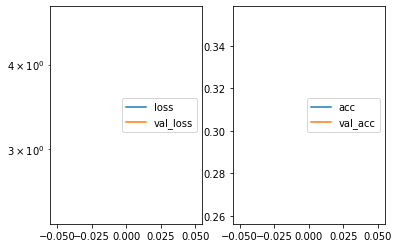

Predicted cell: MacroCheate Probability: [[0.999881]]
True Cell type: MacroCheate
X [[0.23642574]]
True positional value X 0.3148148148148148
Y [[0.1656439]]
True positional value Y 0.3148148148148148
H [[0.7893816]]
True positional value H 0.3888888888888889
W [[0.5794327]]
True positional value W 0.3888888888888889


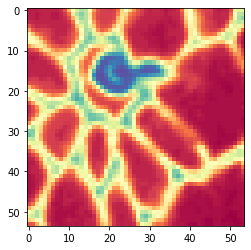

Epoch 2/250
36076/36076 [==============================] - 26s 714us/step - loss: 1.1022 - acc: 0.8110 - val_loss: 0.9975 - val_acc: 0.8668

Epoch 00002: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.9975021965821333, 'val_acc': 0.8667719857889832, 'loss': 1.1022113656995036, 'acc': 0.8110100895658752, 'lr': 1e-04}


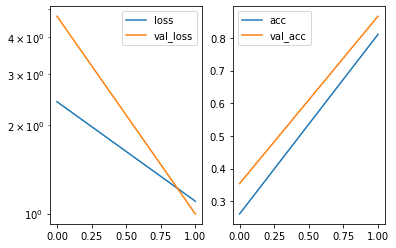

Predicted cell: MatureP1 Probability: [[0.94607174]]
True Cell type: MatureP1
X [[0.69269407]]
True positional value X 0.6851851851851852
Y [[0.6772778]]
True positional value Y 0.6851851851851852
H [[0.16910633]]
True positional value H 0.2962962962962963
W [[0.17488909]]
True positional value W 0.24074074074074073


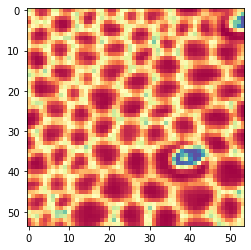

Epoch 3/250
36076/36076 [==============================] - 26s 709us/step - loss: 0.8413 - acc: 0.9389 - val_loss: 0.7919 - val_acc: 0.9542

Epoch 00003: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.7918966814616657, 'val_acc': 0.9541864126465583, 'loss': 0.8413003033644768, 'acc': 0.9388790353727864, 'lr': 1e-04}


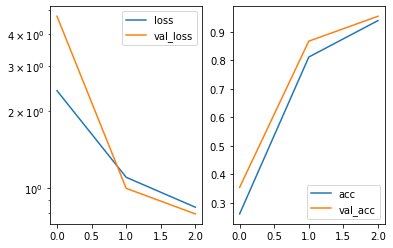

Predicted cell: MatureP1 Probability: [[0.99158114]]
True Cell type: MatureP1
X [[0.5112029]]
True positional value X 0.5
Y [[0.49567255]]
True positional value Y 0.5
H [[0.33079863]]
True positional value H 0.3148148148148148
W [[0.34669513]]
True positional value W 0.35185185185185186


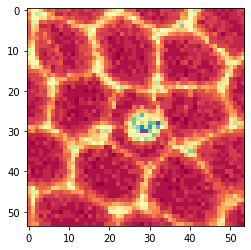

Epoch 4/250
36076/36076 [==============================] - 26s 710us/step - loss: 0.7505 - acc: 0.9675 - val_loss: 0.7579 - val_acc: 0.9695

Epoch 00004: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.7579269852369569, 'val_acc': 0.9694576185273145, 'loss': 0.7504945383168123, 'acc': 0.9674575954811154, 'lr': 1e-04}


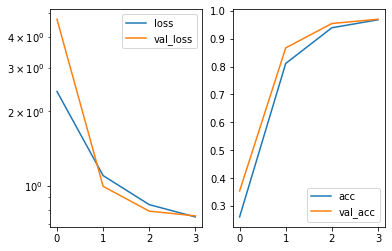

Predicted cell: NonMatureP1 Probability: [[0.9906934]]
True Cell type: NonMatureP1
X [[0.3334668]]
True positional value X 0.3148148148148148
Y [[0.50584453]]
True positional value Y 0.5
H [[0.35138008]]
True positional value H 0.2962962962962963
W [[0.33984846]]
True positional value W 0.35185185185185186


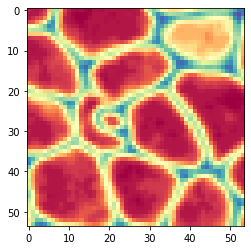

Epoch 5/250
36076/36076 [==============================] - 26s 713us/step - loss: 0.7001 - acc: 0.9788 - val_loss: 0.6958 - val_acc: 0.9779

Epoch 00005: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.6958315887220161, 'val_acc': 0.9778831049038775, 'loss': 0.7001111593065643, 'acc': 0.9788224966685436, 'lr': 1e-04}


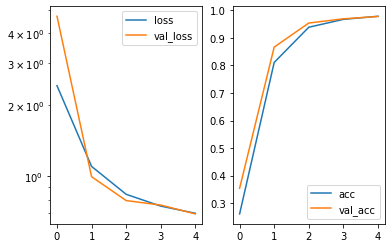

Predicted cell: MatureP1 Probability: [[0.9981989]]
True Cell type: MatureP1
X [[0.4950968]]
True positional value X 0.5
Y [[0.510807]]
True positional value Y 0.5
H [[0.31247094]]
True positional value H 0.2962962962962963
W [[0.30836028]]
True positional value W 0.3148148148148148


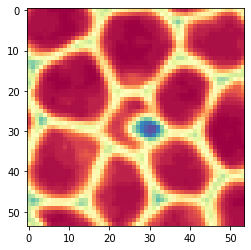

Epoch 6/250
36076/36076 [==============================] - 26s 714us/step - loss: 0.6601 - acc: 0.9872 - val_loss: 0.7123 - val_acc: 0.9689

Epoch 00006: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.7122936485754057, 'val_acc': 0.9689310260858581, 'loss': 0.6600890304934147, 'acc': 0.9871937105972628, 'lr': 1e-04}


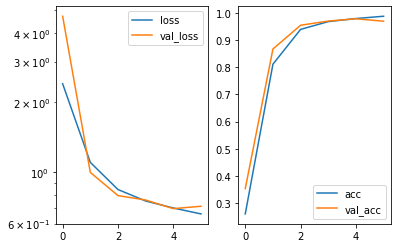

Predicted cell: Normal Probability: [[0.99992085]]
True Cell type: Normal
X [[0.5039258]]
True positional value X 0.5
Y [[0.5136281]]
True positional value Y 0.5
H [[0.4060342]]
True positional value H 0.3888888888888889
W [[0.35341623]]
True positional value W 0.2777777777777778


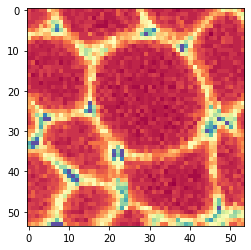

Epoch 7/250
36076/36076 [==============================] - 26s 712us/step - loss: 0.6386 - acc: 0.9891 - val_loss: 0.7002 - val_acc: 0.9810

Epoch 00007: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.7001761578458934, 'val_acc': 0.981042660619787, 'loss': 0.6386435512481818, 'acc': 0.9890509016802761, 'lr': 1e-04}


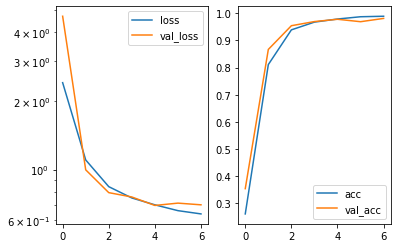

Predicted cell: Normal Probability: [[0.9965197]]
True Cell type: Normal
X [[0.49142194]]
True positional value X 0.5
Y [[0.46172488]]
True positional value Y 0.5
H [[0.24007411]]
True positional value H 0.2777777777777778
W [[0.26226717]]
True positional value W 0.3148148148148148


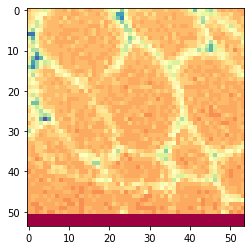

Epoch 8/250
36076/36076 [==============================] - 26s 713us/step - loss: 0.6107 - acc: 0.9925 - val_loss: 0.6522 - val_acc: 0.9858

Epoch 00008: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.6521741050428438, 'val_acc': 0.9857820009419389, 'loss': 0.610738658775497, 'acc': 0.9925435259715194, 'lr': 1e-04}


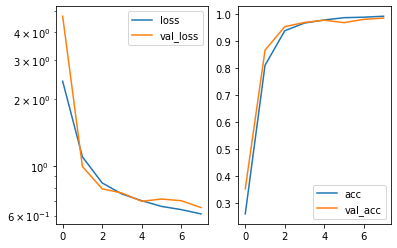

Predicted cell: MacroCheate Probability: [[1.]]
True Cell type: MacroCheate
X [[0.4978534]]
True positional value X 0.5
Y [[0.3420089]]
True positional value Y 0.3148148148148148
H [[0.47847852]]
True positional value H 0.4074074074074074
W [[0.45197493]]
True positional value W 0.5185185185185185


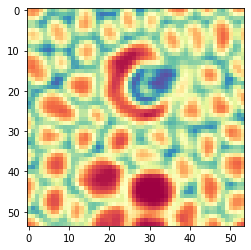

Epoch 9/250
36076/36076 [==============================] - 26s 716us/step - loss: 0.5909 - acc: 0.9936 - val_loss: 0.6965 - val_acc: 0.9879

Epoch 00009: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.6965009005462702, 'val_acc': 0.9878883707077645, 'loss': 0.5908593926002557, 'acc': 0.9935968568219566, 'lr': 1e-04}


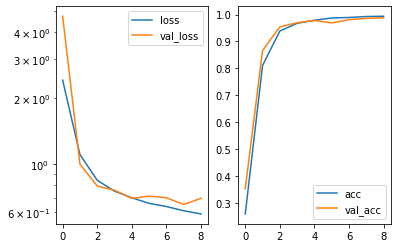

Predicted cell: MatureP1 Probability: [[0.99818987]]
True Cell type: MatureP1
X [[0.6856313]]
True positional value X 0.6851851851851852
Y [[0.50299656]]
True positional value Y 0.5
H [[0.33195367]]
True positional value H 0.35185185185185186
W [[0.2520368]]
True positional value W 0.3333333333333333


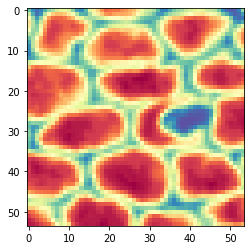

Epoch 10/250
36076/36076 [==============================] - 26s 714us/step - loss: 0.5731 - acc: 0.9958 - val_loss: 0.6210 - val_acc: 0.9863

Epoch 00010: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.6210035228804578, 'val_acc': 0.9863085913118279, 'loss': 0.5730532109836528, 'acc': 0.9957589573653446, 'lr': 1e-04}


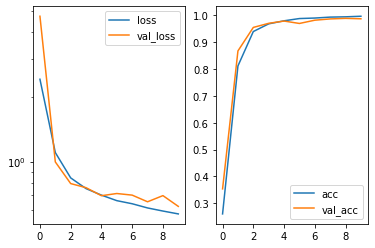

Predicted cell: Normal Probability: [[0.9920522]]
True Cell type: Normal
X [[0.49994642]]
True positional value X 0.5
Y [[0.4867391]]
True positional value Y 0.5
H [[0.2875226]]
True positional value H 0.18518518518518517
W [[0.29311892]]
True positional value W 0.2777777777777778


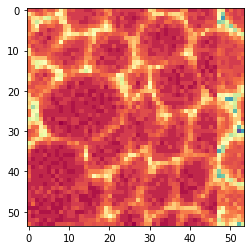

Epoch 11/250
36076/36076 [==============================] - 26s 712us/step - loss: 0.5547 - acc: 0.9971 - val_loss: 0.6096 - val_acc: 0.9884

Epoch 00011: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.609634173424888, 'val_acc': 0.9884149610776535, 'loss': 0.5547347330031949, 'acc': 0.9971171997777506, 'lr': 1e-04}


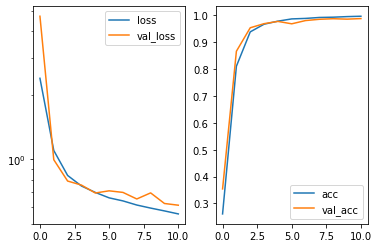

Predicted cell: MacroCheate Probability: [[1.]]
True Cell type: MacroCheate
X [[0.69033915]]
True positional value X 0.6851851851851852
Y [[0.57049847]]
True positional value Y 0.5
H [[0.40680447]]
True positional value H 0.5
W [[0.6474056]]
True positional value W 0.7037037037037037


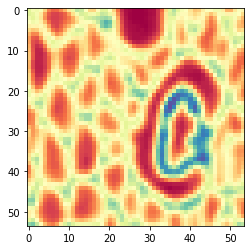

Epoch 12/250
36076/36076 [==============================] - 26s 710us/step - loss: 0.5408 - acc: 0.9980 - val_loss: 0.5986 - val_acc: 0.9900

Epoch 00012: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.5985626136710481, 'val_acc': 0.9899947415407612, 'loss': 0.5407819541069789, 'acc': 0.9980042152307503, 'lr': 1e-04}


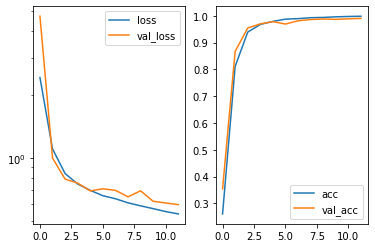

Predicted cell: MacroCheate Probability: [[0.9999989]]
True Cell type: MacroCheate
X [[0.51699495]]
True positional value X 0.5
Y [[0.688946]]
True positional value Y 0.6851851851851852
H [[0.37056562]]
True positional value H 0.35185185185185186
W [[0.45489034]]
True positional value W 0.4074074074074074


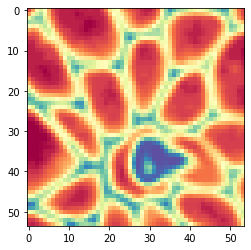

Epoch 13/250
36076/36076 [==============================] - 26s 715us/step - loss: 0.5315 - acc: 0.9986 - val_loss: 0.6119 - val_acc: 0.9884

Epoch 00013: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.6118832423600352, 'val_acc': 0.988414964216392, 'loss': 0.5315089510806001, 'acc': 0.9985585998888753, 'lr': 1e-04}


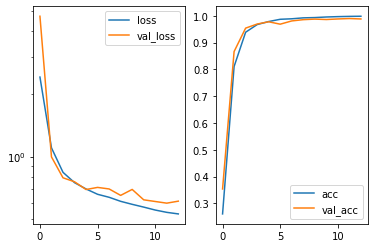

Predicted cell: MatureP1 Probability: [[0.9929698]]
True Cell type: MatureP1
X [[0.3809795]]
True positional value X 0.3148148148148148
Y [[0.48001882]]
True positional value Y 0.5
H [[0.4292117]]
True positional value H 0.37037037037037035
W [[0.48079124]]
True positional value W 0.48148148148148145


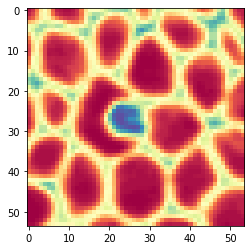

Epoch 14/250
36076/36076 [==============================] - 26s 717us/step - loss: 0.5245 - acc: 0.9983 - val_loss: 0.5962 - val_acc: 0.9884

Epoch 00014: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.5962088835622337, 'val_acc': 0.988414964216392, 'loss': 0.5244796889123559, 'acc': 0.9983368460256253, 'lr': 1e-04}


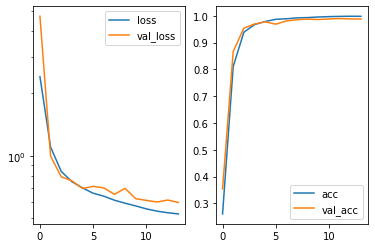

Predicted cell: MatureP1 Probability: [[0.9763737]]
True Cell type: MatureP1
X [[0.33499008]]
True positional value X 0.3148148148148148
Y [[0.66175556]]
True positional value Y 0.6851851851851852
H [[0.28549337]]
True positional value H 0.2777777777777778
W [[0.31441492]]
True positional value W 0.3148148148148148


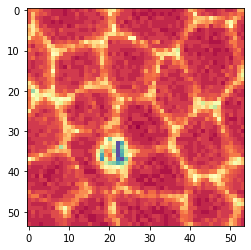

Epoch 15/250
36076/36076 [==============================] - 26s 716us/step - loss: 0.5165 - acc: 0.9984 - val_loss: 0.5813 - val_acc: 0.9900

Epoch 00015: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.5812776803091491, 'val_acc': 0.9899947425765449, 'loss': 0.5164887645197279, 'acc': 0.9984477229572503, 'lr': 1e-04}


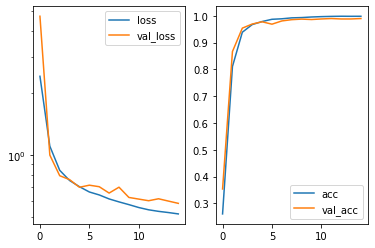

Predicted cell: NonMatureP1 Probability: [[0.9999293]]
True Cell type: NonMatureP1
X [[0.69996065]]
True positional value X 0.6851851851851852
Y [[0.70648456]]
True positional value Y 0.6851851851851852
H [[0.32454267]]
True positional value H 0.35185185185185186
W [[0.39931586]]
True positional value W 0.4074074074074074


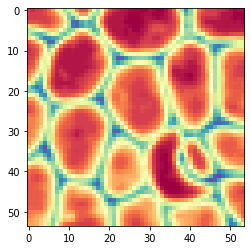

Epoch 16/250
36076/36076 [==============================] - 26s 717us/step - loss: 0.5077 - acc: 0.9989 - val_loss: 0.5893 - val_acc: 0.9831

Epoch 00016: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.5893450452190377, 'val_acc': 0.9831490345601348, 'loss': 0.5076949156491161, 'acc': 0.9989466691033012, 'lr': 1e-04}


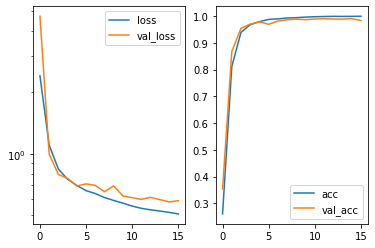

Predicted cell: Normal Probability: [[0.9997483]]
True Cell type: Normal
X [[0.49131435]]
True positional value X 0.5
Y [[0.49976543]]
True positional value Y 0.5
H [[0.16261798]]
True positional value H 0.2222222222222222
W [[0.16704942]]
True positional value W 0.2222222222222222


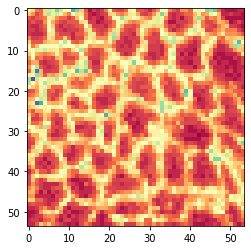

Epoch 17/250
36076/36076 [==============================] - 26s 715us/step - loss: 0.5034 - acc: 0.9991 - val_loss: 0.6179 - val_acc: 0.9916

Epoch 00017: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.6178758059004974, 'val_acc': 0.991574519900914, 'loss': 0.5033980703053843, 'acc': 0.9990852653140939, 'lr': 1e-04}


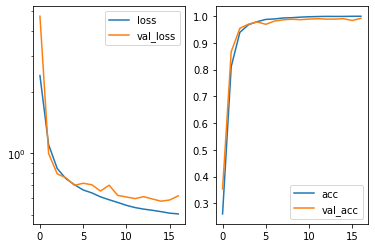

Predicted cell: MacroCheate Probability: [[1.]]
True Cell type: MacroCheate
X [[0.6817109]]
True positional value X 0.6851851851851852
Y [[0.48251525]]
True positional value Y 0.5
H [[0.8174361]]
True positional value H 0.8333333333333334
W [[0.8424276]]
True positional value W 0.7962962962962963


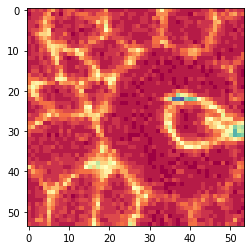

Epoch 18/250
36076/36076 [==============================] - 26s 714us/step - loss: 0.4980 - acc: 0.9991 - val_loss: 0.5662 - val_acc: 0.9916

Epoch 00018: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.5662435544924462, 'val_acc': 0.991574519900914, 'loss': 0.49799202015611677, 'acc': 0.9991407037799064, 'lr': 1e-04}


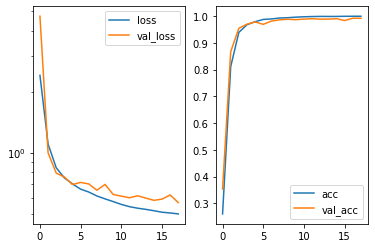

Predicted cell: MatureP1 Probability: [[0.9999969]]
True Cell type: MatureP1
X [[0.48319834]]
True positional value X 0.5
Y [[0.50354534]]
True positional value Y 0.5
H [[0.29068077]]
True positional value H 0.2222222222222222
W [[0.2421282]]
True positional value W 0.2222222222222222


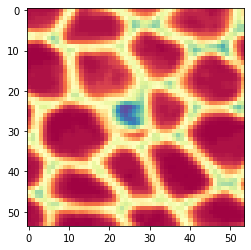

Epoch 19/250
36076/36076 [==============================] - 26s 714us/step - loss: 0.4930 - acc: 0.9989 - val_loss: 0.5664 - val_acc: 0.9921

Epoch 00019: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.5664284493560349, 'val_acc': 0.9921011113065867, 'loss': 0.49296650255462626, 'acc': 0.9989189499166564, 'lr': 1e-04}


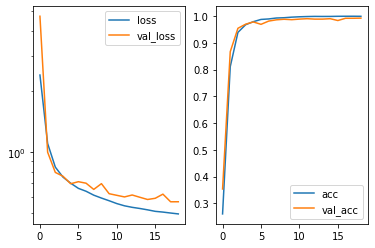

Predicted cell: MatureP1 Probability: [[0.9999912]]
True Cell type: MatureP1
X [[0.6792896]]
True positional value X 0.6851851851851852
Y [[0.49739867]]
True positional value Y 0.5
H [[0.28356516]]
True positional value H 0.2777777777777778
W [[0.34109282]]
True positional value W 0.3888888888888889


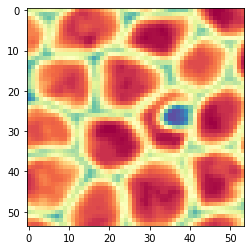

Epoch 20/250
36076/36076 [==============================] - 26s 709us/step - loss: 0.4896 - acc: 0.9989 - val_loss: 0.5797 - val_acc: 0.9926

Epoch 00020: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.5797414751100566, 'val_acc': 0.9926277047838268, 'loss': 0.4895918994947024, 'acc': 0.9989466691495626, 'lr': 1e-04}


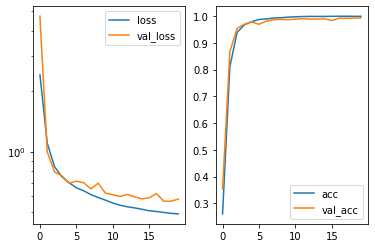

Predicted cell: MacroCheate Probability: [[0.99999964]]
True Cell type: MacroCheate
X [[0.31577805]]
True positional value X 0.3148148148148148
Y [[0.691041]]
True positional value Y 0.6851851851851852
H [[0.54972494]]
True positional value H 0.5
W [[0.8330473]]
True positional value W 0.9444444444444444


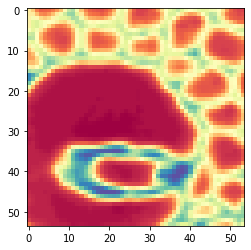

Epoch 21/250
36076/36076 [==============================] - 26s 714us/step - loss: 0.4863 - acc: 0.9991 - val_loss: 0.6091 - val_acc: 0.9805

Epoch 00021: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.6090680776990797, 'val_acc': 0.9805160754915914, 'loss': 0.48628664634645163, 'acc': 0.9990852653140939, 'lr': 1e-04}


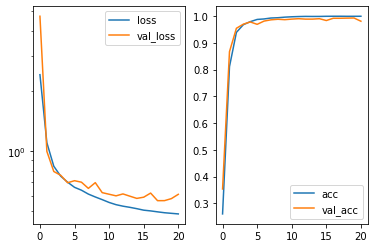

Predicted cell: Normal Probability: [[0.78783256]]
True Cell type: Normal
X [[0.4982258]]
True positional value X 0.5
Y [[0.5167687]]
True positional value Y 0.5
H [[0.37215322]]
True positional value H 0.3148148148148148
W [[0.46860662]]
True positional value W 0.3333333333333333


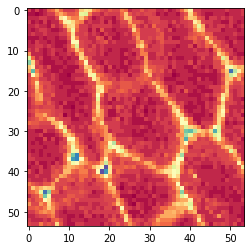

Epoch 22/250
36076/36076 [==============================] - 26s 712us/step - loss: 0.4814 - acc: 0.9993 - val_loss: 0.5659 - val_acc: 0.9910

Epoch 00022: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.5658883271624127, 'val_acc': 0.9910479264236739, 'loss': 0.4813705986362165, 'acc': 0.9992792999444376, 'lr': 1e-04}


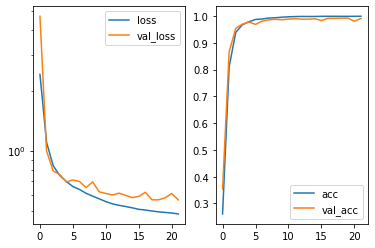

Predicted cell: MacroCheate Probability: [[1.]]
True Cell type: MacroCheate
X [[0.31098917]]
True positional value X 0.3148148148148148
Y [[0.46496385]]
True positional value Y 0.5
H [[0.65381634]]
True positional value H 0.6851851851851852
W [[0.62276864]]
True positional value W 0.7777777777777778


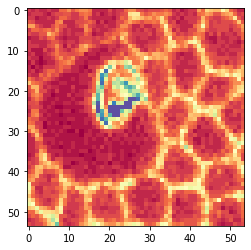

Epoch 23/250
36076/36076 [==============================] - 26s 713us/step - loss: 0.4779 - acc: 0.9991 - val_loss: 0.5564 - val_acc: 0.9910

Epoch 00023: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.5564215635550279, 'val_acc': 0.9910479274594577, 'loss': 0.4779207347660401, 'acc': 0.9991407037799064, 'lr': 1e-04}


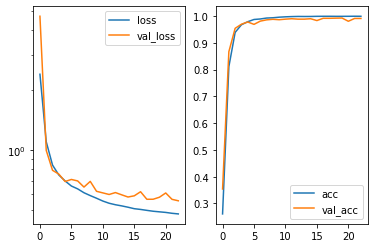

Predicted cell: NonMatureP1 Probability: [[0.99998677]]
True Cell type: NonMatureP1
X [[0.5189494]]
True positional value X 0.5
Y [[0.46730566]]
True positional value Y 0.5
H [[0.4323739]]
True positional value H 0.35185185185185186
W [[0.33513406]]
True positional value W 0.2962962962962963


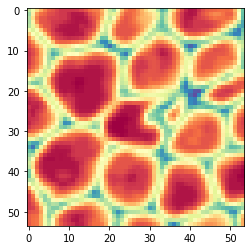

Epoch 24/250
36076/36076 [==============================] - 26s 711us/step - loss: 0.4757 - acc: 0.9993 - val_loss: 0.5645 - val_acc: 0.9889

Epoch 00024: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.5645296489206849, 'val_acc': 0.9889415535191098, 'loss': 0.4756992742847162, 'acc': 0.9993070191773439, 'lr': 1e-04}


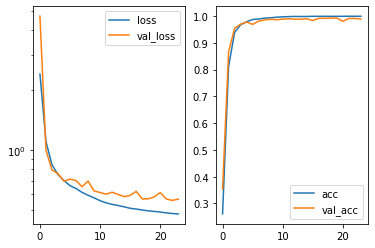

Predicted cell: Normal Probability: [[0.9999502]]
True Cell type: Normal
X [[0.5055183]]
True positional value X 0.5
Y [[0.48952407]]
True positional value Y 0.5
H [[0.27035093]]
True positional value H 0.2962962962962963
W [[0.338679]]
True positional value W 0.35185185185185186


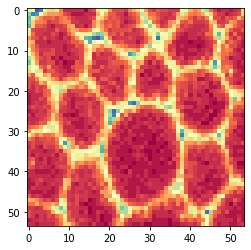

Epoch 25/250
36076/36076 [==============================] - 26s 712us/step - loss: 0.4703 - acc: 0.9993 - val_loss: 0.5669 - val_acc: 0.9916

Epoch 00025: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.5668611861078786, 'val_acc': 0.991574519900914, 'loss': 0.47028289879223556, 'acc': 0.9993347384102501, 'lr': 1e-04}


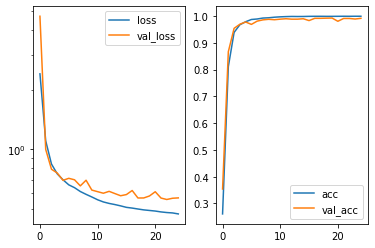

Predicted cell: MatureP1 Probability: [[0.99834716]]
True Cell type: MatureP1
X [[0.51499134]]
True positional value X 0.5
Y [[0.29132882]]
True positional value Y 0.3148148148148148
H [[0.4825334]]
True positional value H 0.48148148148148145
W [[0.43120658]]
True positional value W 0.35185185185185186


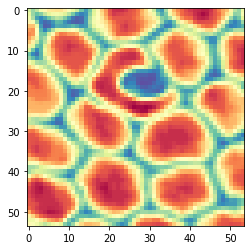

Epoch 26/250
36076/36076 [==============================] - 26s 710us/step - loss: 0.4691 - acc: 0.9993 - val_loss: 0.5899 - val_acc: 0.9874

Epoch 00026: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.5898611678959131, 'val_acc': 0.9873617761947406, 'loss': 0.4691340686252157, 'acc': 0.9993070191773439, 'lr': 1e-04}


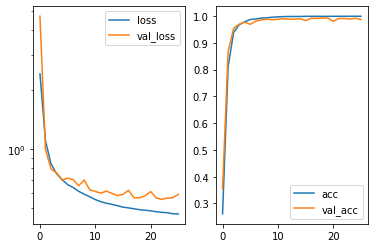

Predicted cell: NonMatureP1 Probability: [[0.9972504]]
True Cell type: NonMatureP1
X [[0.4946525]]
True positional value X 0.5
Y [[0.5406613]]
True positional value Y 0.5
H [[0.18727744]]
True positional value H 0.18518518518518517
W [[0.19478177]]
True positional value W 0.2037037037037037


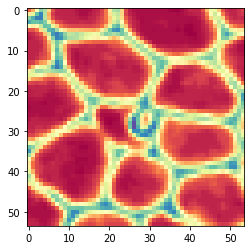

Epoch 27/250
36076/36076 [==============================] - 26s 710us/step - loss: 0.4652 - acc: 0.9993 - val_loss: 0.5512 - val_acc: 0.9910

Epoch 00027: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.5511742871393964, 'val_acc': 0.9910479243207191, 'loss': 0.4652231155947051, 'acc': 0.9993347384102501, 'lr': 1e-04}


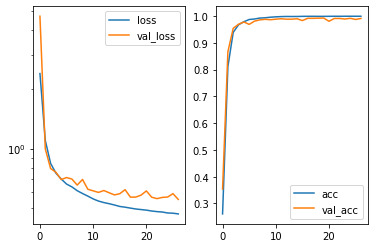

Predicted cell: NonMatureP1 Probability: [[0.9895601]]
True Cell type: NonMatureP1
X [[0.55600953]]
True positional value X 0.5
Y [[0.35223842]]
True positional value Y 0.3148148148148148
H [[0.48471832]]
True positional value H 0.42592592592592593
W [[0.3818311]]
True positional value W 0.4074074074074074


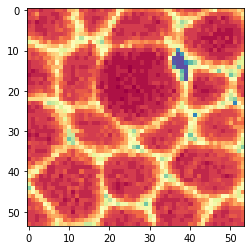

Epoch 28/250
36076/36076 [==============================] - 26s 711us/step - loss: 0.4627 - acc: 0.9993 - val_loss: 0.5735 - val_acc: 0.9853

Epoch 00028: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.5735216796115676, 'val_acc': 0.9852554095676537, 'loss': 0.4626682601478362, 'acc': 0.9993070191773439, 'lr': 1e-04}


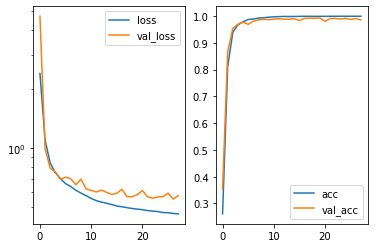

Predicted cell: NonMatureP1 Probability: [[0.99998343]]
True Cell type: NonMatureP1
X [[0.5215694]]
True positional value X 0.5
Y [[0.6975766]]
True positional value Y 0.6851851851851852
H [[0.42444783]]
True positional value H 0.46296296296296297
W [[0.35979697]]
True positional value W 0.3148148148148148


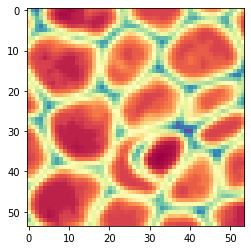

Epoch 29/250
36076/36076 [==============================] - 26s 712us/step - loss: 0.4606 - acc: 0.9993 - val_loss: 0.5541 - val_acc: 0.9926

Epoch 00029: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.5540860637418216, 'val_acc': 0.9926277047838268, 'loss': 0.4605823425353664, 'acc': 0.9992792999444376, 'lr': 1e-04}


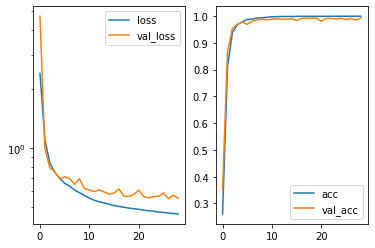

Predicted cell: MacroCheate Probability: [[0.9999994]]
True Cell type: MacroCheate
X [[0.31672713]]
True positional value X 0.3148148148148148
Y [[0.6895433]]
True positional value Y 0.6851851851851852
H [[0.52917916]]
True positional value H 0.5555555555555556
W [[0.5781382]]
True positional value W 0.5740740740740741


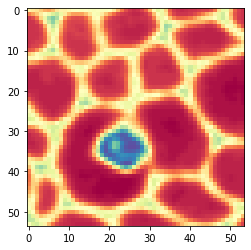

Epoch 30/250
36076/36076 [==============================] - 26s 712us/step - loss: 0.4571 - acc: 0.9993 - val_loss: 0.5520 - val_acc: 0.9895

Epoch 00030: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.5520413088886408, 'val_acc': 0.9894681459605662, 'loss': 0.4571058793274919, 'acc': 0.9993347384102501, 'lr': 1e-04}


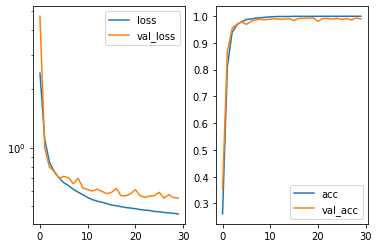

Predicted cell: NonMatureP1 Probability: [[0.9999838]]
True Cell type: NonMatureP1
X [[0.5085401]]
True positional value X 0.5
Y [[0.51623344]]
True positional value Y 0.5
H [[0.29013565]]
True positional value H 0.25925925925925924
W [[0.30527252]]
True positional value W 0.24074074074074073


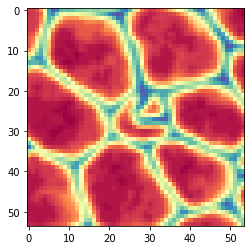

Epoch 31/250
36076/36076 [==============================] - 26s 711us/step - loss: 0.4557 - acc: 0.9993 - val_loss: 0.5510 - val_acc: 0.9916

Epoch 00031: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.5509939791341403, 'val_acc': 0.991574519900914, 'loss': 0.4556521216713281, 'acc': 0.9993070191773439, 'lr': 1e-04}


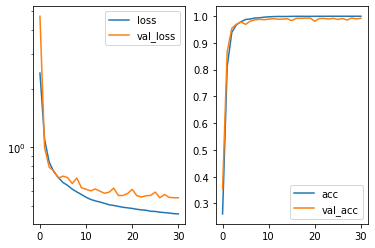

Predicted cell: MacroCheate Probability: [[1.]]
True Cell type: MacroCheate
X [[0.28818113]]
True positional value X 0.3148148148148148
Y [[0.5294126]]
True positional value Y 0.5
H [[0.91643226]]
True positional value H 0.8518518518518519
W [[0.89385253]]
True positional value W 0.8888888888888888


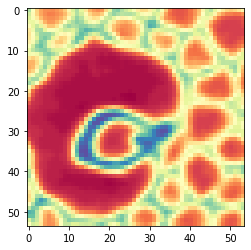

Epoch 32/250
36076/36076 [==============================] - 26s 711us/step - loss: 0.4539 - acc: 0.9991 - val_loss: 0.5539 - val_acc: 0.9905

Epoch 00032: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.5538779611396689, 'val_acc': 0.9905213318792627, 'loss': 0.4538805365582265, 'acc': 0.9991129845470001, 'lr': 1e-04}


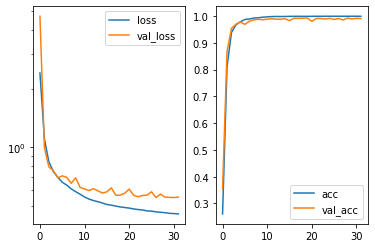

Predicted cell: NonMatureP1 Probability: [[0.9999194]]
True Cell type: NonMatureP1
X [[0.60941094]]
True positional value X 0.6851851851851852
Y [[0.64974993]]
True positional value Y 0.6851851851851852
H [[0.23707798]]
True positional value H 0.2777777777777778
W [[0.3615216]]
True positional value W 0.42592592592592593


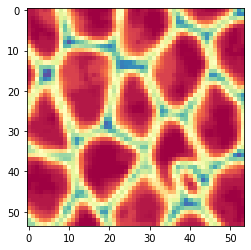

Epoch 33/250
36076/36076 [==============================] - 26s 710us/step - loss: 0.4511 - acc: 0.9993 - val_loss: 0.5493 - val_acc: 0.9926

Epoch 00033: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.5492529447860879, 'val_acc': 0.9926277047838268, 'loss': 0.4510673537548028, 'acc': 0.9992515806652699, 'lr': 1e-04}


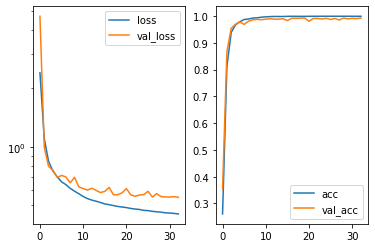

Predicted cell: MatureP1 Probability: [[0.9971111]]
True Cell type: MatureP1
X [[0.49872494]]
True positional value X 0.5
Y [[0.50931585]]
True positional value Y 0.5
H [[0.46476763]]
True positional value H 0.4444444444444444
W [[0.5128592]]
True positional value W 0.4444444444444444


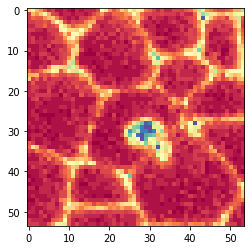

Epoch 34/250
36076/36076 [==============================] - 26s 713us/step - loss: 0.4491 - acc: 0.9994 - val_loss: 0.5628 - val_acc: 0.9932

Epoch 00034: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.5628294441623396, 'val_acc': 0.9931542982610669, 'loss': 0.4491243256818351, 'acc': 0.9994178961089688, 'lr': 1e-04}


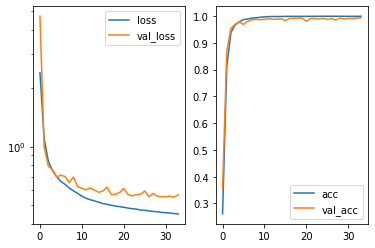

Predicted cell: MatureP1 Probability: [[0.99999976]]
True Cell type: MatureP1
X [[0.4986788]]
True positional value X 0.5
Y [[0.31145468]]
True positional value Y 0.3148148148148148
H [[0.43265915]]
True positional value H 0.46296296296296297
W [[0.3612723]]
True positional value W 0.35185185185185186


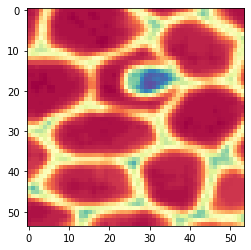

Epoch 35/250
36076/36076 [==============================] - 26s 714us/step - loss: 0.4505 - acc: 0.9989 - val_loss: 0.5700 - val_acc: 0.9926

Epoch 00035: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.5699924347964382, 'val_acc': 0.9926277047838268, 'loss': 0.4504700636490973, 'acc': 0.9988635114045825, 'lr': 1e-04}


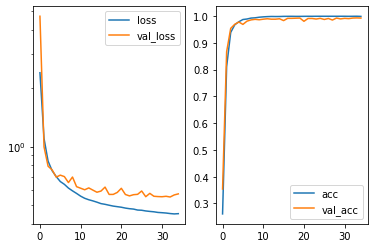

Predicted cell: MatureP1 Probability: [[0.9999925]]
True Cell type: MatureP1
X [[0.32488158]]
True positional value X 0.3148148148148148
Y [[0.6797041]]
True positional value Y 0.6851851851851852
H [[0.3182568]]
True positional value H 0.3148148148148148
W [[0.2243127]]
True positional value W 0.2777777777777778


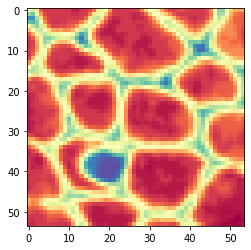

Epoch 36/250
36076/36076 [==============================] - 26s 712us/step - loss: 0.4492 - acc: 0.9991 - val_loss: 0.5457 - val_acc: 0.9905

Epoch 00036: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.5456825641659199, 'val_acc': 0.9905213339822175, 'loss': 0.44915394234028133, 'acc': 0.9991407037799064, 'lr': 1e-04}


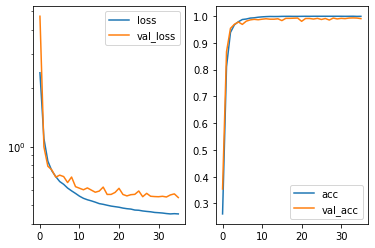

Predicted cell: MatureP1 Probability: [[0.99973506]]
True Cell type: MatureP1
X [[0.71018946]]
True positional value X 0.6851851851851852
Y [[0.3206947]]
True positional value Y 0.3148148148148148
H [[0.34378412]]
True positional value H 0.3148148148148148
W [[0.2868827]]
True positional value W 0.25925925925925924


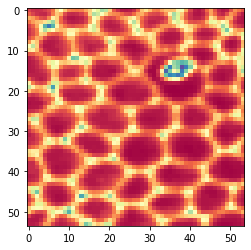

Epoch 37/250
36076/36076 [==============================] - 26s 714us/step - loss: 0.4441 - acc: 0.9994 - val_loss: 0.5547 - val_acc: 0.9900

Epoch 00037: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.5546711687981424, 'val_acc': 0.9899947425765449, 'loss': 0.4440975653740582, 'acc': 0.9994178961089688, 'lr': 1e-04}


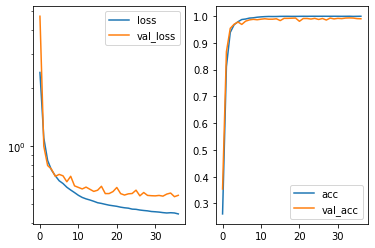

Predicted cell: MatureP1 Probability: [[0.99957174]]
True Cell type: MatureP1
X [[0.6937762]]
True positional value X 0.6851851851851852
Y [[0.32744962]]
True positional value Y 0.3148148148148148
H [[0.33878398]]
True positional value H 0.2777777777777778
W [[0.31256196]]
True positional value W 0.25925925925925924


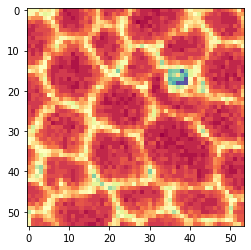

Epoch 38/250
36076/36076 [==============================] - 26s 711us/step - loss: 0.4421 - acc: 0.9994 - val_loss: 0.5426 - val_acc: 0.9921

Epoch 00038: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.5426043500204724, 'val_acc': 0.9921011123423704, 'loss': 0.4421293255078421, 'acc': 0.9993901768760626, 'lr': 1e-04}


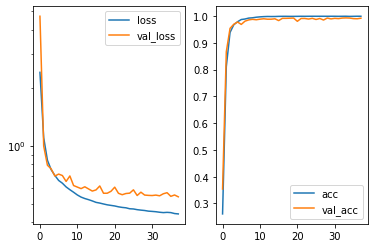

Predicted cell: Normal Probability: [[0.99999714]]
True Cell type: Normal
X [[0.4980328]]
True positional value X 0.5
Y [[0.49833107]]
True positional value Y 0.5
H [[0.3475552]]
True positional value H 0.2777777777777778
W [[0.4366286]]
True positional value W 0.46296296296296297


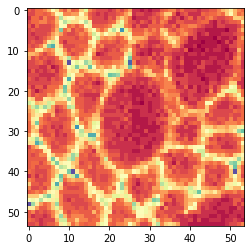

Epoch 39/250
36076/36076 [==============================] - 26s 712us/step - loss: 0.4406 - acc: 0.9992 - val_loss: 0.5422 - val_acc: 0.9932

Epoch 00039: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.5422410373313606, 'val_acc': 0.9931542972252833, 'loss': 0.4405582810647076, 'acc': 0.9992238614786252, 'lr': 1e-04}


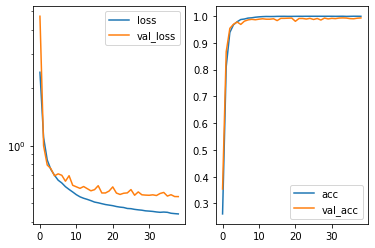

Predicted cell: Normal Probability: [[0.9999994]]
True Cell type: Normal
X [[0.49228948]]
True positional value X 0.5
Y [[0.5107644]]
True positional value Y 0.5
H [[0.43223324]]
True positional value H 0.3888888888888889
W [[0.38624603]]
True positional value W 0.3888888888888889


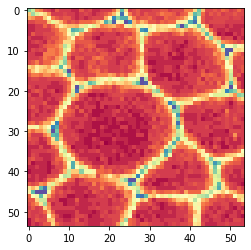

Epoch 40/250
36076/36076 [==============================] - 26s 712us/step - loss: 0.4388 - acc: 0.9994 - val_loss: 0.5425 - val_acc: 0.9916

Epoch 00040: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.5424856444984565, 'val_acc': 0.991574519900914, 'loss': 0.43877315852670873, 'acc': 0.9993901768760626, 'lr': 1e-04}


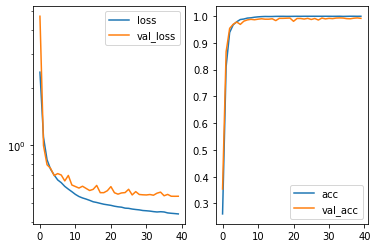

Predicted cell: MacroCheate Probability: [[0.9999999]]
True Cell type: MacroCheate
X [[0.31195378]]
True positional value X 0.3148148148148148
Y [[0.33281642]]
True positional value Y 0.3148148148148148
H [[0.8891943]]
True positional value H 0.8518518518518519
W [[0.909166]]
True positional value W 0.9074074074074074


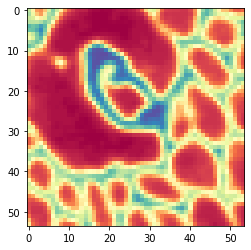

Epoch 41/250
36076/36076 [==============================] - 26s 717us/step - loss: 0.4382 - acc: 0.9991 - val_loss: 0.5502 - val_acc: 0.9910

Epoch 00041: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.5502021748998279, 'val_acc': 0.9910479243207191, 'loss': 0.4381701801063507, 'acc': 0.9991129845470001, 'lr': 1e-04}


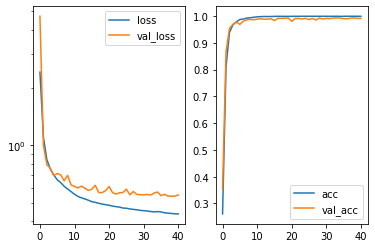

Predicted cell: MatureP1 Probability: [[0.99998164]]
True Cell type: MatureP1
X [[0.6931671]]
True positional value X 0.6851851851851852
Y [[0.33182928]]
True positional value Y 0.3148148148148148
H [[0.39878303]]
True positional value H 0.4074074074074074
W [[0.3243422]]
True positional value W 0.2962962962962963


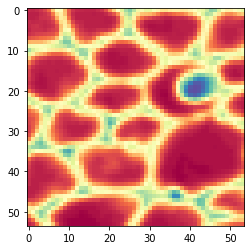

Epoch 42/250
36076/36076 [==============================] - 26s 717us/step - loss: 0.4360 - acc: 0.9993 - val_loss: 0.5445 - val_acc: 0.9926

Epoch 00042: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.544477235869146, 'val_acc': 0.9926277047838268, 'loss': 0.43602437887570855, 'acc': 0.9993070191773439, 'lr': 1e-04}


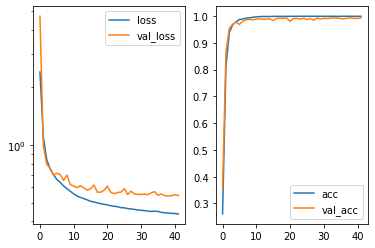

Predicted cell: Normal Probability: [[0.9997621]]
True Cell type: Normal
X [[0.47037265]]
True positional value X 0.5
Y [[0.58275765]]
True positional value Y 0.5
H [[0.30684412]]
True positional value H 0.35185185185185186
W [[0.41988906]]
True positional value W 0.37037037037037035


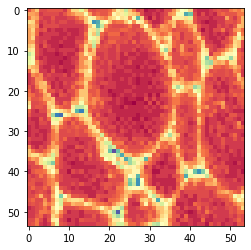

Epoch 43/250
36076/36076 [==============================] - 26s 713us/step - loss: 0.4338 - acc: 0.9993 - val_loss: 0.5332 - val_acc: 0.9926

Epoch 00043: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.533224086123683, 'val_acc': 0.9926277047838268, 'loss': 0.43375497787103695, 'acc': 0.9993347384102501, 'lr': 1e-04}


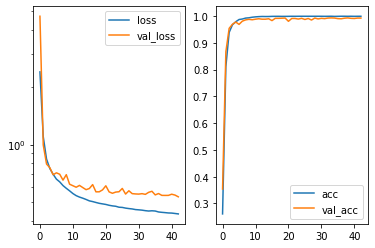

Predicted cell: NonMatureP1 Probability: [[0.9999851]]
True Cell type: NonMatureP1
X [[0.6158198]]
True positional value X 0.6851851851851852
Y [[0.65521085]]
True positional value Y 0.6851851851851852
H [[0.2404444]]
True positional value H 0.2777777777777778
W [[0.35515246]]
True positional value W 0.42592592592592593


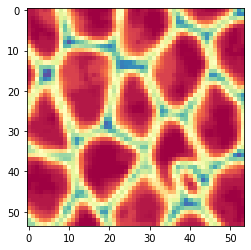

Epoch 44/250
36076/36076 [==============================] - 26s 712us/step - loss: 0.4328 - acc: 0.9994 - val_loss: 0.5417 - val_acc: 0.9926

Epoch 00044: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.5417026649844715, 'val_acc': 0.9926277047838268, 'loss': 0.43276088444154853, 'acc': 0.9993624576431563, 'lr': 1e-04}


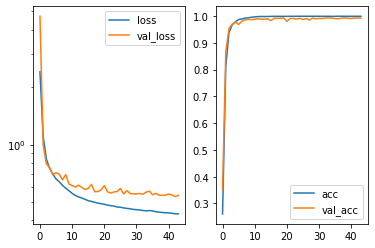

Predicted cell: MatureP1 Probability: [[0.9999577]]
True Cell type: MatureP1
X [[0.49299565]]
True positional value X 0.5
Y [[0.46987623]]
True positional value Y 0.5
H [[0.5286833]]
True positional value H 0.5185185185185185
W [[0.46236125]]
True positional value W 0.4074074074074074


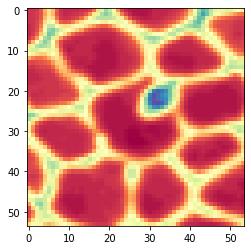

Epoch 45/250
36076/36076 [==============================] - 26s 718us/step - loss: 0.4317 - acc: 0.9993 - val_loss: 0.5330 - val_acc: 0.9921

Epoch 00045: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.5329564204336531, 'val_acc': 0.9921011123423704, 'loss': 0.43167710261303144, 'acc': 0.9992792999444376, 'lr': 1e-04}


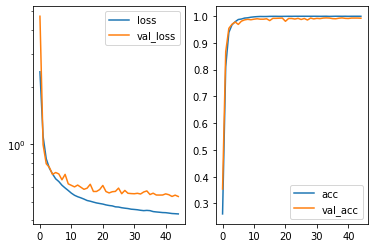

Predicted cell: MatureP1 Probability: [[0.99996305]]
True Cell type: MatureP1
X [[0.49571604]]
True positional value X 0.5
Y [[0.3241276]]
True positional value Y 0.3148148148148148
H [[0.30170286]]
True positional value H 0.3148148148148148
W [[0.36764938]]
True positional value W 0.35185185185185186


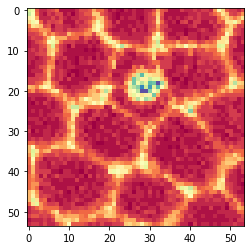

Epoch 46/250
36076/36076 [==============================] - 26s 716us/step - loss: 0.4298 - acc: 0.9993 - val_loss: 0.5348 - val_acc: 0.9932

Epoch 00046: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.5348377821004786, 'val_acc': 0.9931542972252833, 'loss': 0.4297725691547123, 'acc': 0.9993070191773439, 'lr': 1e-04}


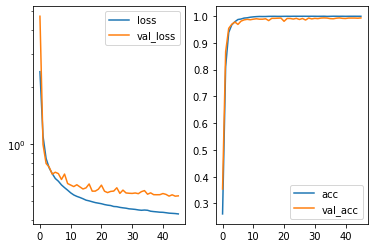

Predicted cell: MatureP1 Probability: [[0.99999857]]
True Cell type: MatureP1
X [[0.69039047]]
True positional value X 0.6851851851851852
Y [[0.49942473]]
True positional value Y 0.5
H [[0.26640564]]
True positional value H 0.2962962962962963
W [[0.26309288]]
True positional value W 0.2962962962962963


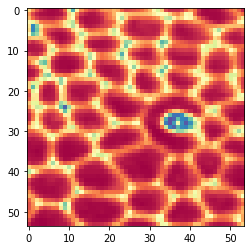

Epoch 47/250
36076/36076 [==============================] - 26s 710us/step - loss: 0.4292 - acc: 0.9993 - val_loss: 0.5384 - val_acc: 0.9926

Epoch 00047: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.5383522445242803, 'val_acc': 0.9926277058196106, 'loss': 0.4292284958820436, 'acc': 0.9993070191773439, 'lr': 1e-04}


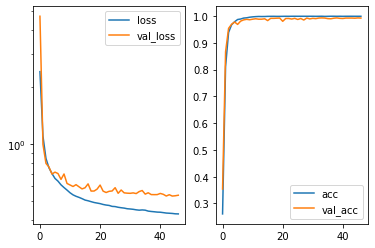

Predicted cell: NonMatureP1 Probability: [[0.99979943]]
True Cell type: NonMatureP1
X [[0.6905091]]
True positional value X 0.6851851851851852
Y [[0.31810343]]
True positional value Y 0.3148148148148148
H [[0.37722135]]
True positional value H 0.4444444444444444
W [[0.3510751]]
True positional value W 0.3888888888888889


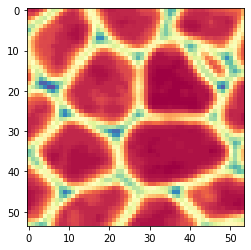

Epoch 48/250
36076/36076 [==============================] - 26s 709us/step - loss: 0.4275 - acc: 0.9993 - val_loss: 0.5424 - val_acc: 0.9889

Epoch 00048: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.5424250834172748, 'val_acc': 0.9889415566578484, 'loss': 0.4274989992053007, 'acc': 0.9993070191773439, 'lr': 1e-04}


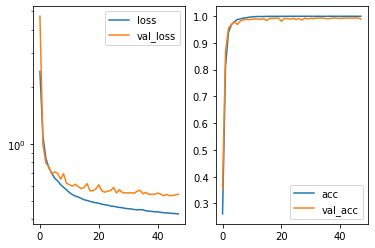

Predicted cell: Normal Probability: [[0.99994147]]
True Cell type: Normal
X [[0.52517474]]
True positional value X 0.5
Y [[0.47481734]]
True positional value Y 0.5
H [[0.40333608]]
True positional value H 0.42592592592592593
W [[0.26766878]]
True positional value W 0.35185185185185186


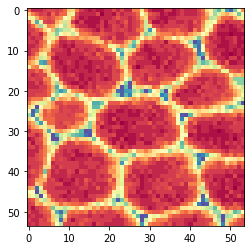

Epoch 49/250
36076/36076 [==============================] - 26s 710us/step - loss: 0.4263 - acc: 0.9994 - val_loss: 0.5354 - val_acc: 0.9921

Epoch 00049: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.5354045939294836, 'val_acc': 0.9921011123423704, 'loss': 0.4262789951114674, 'acc': 0.9993624576431563, 'lr': 1e-04}


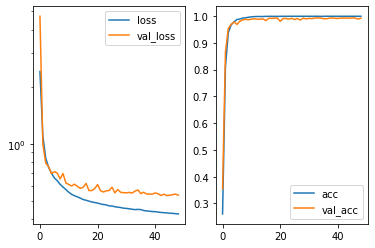

Predicted cell: Normal Probability: [[1.]]
True Cell type: Normal
X [[0.5056795]]
True positional value X 0.5
Y [[0.47786558]]
True positional value Y 0.5
H [[0.29743037]]
True positional value H 0.3333333333333333
W [[0.38092256]]
True positional value W 0.42592592592592593


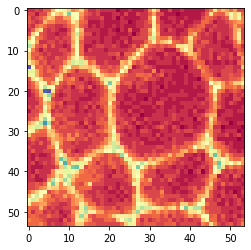

Epoch 50/250
36076/36076 [==============================] - 26s 711us/step - loss: 0.4256 - acc: 0.9994 - val_loss: 0.5303 - val_acc: 0.9916

Epoch 00050: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.5302535061022682, 'val_acc': 0.9915745167621756, 'loss': 0.42561484659996246, 'acc': 0.9993624576431563, 'lr': 1e-04}


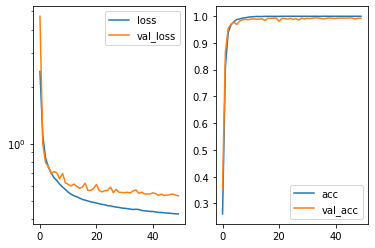

Predicted cell: Normal Probability: [[0.9999995]]
True Cell type: Normal
X [[0.49413025]]
True positional value X 0.5
Y [[0.5150716]]
True positional value Y 0.5
H [[0.2589109]]
True positional value H 0.2777777777777778
W [[0.29417986]]
True positional value W 0.35185185185185186


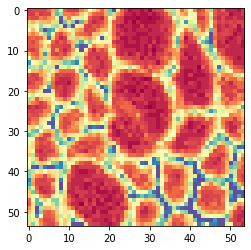

Epoch 51/250
36076/36076 [==============================] - 26s 708us/step - loss: 0.4243 - acc: 0.9994 - val_loss: 0.5262 - val_acc: 0.9921

Epoch 00051: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.5262141923894375, 'val_acc': 0.9921011123423704, 'loss': 0.4242963415778837, 'acc': 0.9993624576431563, 'lr': 1e-04}


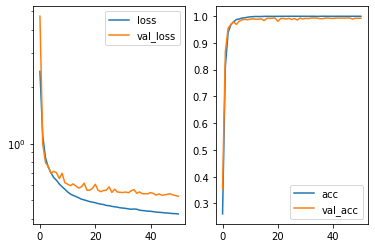

Predicted cell: NonMatureP1 Probability: [[0.99998057]]
True Cell type: NonMatureP1
X [[0.49116325]]
True positional value X 0.5
Y [[0.499677]]
True positional value Y 0.5
H [[0.276941]]
True positional value H 0.3333333333333333
W [[0.22608271]]
True positional value W 0.24074074074074073


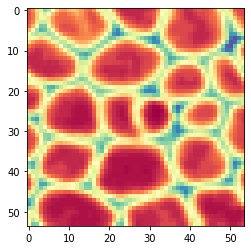

Epoch 52/250
36076/36076 [==============================] - 26s 711us/step - loss: 0.4239 - acc: 0.9992 - val_loss: 0.5330 - val_acc: 0.9910

Epoch 00052: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.5329509463794863, 'val_acc': 0.9910479274594577, 'loss': 0.4238990222103171, 'acc': 0.9992238614786252, 'lr': 1e-04}


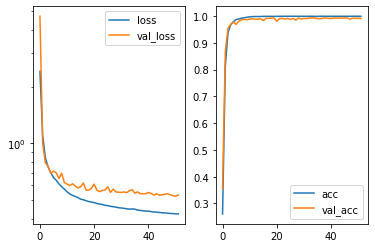

Predicted cell: NonMatureP1 Probability: [[0.99993634]]
True Cell type: NonMatureP1
X [[0.65135026]]
True positional value X 0.6851851851851852
Y [[0.6795763]]
True positional value Y 0.6851851851851852
H [[0.37541872]]
True positional value H 0.37037037037037035
W [[0.39592642]]
True positional value W 0.3888888888888889


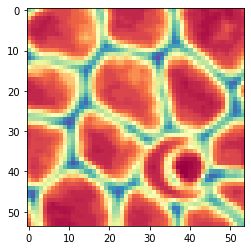

Epoch 53/250
36076/36076 [==============================] - 26s 712us/step - loss: 0.4219 - acc: 0.9994 - val_loss: 0.5339 - val_acc: 0.9916

Epoch 00053: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.5339033579186052, 'val_acc': 0.9915745167621756, 'loss': 0.4219284069579091, 'acc': 0.9994178961089688, 'lr': 1e-04}


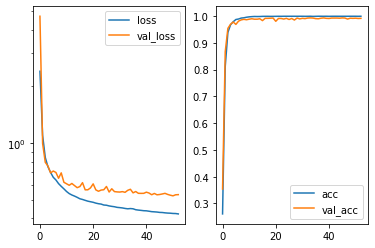

Predicted cell: MatureP1 Probability: [[0.99992347]]
True Cell type: MatureP1
X [[0.33326077]]
True positional value X 0.3148148148148148
Y [[0.52062255]]
True positional value Y 0.5
H [[0.23412357]]
True positional value H 0.2777777777777778
W [[0.2560035]]
True positional value W 0.2962962962962963


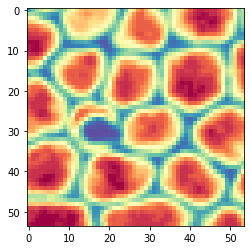

Epoch 54/250
36076/36076 [==============================] - 26s 711us/step - loss: 0.4208 - acc: 0.9995 - val_loss: 0.5265 - val_acc: 0.9916

Epoch 00054: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.5264658343798239, 'val_acc': 0.991574519900914, 'loss': 0.42079806887584037, 'acc': 0.9994733345747814, 'lr': 1e-04}


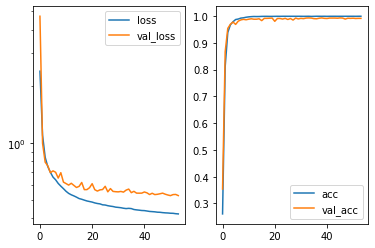

Predicted cell: MacroCheate Probability: [[1.]]
True Cell type: MacroCheate
X [[0.48802128]]
True positional value X 0.5
Y [[0.31241614]]
True positional value Y 0.3148148148148148
H [[0.3666322]]
True positional value H 0.42592592592592593
W [[0.46781448]]
True positional value W 0.5


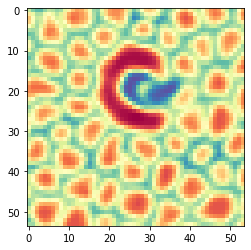

Epoch 55/250
36076/36076 [==============================] - 26s 709us/step - loss: 0.4195 - acc: 0.9995 - val_loss: 0.5297 - val_acc: 0.9921

Epoch 00055: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.5297024780163456, 'val_acc': 0.9921011133781542, 'loss': 0.41953867191762934, 'acc': 0.9995010537614261, 'lr': 1e-04}


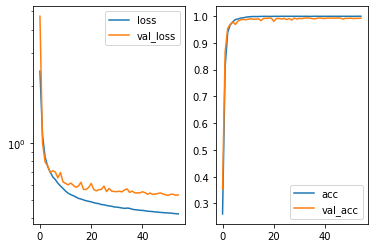

Predicted cell: NonMatureP1 Probability: [[0.9999403]]
True Cell type: NonMatureP1
X [[0.3349335]]
True positional value X 0.3148148148148148
Y [[0.34922796]]
True positional value Y 0.3148148148148148
H [[0.39681414]]
True positional value H 0.37037037037037035
W [[0.4090531]]
True positional value W 0.3888888888888889


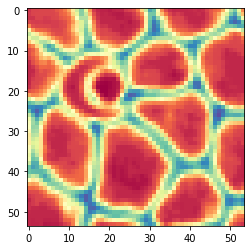

Epoch 56/250
36076/36076 [==============================] - 26s 713us/step - loss: 0.4191 - acc: 0.9993 - val_loss: 0.5302 - val_acc: 0.9910

Epoch 00056: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.5301596686801137, 'val_acc': 0.9910479274594577, 'loss': 0.4190948915026883, 'acc': 0.9992515807115314, 'lr': 1e-04}


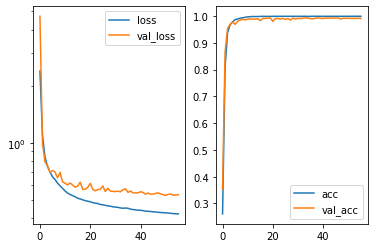

Predicted cell: MatureP1 Probability: [[0.9998084]]
True Cell type: MatureP1
X [[0.69283825]]
True positional value X 0.6851851851851852
Y [[0.4953922]]
True positional value Y 0.5
H [[0.42620343]]
True positional value H 0.3888888888888889
W [[0.36655727]]
True positional value W 0.3888888888888889


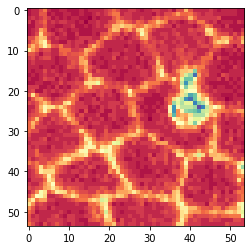

Epoch 57/250
36076/36076 [==============================] - 26s 715us/step - loss: 0.4177 - acc: 0.9994 - val_loss: 0.5278 - val_acc: 0.9921

Epoch 00057: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.5278470796808059, 'val_acc': 0.9921011123423704, 'loss': 0.4176548957322439, 'acc': 0.9993901768760626, 'lr': 1e-04}


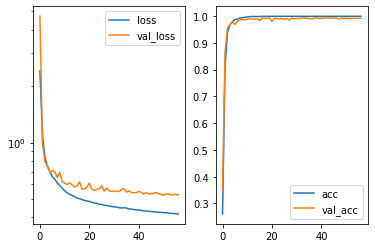

Predicted cell: NonMatureP1 Probability: [[0.9998667]]
True Cell type: NonMatureP1
X [[0.6865871]]
True positional value X 0.6851851851851852
Y [[0.6831291]]
True positional value Y 0.6851851851851852
H [[0.42715132]]
True positional value H 0.4444444444444444
W [[0.3073727]]
True positional value W 0.2962962962962963


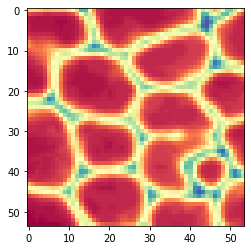

Epoch 58/250
36076/36076 [==============================] - 26s 709us/step - loss: 0.4168 - acc: 0.9994 - val_loss: 0.5314 - val_acc: 0.9910

Epoch 00058: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.53136365761438, 'val_acc': 0.9910479264236739, 'loss': 0.4167752165509666, 'acc': 0.9993624576431563, 'lr': 1e-04}


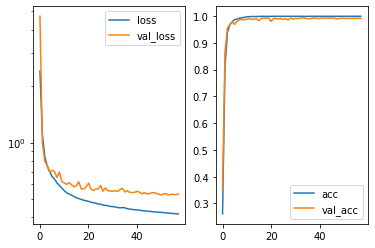

Predicted cell: MacroCheate Probability: [[0.9999994]]
True Cell type: MacroCheate
X [[0.3268056]]
True positional value X 0.3148148148148148
Y [[0.48598468]]
True positional value Y 0.5
H [[0.564904]]
True positional value H 0.5555555555555556
W [[0.60859364]]
True positional value W 0.6481481481481481


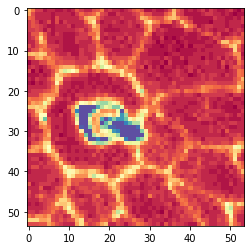

Epoch 59/250
36076/36076 [==============================] - 26s 716us/step - loss: 0.4158 - acc: 0.9994 - val_loss: 0.5239 - val_acc: 0.9916

Epoch 00059: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.5238801375572903, 'val_acc': 0.991574519900914, 'loss': 0.4157883182361314, 'acc': 0.9993624576431563, 'lr': 1e-04}


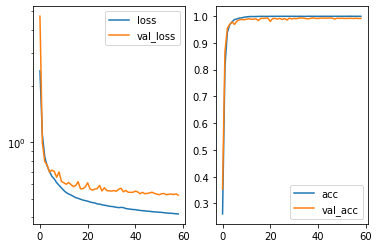

Predicted cell: MacroCheate Probability: [[0.99999964]]
True Cell type: MacroCheate
X [[0.30928922]]
True positional value X 0.3148148148148148
Y [[0.32976776]]
True positional value Y 0.3148148148148148
H [[0.49120182]]
True positional value H 0.5185185185185185
W [[0.56554997]]
True positional value W 0.5740740740740741


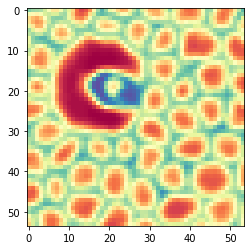

Epoch 60/250
36076/36076 [==============================] - 26s 709us/step - loss: 0.4153 - acc: 0.9993 - val_loss: 0.5273 - val_acc: 0.9916

Epoch 00060: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.527331832084234, 'val_acc': 0.991574519900914, 'loss': 0.41532610955728977, 'acc': 0.9993070191773439, 'lr': 1e-04}


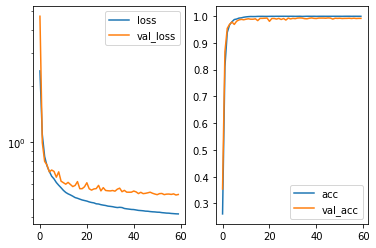

Predicted cell: Normal Probability: [[0.99362177]]
True Cell type: Normal
X [[0.5093579]]
True positional value X 0.5
Y [[0.49218702]]
True positional value Y 0.5
H [[0.35111758]]
True positional value H 0.37037037037037035
W [[0.21263248]]
True positional value W 0.25925925925925924


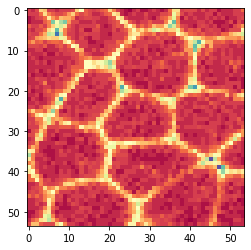

Epoch 61/250
36076/36076 [==============================] - 26s 712us/step - loss: 0.4145 - acc: 0.9993 - val_loss: 0.5277 - val_acc: 0.9921

Epoch 00061: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.5276706321670106, 'val_acc': 0.9921011123423704, 'loss': 0.41447865326556044, 'acc': 0.9993070191773439, 'lr': 1e-04}


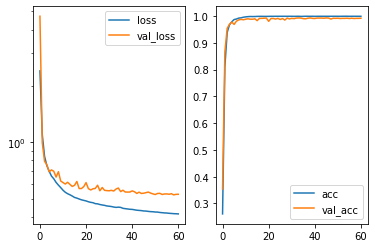

Predicted cell: MatureP1 Probability: [[0.9998752]]
True Cell type: MatureP1
X [[0.6649897]]
True positional value X 0.6851851851851852
Y [[0.3039155]]
True positional value Y 0.3148148148148148
H [[0.50892556]]
True positional value H 0.4444444444444444
W [[0.41235012]]
True positional value W 0.42592592592592593


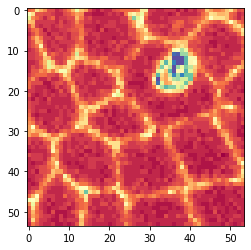

Epoch 62/250
36076/36076 [==============================] - 26s 714us/step - loss: 0.4132 - acc: 0.9993 - val_loss: 0.5176 - val_acc: 0.9926

Epoch 00062: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.5176326494395199, 'val_acc': 0.9926277047838268, 'loss': 0.41324855222486845, 'acc': 0.9992792999444376, 'lr': 1e-04}


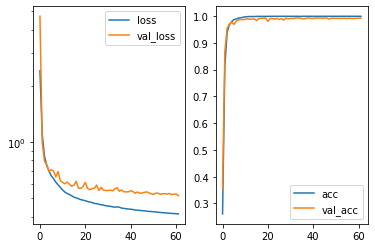

Predicted cell: MacroCheate Probability: [[1.]]
True Cell type: MacroCheate
X [[0.3060877]]
True positional value X 0.3148148148148148
Y [[0.35795355]]
True positional value Y 0.3148148148148148
H [[0.75093234]]
True positional value H 0.7407407407407407
W [[0.69758624]]
True positional value W 0.8148148148148148


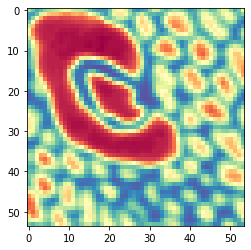

Epoch 63/250
36076/36076 [==============================] - 26s 713us/step - loss: 0.4124 - acc: 0.9994 - val_loss: 0.5206 - val_acc: 0.9926

Epoch 00063: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.5205653801662411, 'val_acc': 0.9926277058196106, 'loss': 0.4123517567559718, 'acc': 0.9993624576431563, 'lr': 1e-04}


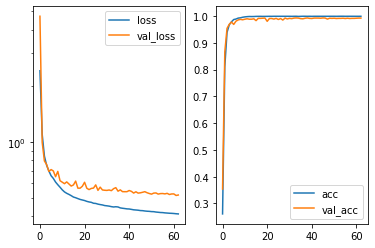

Predicted cell: MatureP1 Probability: [[0.9989975]]
True Cell type: MatureP1
X [[0.3517963]]
True positional value X 0.3148148148148148
Y [[0.4923817]]
True positional value Y 0.5
H [[0.3245308]]
True positional value H 0.3148148148148148
W [[0.34744132]]
True positional value W 0.35185185185185186


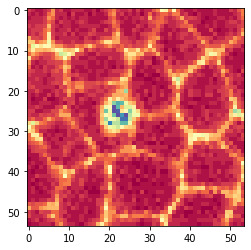

Epoch 64/250
36076/36076 [==============================] - 26s 711us/step - loss: 0.4118 - acc: 0.9992 - val_loss: 0.5214 - val_acc: 0.9926

Epoch 00064: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.5214208643834424, 'val_acc': 0.9926277047838268, 'loss': 0.41180829346107267, 'acc': 0.9992238614786252, 'lr': 1e-04}


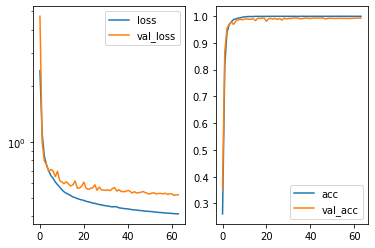

Predicted cell: Normal Probability: [[0.9999999]]
True Cell type: Normal
X [[0.5215794]]
True positional value X 0.5
Y [[0.49261296]]
True positional value Y 0.5
H [[0.2241628]]
True positional value H 0.12962962962962962
W [[0.26234713]]
True positional value W 0.3148148148148148


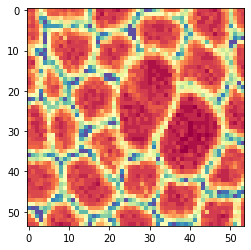

Epoch 65/250
36076/36076 [==============================] - 26s 713us/step - loss: 0.4104 - acc: 0.9993 - val_loss: 0.5240 - val_acc: 0.9937

Epoch 00065: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.5239728581848868, 'val_acc': 0.9936808896667396, 'loss': 0.4103601737639132, 'acc': 0.9993347384102501, 'lr': 1e-04}


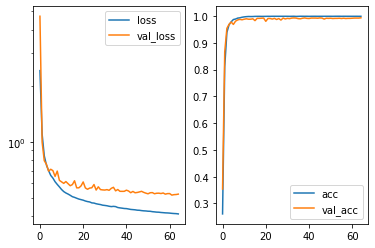

Predicted cell: MacroCheate Probability: [[1.]]
True Cell type: MacroCheate
X [[0.45857728]]
True positional value X 0.5
Y [[0.32588267]]
True positional value Y 0.3148148148148148
H [[0.8108584]]
True positional value H 0.7962962962962963
W [[0.67517406]]
True positional value W 0.6111111111111112


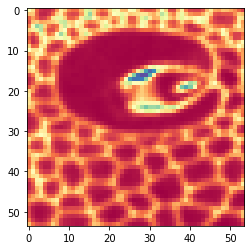

Epoch 66/250
36076/36076 [==============================] - 26s 713us/step - loss: 0.4097 - acc: 0.9993 - val_loss: 0.5262 - val_acc: 0.9905

Epoch 00066: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.5262306866801495, 'val_acc': 0.9905213350180013, 'loss': 0.4096991363386183, 'acc': 0.9993347384102501, 'lr': 1e-04}


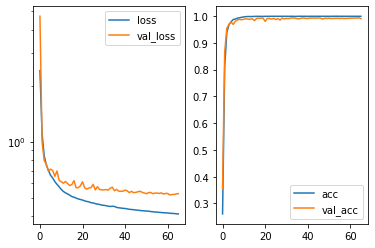

Predicted cell: Normal Probability: [[0.99998236]]
True Cell type: Normal
X [[0.5018039]]
True positional value X 0.5
Y [[0.49277633]]
True positional value Y 0.5
H [[0.25713548]]
True positional value H 0.3148148148148148
W [[0.2891023]]
True positional value W 0.2777777777777778


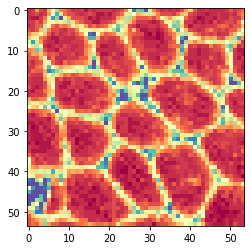

Epoch 67/250
36076/36076 [==============================] - 26s 715us/step - loss: 0.4089 - acc: 0.9995 - val_loss: 0.5342 - val_acc: 0.9926

Epoch 00067: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.5342165186820751, 'val_acc': 0.9926277047838268, 'loss': 0.40891006909131555, 'acc': 0.9995010538076876, 'lr': 1e-04}


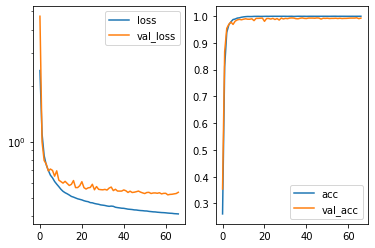

Predicted cell: MacroCheate Probability: [[1.]]
True Cell type: MacroCheate
X [[0.6929858]]
True positional value X 0.6851851851851852
Y [[0.52289766]]
True positional value Y 0.5
H [[0.56418073]]
True positional value H 0.5370370370370371
W [[0.6033138]]
True positional value W 0.6296296296296297


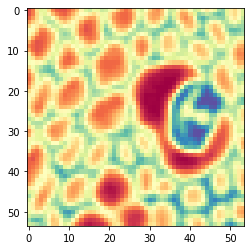

Epoch 68/250
36076/36076 [==============================] - 26s 714us/step - loss: 0.4082 - acc: 0.9994 - val_loss: 0.5174 - val_acc: 0.9932

Epoch 00068: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.5174477138351051, 'val_acc': 0.9931542972252833, 'loss': 0.4081773782486212, 'acc': 0.9993901768760626, 'lr': 1e-04}


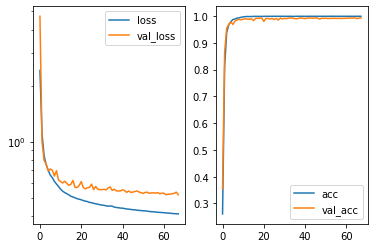

Predicted cell: MatureP1 Probability: [[0.99975556]]
True Cell type: MatureP1
X [[0.6617886]]
True positional value X 0.6851851851851852
Y [[0.510812]]
True positional value Y 0.5
H [[0.378978]]
True positional value H 0.4074074074074074
W [[0.38759023]]
True positional value W 0.4074074074074074


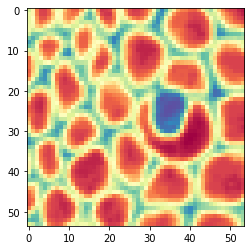

Epoch 69/250
36076/36076 [==============================] - 26s 714us/step - loss: 0.4069 - acc: 0.9994 - val_loss: 0.5268 - val_acc: 0.9921

Epoch 00069: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.526821526839521, 'val_acc': 0.9921011123423704, 'loss': 0.4069265808184404, 'acc': 0.9993901768760626, 'lr': 1e-04}


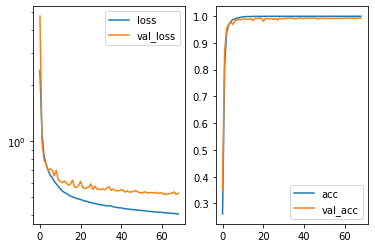

Predicted cell: NonMatureP1 Probability: [[0.9999795]]
True Cell type: NonMatureP1
X [[0.4924368]]
True positional value X 0.5
Y [[0.3378296]]
True positional value Y 0.3148148148148148
H [[0.44261065]]
True positional value H 0.37037037037037035
W [[0.35375446]]
True positional value W 0.4074074074074074


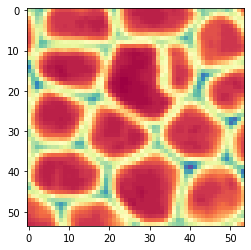

Epoch 70/250
36076/36076 [==============================] - 26s 713us/step - loss: 0.4063 - acc: 0.9993 - val_loss: 0.5228 - val_acc: 0.9910

Epoch 00070: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.5227692367027408, 'val_acc': 0.9910479274594577, 'loss': 0.40633782608266655, 'acc': 0.9993070191310823, 'lr': 1e-04}


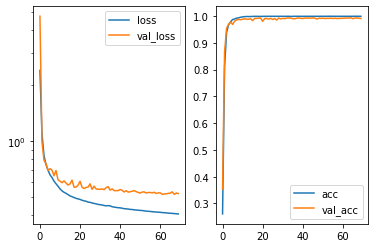

Predicted cell: MacroCheate Probability: [[1.]]
True Cell type: MacroCheate
X [[0.30900976]]
True positional value X 0.3148148148148148
Y [[0.6894648]]
True positional value Y 0.6851851851851852
H [[0.5337992]]
True positional value H 0.5740740740740741
W [[0.5720694]]
True positional value W 0.5555555555555556


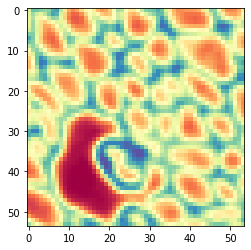

Epoch 71/250
36076/36076 [==============================] - 26s 712us/step - loss: 0.4053 - acc: 0.9994 - val_loss: 0.5110 - val_acc: 0.9942

Epoch 00071: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.5110259354271469, 'val_acc': 0.994207482108196, 'loss': 0.405292434529278, 'acc': 0.9993901768760626, 'lr': 1e-04}


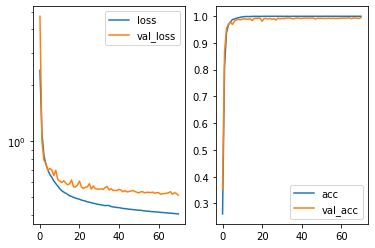

Predicted cell: Normal Probability: [[1.]]
True Cell type: Normal
X [[0.4873227]]
True positional value X 0.5
Y [[0.5039617]]
True positional value Y 0.5
H [[0.38071162]]
True positional value H 0.4074074074074074
W [[0.40287536]]
True positional value W 0.48148148148148145


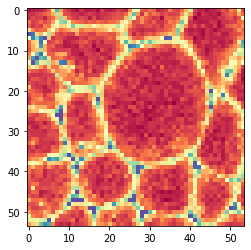

Epoch 72/250
36076/36076 [==============================] - 26s 714us/step - loss: 0.4047 - acc: 0.9993 - val_loss: 0.5164 - val_acc: 0.9926

Epoch 00072: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.5164132491734983, 'val_acc': 0.9926277047838268, 'loss': 0.40474075390238073, 'acc': 0.9993347384102501, 'lr': 1e-04}


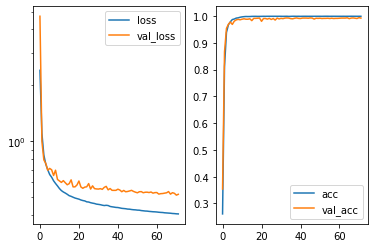

Predicted cell: Normal Probability: [[1.]]
True Cell type: Normal
X [[0.48733032]]
True positional value X 0.5
Y [[0.5076331]]
True positional value Y 0.5
H [[0.21099712]]
True positional value H 0.2222222222222222
W [[0.27412122]]
True positional value W 0.3333333333333333


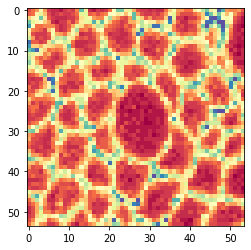

Epoch 73/250
36076/36076 [==============================] - 26s 711us/step - loss: 0.4039 - acc: 0.9995 - val_loss: 0.5092 - val_acc: 0.9926

Epoch 00073: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.5091875907996882, 'val_acc': 0.9926277047838268, 'loss': 0.4038895372673497, 'acc': 0.9994733345747814, 'lr': 1e-04}


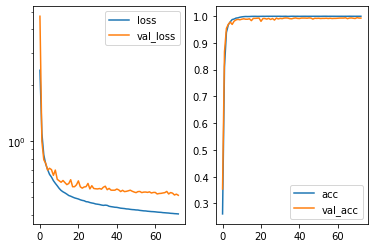

Predicted cell: MacroCheate Probability: [[0.999998]]
True Cell type: MacroCheate
X [[0.5166227]]
True positional value X 0.5
Y [[0.32895184]]
True positional value Y 0.3148148148148148
H [[0.77941024]]
True positional value H 0.7777777777777778
W [[0.5820862]]
True positional value W 0.6111111111111112


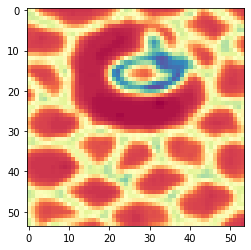

Epoch 74/250
36076/36076 [==============================] - 26s 710us/step - loss: 0.4033 - acc: 0.9994 - val_loss: 0.5129 - val_acc: 0.9932

Epoch 00074: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.5129083522437057, 'val_acc': 0.9931542972252833, 'loss': 0.403255972487922, 'acc': 0.9993624576431563, 'lr': 1e-04}


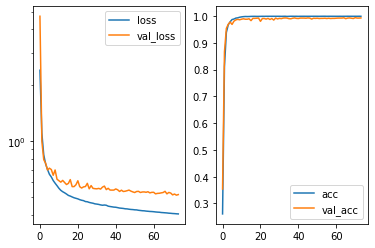

Predicted cell: Normal Probability: [[0.99999857]]
True Cell type: Normal
X [[0.5058457]]
True positional value X 0.5
Y [[0.49154162]]
True positional value Y 0.5
H [[0.3722256]]
True positional value H 0.14814814814814814
W [[0.29384872]]
True positional value W 0.24074074074074073


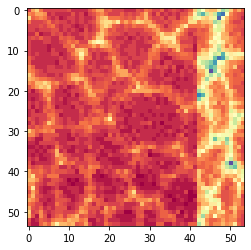

Epoch 75/250
36076/36076 [==============================] - 26s 711us/step - loss: 0.4024 - acc: 0.9993 - val_loss: 0.5113 - val_acc: 0.9932

Epoch 00075: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.5113154253625694, 'val_acc': 0.9931542972252833, 'loss': 0.4024209982144197, 'acc': 0.9992792999444376, 'lr': 1e-04}


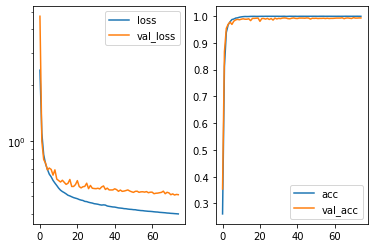

Predicted cell: MatureP1 Probability: [[0.99968374]]
True Cell type: MatureP1
X [[0.30585665]]
True positional value X 0.3148148148148148
Y [[0.6865001]]
True positional value Y 0.6851851851851852
H [[0.493054]]
True positional value H 0.48148148148148145
W [[0.59029937]]
True positional value W 0.5370370370370371


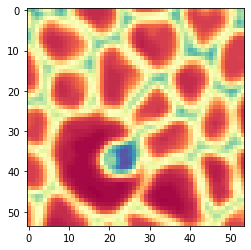

Epoch 76/250
36076/36076 [==============================] - 26s 711us/step - loss: 0.4015 - acc: 0.9994 - val_loss: 0.5121 - val_acc: 0.9932

Epoch 00076: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.5120569260073938, 'val_acc': 0.9931542972252833, 'loss': 0.40154666630798014, 'acc': 0.9994178961089688, 'lr': 1e-04}


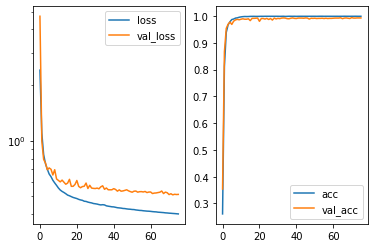

Predicted cell: MatureP1 Probability: [[0.9999958]]
True Cell type: MatureP1
X [[0.4994511]]
True positional value X 0.5
Y [[0.68202245]]
True positional value Y 0.6851851851851852
H [[0.42402956]]
True positional value H 0.42592592592592593
W [[0.3206187]]
True positional value W 0.3333333333333333


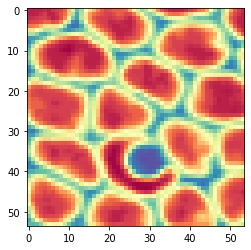

Epoch 77/250
36076/36076 [==============================] - 26s 715us/step - loss: 0.4006 - acc: 0.9993 - val_loss: 0.5168 - val_acc: 0.9916

Epoch 00077: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.5167943843733078, 'val_acc': 0.991574519900914, 'loss': 0.4005998264746651, 'acc': 0.9993347384102501, 'lr': 1e-04}


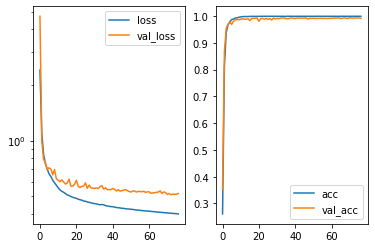

Predicted cell: MacroCheate Probability: [[1.]]
True Cell type: MacroCheate
X [[0.56095]]
True positional value X 0.5
Y [[0.45691797]]
True positional value Y 0.5
H [[0.9215189]]
True positional value H 0.9444444444444444
W [[0.8804655]]
True positional value W 0.9074074074074074


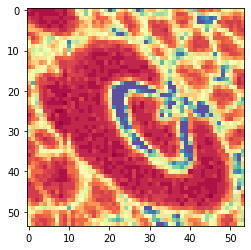

Epoch 78/250
36076/36076 [==============================] - 26s 708us/step - loss: 0.4002 - acc: 0.9993 - val_loss: 0.5133 - val_acc: 0.9916

Epoch 00078: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.5133272872716894, 'val_acc': 0.991574519900914, 'loss': 0.4002286618948644, 'acc': 0.9993347384102501, 'lr': 1e-04}


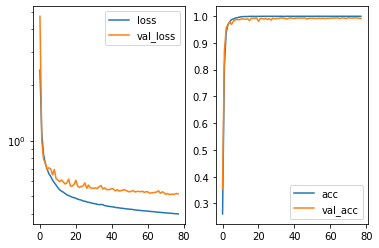

Predicted cell: MatureP1 Probability: [[0.99999774]]
True Cell type: MatureP1
X [[0.30704206]]
True positional value X 0.3148148148148148
Y [[0.6999653]]
True positional value Y 0.6851851851851852
H [[0.42015016]]
True positional value H 0.37037037037037035
W [[0.2907505]]
True positional value W 0.2777777777777778


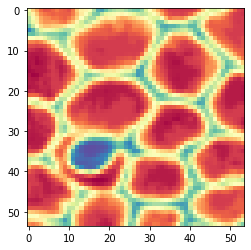

Epoch 79/250
36076/36076 [==============================] - 26s 711us/step - loss: 0.3996 - acc: 0.9993 - val_loss: 0.5237 - val_acc: 0.9932

Epoch 00079: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.5237296295831428, 'val_acc': 0.9931542972252833, 'loss': 0.39958517069509414, 'acc': 0.9993347384102501, 'lr': 1e-04}


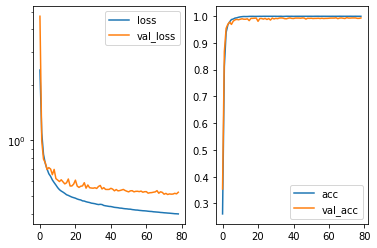

Predicted cell: MacroCheate Probability: [[1.]]
True Cell type: MacroCheate
X [[0.49298918]]
True positional value X 0.5
Y [[0.6828425]]
True positional value Y 0.6851851851851852
H [[0.41742265]]
True positional value H 0.46296296296296297
W [[0.45911685]]
True positional value W 0.46296296296296297


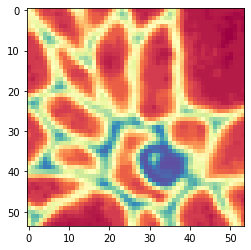

Epoch 80/250
36076/36076 [==============================] - 26s 708us/step - loss: 0.3987 - acc: 0.9994 - val_loss: 0.5100 - val_acc: 0.9932

Epoch 00080: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.5100403067750514, 'val_acc': 0.9931542972252833, 'loss': 0.3987352970018132, 'acc': 0.9993624576431563, 'lr': 1e-04}


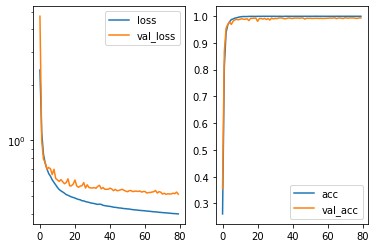

Predicted cell: Normal Probability: [[0.9999851]]
True Cell type: Normal
X [[0.48692355]]
True positional value X 0.5
Y [[0.49946174]]
True positional value Y 0.5
H [[0.24887931]]
True positional value H 0.2222222222222222
W [[0.3855366]]
True positional value W 0.25925925925925924


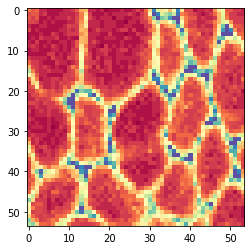

Epoch 81/250
36076/36076 [==============================] - 26s 709us/step - loss: 0.3981 - acc: 0.9993 - val_loss: 0.5086 - val_acc: 0.9921

Epoch 00081: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.5086198227539886, 'val_acc': 0.9921011123423704, 'loss': 0.39805571229167863, 'acc': 0.9993070191773439, 'lr': 1e-04}


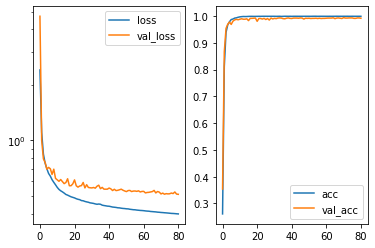

Predicted cell: Normal Probability: [[0.9999999]]
True Cell type: Normal
X [[0.50859535]]
True positional value X 0.5
Y [[0.5051877]]
True positional value Y 0.5
H [[0.23017175]]
True positional value H 0.2962962962962963
W [[0.2576743]]
True positional value W 0.3148148148148148


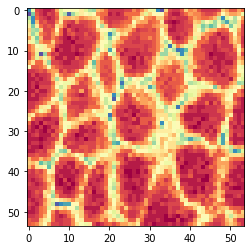

Epoch 82/250
36076/36076 [==============================] - 26s 711us/step - loss: 0.3971 - acc: 0.9993 - val_loss: 0.5118 - val_acc: 0.9916

Epoch 00082: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.511755929707602, 'val_acc': 0.991574519900914, 'loss': 0.3971413511112506, 'acc': 0.9993070191773439, 'lr': 1e-04}


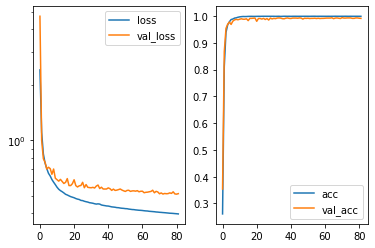

Predicted cell: Normal Probability: [[0.9999107]]
True Cell type: Normal
X [[0.50504994]]
True positional value X 0.5
Y [[0.50837225]]
True positional value Y 0.5
H [[0.39880282]]
True positional value H 0.42592592592592593
W [[0.5123013]]
True positional value W 0.46296296296296297


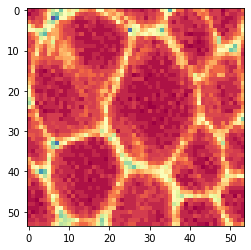

Epoch 83/250
36076/36076 [==============================] - 26s 711us/step - loss: 0.3967 - acc: 0.9993 - val_loss: 0.5056 - val_acc: 0.9921

Epoch 00083: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.5055693145360741, 'val_acc': 0.9921011123423704, 'loss': 0.3966710599659155, 'acc': 0.9992792999444376, 'lr': 1e-04}


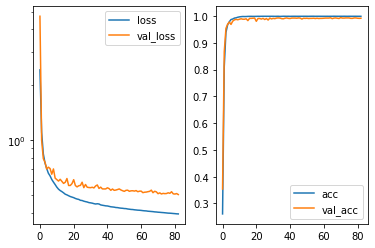

Predicted cell: MacroCheate Probability: [[0.99988437]]
True Cell type: MacroCheate
X [[0.519058]]
True positional value X 0.5
Y [[0.31271487]]
True positional value Y 0.3148148148148148
H [[0.22680616]]
True positional value H 0.18518518518518517
W [[0.34884316]]
True positional value W 0.18518518518518517


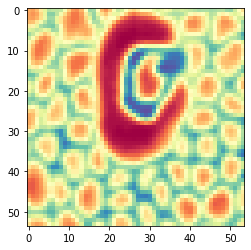

Epoch 84/250
36076/36076 [==============================] - 26s 711us/step - loss: 0.3957 - acc: 0.9993 - val_loss: 0.5149 - val_acc: 0.9921

Epoch 00084: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.5148516399663269, 'val_acc': 0.9921011123423704, 'loss': 0.3956825619480644, 'acc': 0.9993347384102501, 'lr': 1e-04}


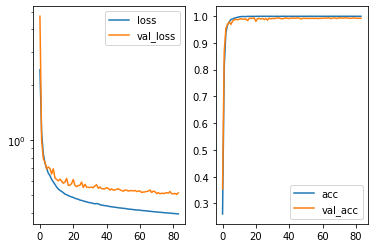

Predicted cell: MatureP1 Probability: [[0.99999976]]
True Cell type: MatureP1
X [[0.67980474]]
True positional value X 0.6851851851851852
Y [[0.50907755]]
True positional value Y 0.5
H [[0.26735967]]
True positional value H 0.2962962962962963
W [[0.2743012]]
True positional value W 0.24074074074074073


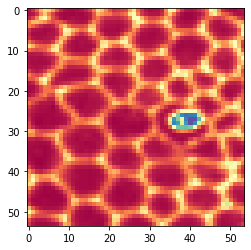

Epoch 85/250
36076/36076 [==============================] - 26s 711us/step - loss: 0.3953 - acc: 0.9993 - val_loss: 0.5092 - val_acc: 0.9921

Epoch 00085: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.5092099429181276, 'val_acc': 0.9921011133781542, 'loss': 0.39525456331841285, 'acc': 0.9992792999444376, 'lr': 1e-04}


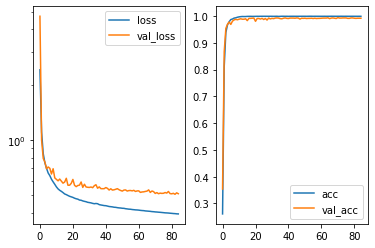

Predicted cell: MacroCheate Probability: [[0.9999999]]
True Cell type: MacroCheate
X [[0.67929065]]
True positional value X 0.6851851851851852
Y [[0.3385191]]
True positional value Y 0.3148148148148148
H [[0.4164831]]
True positional value H 0.4074074074074074
W [[0.40482208]]
True positional value W 0.4074074074074074


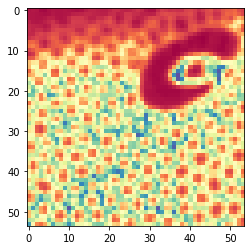

Epoch 86/250
36076/36076 [==============================] - 26s 713us/step - loss: 0.3954 - acc: 0.9993 - val_loss: 0.5157 - val_acc: 0.9895

Epoch 00086: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.5156983988042754, 'val_acc': 0.9894681459605662, 'loss': 0.39540493827012074, 'acc': 0.9992792999444376, 'lr': 1e-04}


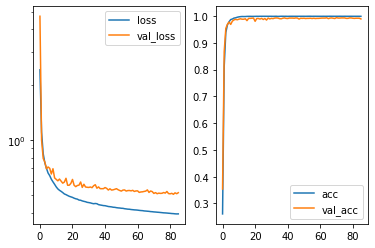

Predicted cell: Normal Probability: [[0.9999924]]
True Cell type: Normal
X [[0.4977169]]
True positional value X 0.5
Y [[0.48650262]]
True positional value Y 0.5
H [[0.40961716]]
True positional value H 0.5
W [[0.42858925]]
True positional value W 0.6111111111111112


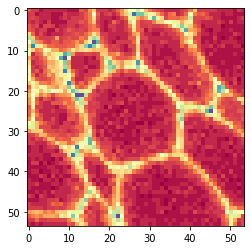

Epoch 87/250
36076/36076 [==============================] - 26s 713us/step - loss: 0.3942 - acc: 0.9993 - val_loss: 0.5097 - val_acc: 0.9932

Epoch 00087: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.5097349044710413, 'val_acc': 0.9931542972252833, 'loss': 0.3942477726720894, 'acc': 0.9993347384102501, 'lr': 1e-04}


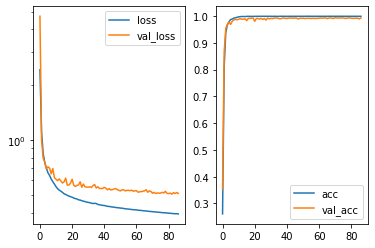

Predicted cell: MatureP1 Probability: [[0.9999871]]
True Cell type: MatureP1
X [[0.5097832]]
True positional value X 0.5
Y [[0.35240328]]
True positional value Y 0.3148148148148148
H [[0.26762623]]
True positional value H 0.25925925925925924
W [[0.3144142]]
True positional value W 0.2777777777777778


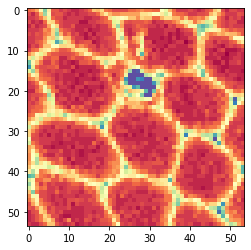

Epoch 88/250
36076/36076 [==============================] - 26s 711us/step - loss: 0.3938 - acc: 0.9994 - val_loss: 0.4992 - val_acc: 0.9942

Epoch 00088: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.49915042160183837, 'val_acc': 0.994207482108196, 'loss': 0.39379476480188463, 'acc': 0.9993624576431563, 'lr': 1e-04}


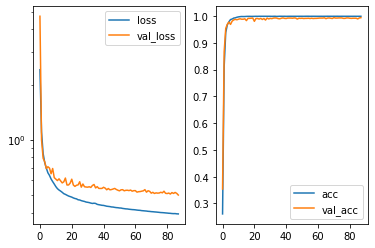

Predicted cell: NonMatureP1 Probability: [[0.9999926]]
True Cell type: NonMatureP1
X [[0.3236596]]
True positional value X 0.3148148148148148
Y [[0.3261279]]
True positional value Y 0.3148148148148148
H [[0.34565663]]
True positional value H 0.3148148148148148
W [[0.4544515]]
True positional value W 0.4074074074074074


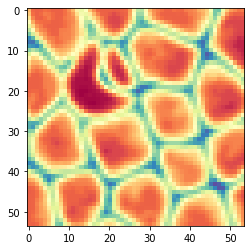

Epoch 89/250
36076/36076 [==============================] - 26s 712us/step - loss: 0.3925 - acc: 0.9993 - val_loss: 0.4996 - val_acc: 0.9932

Epoch 00089: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.49962432871623186, 'val_acc': 0.9931542972252833, 'loss': 0.39248948022087105, 'acc': 0.9993070191773439, 'lr': 1e-04}


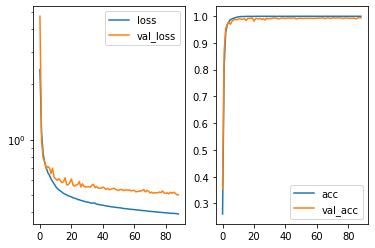

Predicted cell: NonMatureP1 Probability: [[0.9999937]]
True Cell type: NonMatureP1
X [[0.30948478]]
True positional value X 0.3148148148148148
Y [[0.4909382]]
True positional value Y 0.5
H [[0.37480685]]
True positional value H 0.4074074074074074
W [[0.3465327]]
True positional value W 0.3888888888888889


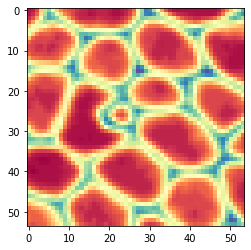

Epoch 90/250
36076/36076 [==============================] - 26s 714us/step - loss: 0.3922 - acc: 0.9993 - val_loss: 0.5069 - val_acc: 0.9926

Epoch 00090: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.5068582388336499, 'val_acc': 0.9926277047838268, 'loss': 0.3922021645825009, 'acc': 0.9993070191310823, 'lr': 1e-04}


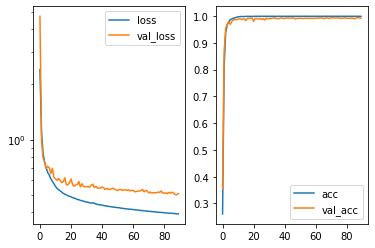

Predicted cell: MatureP1 Probability: [[0.99999964]]
True Cell type: MatureP1
X [[0.47072527]]
True positional value X 0.5
Y [[0.5135014]]
True positional value Y 0.5
H [[0.48814103]]
True positional value H 0.48148148148148145
W [[0.3530724]]
True positional value W 0.35185185185185186


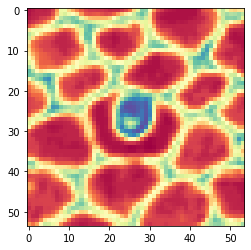

Epoch 91/250
36076/36076 [==============================] - 26s 712us/step - loss: 0.3912 - acc: 0.9993 - val_loss: 0.5052 - val_acc: 0.9947

Epoch 00091: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.505188821208295, 'val_acc': 0.9947340745496523, 'loss': 0.39115531600649095, 'acc': 0.9993347384102501, 'lr': 1e-04}


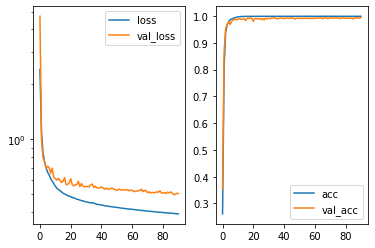

Predicted cell: Normal Probability: [[1.]]
True Cell type: Normal
X [[0.51090825]]
True positional value X 0.5
Y [[0.49990684]]
True positional value Y 0.5
H [[0.41417873]]
True positional value H 0.37037037037037035
W [[0.45765144]]
True positional value W 0.3148148148148148


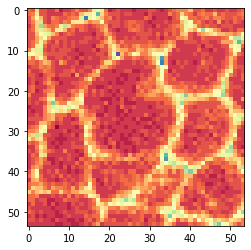

Epoch 92/250
36076/36076 [==============================] - 26s 714us/step - loss: 0.3907 - acc: 0.9994 - val_loss: 0.5049 - val_acc: 0.9916

Epoch 00092: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.5048903223085931, 'val_acc': 0.991574519900914, 'loss': 0.39065403354869793, 'acc': 0.9994178961089688, 'lr': 1e-04}


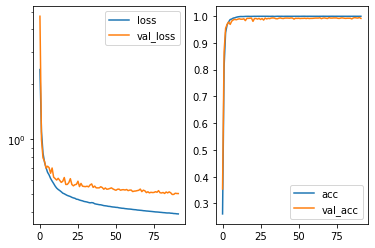

Predicted cell: MacroCheate Probability: [[0.9999989]]
True Cell type: MacroCheate
X [[0.34161156]]
True positional value X 0.3148148148148148
Y [[0.5273994]]
True positional value Y 0.5
H [[0.23904276]]
True positional value H 0.2777777777777778
W [[0.28981465]]
True positional value W 0.25925925925925924


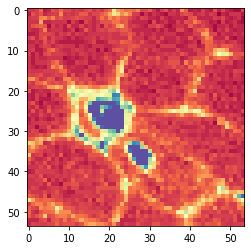

Epoch 93/250
36076/36076 [==============================] - 26s 711us/step - loss: 0.3897 - acc: 0.9993 - val_loss: 0.5090 - val_acc: 0.9932

Epoch 00093: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.5089804476471309, 'val_acc': 0.9931542972252833, 'loss': 0.38972893610063, 'acc': 0.9993070191773439, 'lr': 1e-04}


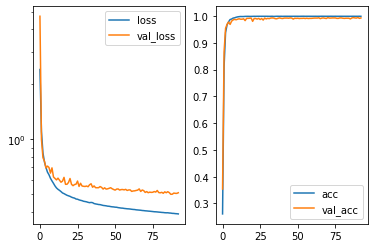

Predicted cell: MatureP1 Probability: [[0.9983285]]
True Cell type: MatureP1
X [[0.69180083]]
True positional value X 0.6851851851851852
Y [[0.49008772]]
True positional value Y 0.5
H [[0.24854244]]
True positional value H 0.2222222222222222
W [[0.21672967]]
True positional value W 0.25925925925925924


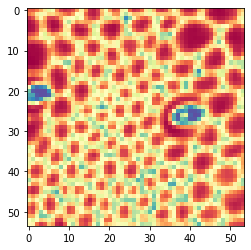

Epoch 94/250
36076/36076 [==============================] - 26s 710us/step - loss: 0.3889 - acc: 0.9994 - val_loss: 0.5020 - val_acc: 0.9926

Epoch 00094: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.501987350840767, 'val_acc': 0.9926277058196106, 'loss': 0.3888667957496453, 'acc': 0.9993901768760626, 'lr': 1e-04}


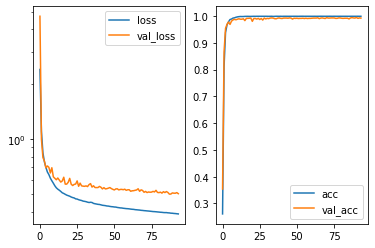

Predicted cell: NonMatureP1 Probability: [[0.9999949]]
True Cell type: NonMatureP1
X [[0.28597492]]
True positional value X 0.3148148148148148
Y [[0.32377833]]
True positional value Y 0.3148148148148148
H [[0.4414599]]
True positional value H 0.42592592592592593
W [[0.301736]]
True positional value W 0.3148148148148148


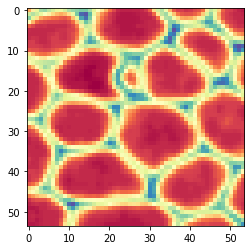

Epoch 95/250
36076/36076 [==============================] - 26s 710us/step - loss: 0.3881 - acc: 0.9993 - val_loss: 0.4997 - val_acc: 0.9921

Epoch 00095: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.4997141546108272, 'val_acc': 0.9921011123423704, 'loss': 0.38805717611170115, 'acc': 0.9993347384102501, 'lr': 1e-04}


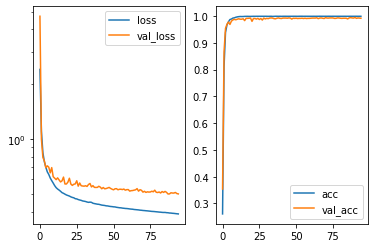

Predicted cell: MatureP1 Probability: [[0.99999976]]
True Cell type: MatureP1
X [[0.677466]]
True positional value X 0.6851851851851852
Y [[0.6912623]]
True positional value Y 0.6851851851851852
H [[0.33640918]]
True positional value H 0.3333333333333333
W [[0.30361593]]
True positional value W 0.3148148148148148


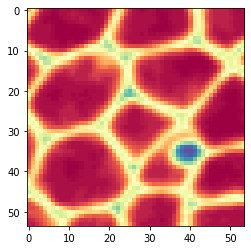

Epoch 96/250
36076/36076 [==============================] - 26s 708us/step - loss: 0.3874 - acc: 0.9993 - val_loss: 0.4926 - val_acc: 0.9937

Epoch 00096: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.492606187350126, 'val_acc': 0.9936808896667396, 'loss': 0.38738271345887615, 'acc': 0.9992515807115314, 'lr': 1e-04}


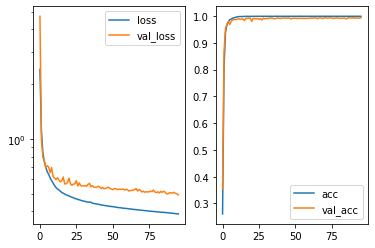

Predicted cell: MacroCheate Probability: [[1.]]
True Cell type: MacroCheate
X [[0.3179085]]
True positional value X 0.3148148148148148
Y [[0.4872308]]
True positional value Y 0.5
H [[0.6061658]]
True positional value H 0.5925925925925926
W [[0.6431937]]
True positional value W 0.6481481481481481


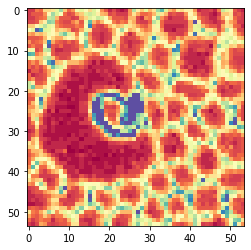

Epoch 97/250
36076/36076 [==============================] - 26s 708us/step - loss: 0.3871 - acc: 0.9993 - val_loss: 0.5015 - val_acc: 0.9926

Epoch 00097: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.5015043643601886, 'val_acc': 0.9926277047838268, 'loss': 0.38714460655344685, 'acc': 0.9993070191773439, 'lr': 1e-04}


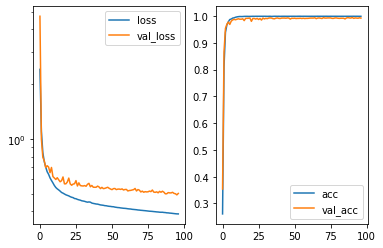

Predicted cell: MacroCheate Probability: [[1.]]
True Cell type: MacroCheate
X [[0.30080968]]
True positional value X 0.3148148148148148
Y [[0.6882361]]
True positional value Y 0.6851851851851852
H [[0.6515939]]
True positional value H 0.7777777777777778
W [[0.54471904]]
True positional value W 0.5


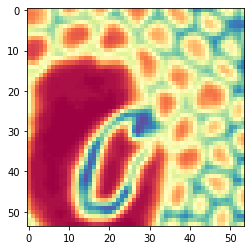

Epoch 98/250
36076/36076 [==============================] - 26s 707us/step - loss: 0.3866 - acc: 0.9993 - val_loss: 0.4996 - val_acc: 0.9932

Epoch 00098: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.49955285386451614, 'val_acc': 0.9931542972252833, 'loss': 0.3866362240483933, 'acc': 0.9993347384102501, 'lr': 1e-04}


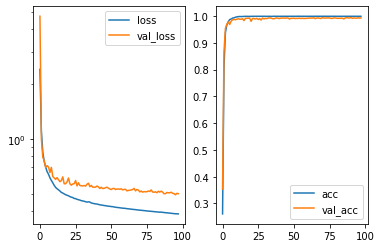

Predicted cell: MatureP1 Probability: [[0.9999995]]
True Cell type: MatureP1
X [[0.5146801]]
True positional value X 0.5
Y [[0.48310244]]
True positional value Y 0.5
H [[0.38935438]]
True positional value H 0.4074074074074074
W [[0.34382907]]
True positional value W 0.3148148148148148


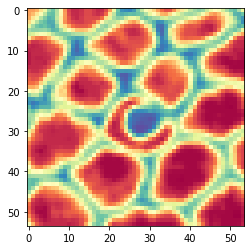

Epoch 99/250
36076/36076 [==============================] - 26s 708us/step - loss: 0.3860 - acc: 0.9993 - val_loss: 0.5030 - val_acc: 0.9942

Epoch 00099: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.5029803874180027, 'val_acc': 0.994207482108196, 'loss': 0.3859701223827569, 'acc': 0.9993070191773439, 'lr': 1e-04}


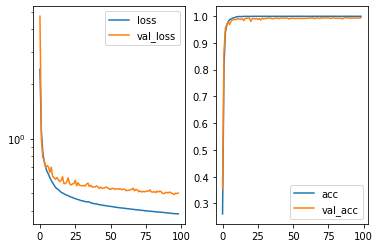

Predicted cell: MacroCheate Probability: [[0.9998604]]
True Cell type: MacroCheate
X [[0.3231495]]
True positional value X 0.3148148148148148
Y [[0.29891005]]
True positional value Y 0.3148148148148148
H [[0.6629722]]
True positional value H 0.6111111111111112
W [[0.62574685]]
True positional value W 0.5740740740740741


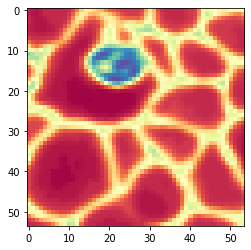

Epoch 100/250
36076/36076 [==============================] - 26s 708us/step - loss: 0.3852 - acc: 0.9994 - val_loss: 0.4965 - val_acc: 0.9921

Epoch 00100: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.4965300664517552, 'val_acc': 0.9921011123423704, 'loss': 0.38523473943438996, 'acc': 0.9993624576431563, 'lr': 1e-04}


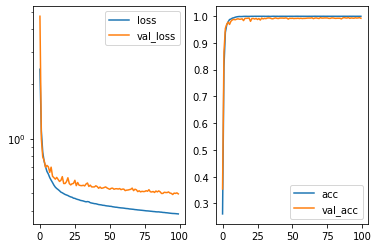

Predicted cell: MacroCheate Probability: [[1.]]
True Cell type: MacroCheate
X [[0.549544]]
True positional value X 0.5
Y [[0.6855851]]
True positional value Y 0.6851851851851852
H [[0.2701942]]
True positional value H 0.18518518518518517
W [[0.32352906]]
True positional value W 0.18518518518518517


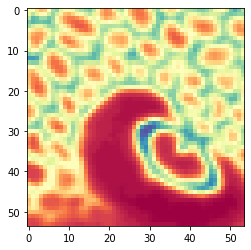

Epoch 101/250
36076/36076 [==============================] - 26s 708us/step - loss: 0.3849 - acc: 0.9994 - val_loss: 0.5001 - val_acc: 0.9921

Epoch 00101: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.5001037986012369, 'val_acc': 0.9921011123423704, 'loss': 0.38492395652742867, 'acc': 0.9994178961089688, 'lr': 1e-04}


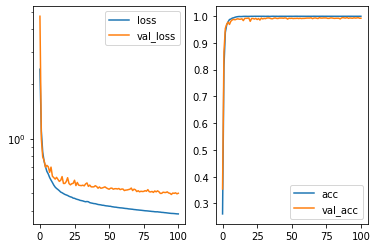

Predicted cell: MatureP1 Probability: [[0.9999248]]
True Cell type: MatureP1
X [[0.6806825]]
True positional value X 0.6851851851851852
Y [[0.32508513]]
True positional value Y 0.3148148148148148
H [[0.42494553]]
True positional value H 0.3888888888888889
W [[0.46626484]]
True positional value W 0.48148148148148145


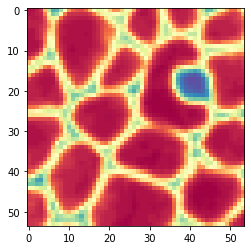

Epoch 102/250
36076/36076 [==============================] - 26s 710us/step - loss: 0.3836 - acc: 0.9994 - val_loss: 0.4918 - val_acc: 0.9926

Epoch 00102: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.49179874679928015, 'val_acc': 0.9926277047838268, 'loss': 0.3836235792677317, 'acc': 0.9993624576431563, 'lr': 1e-04}


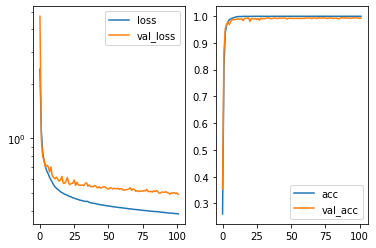

Predicted cell: NonMatureP1 Probability: [[0.999997]]
True Cell type: NonMatureP1
X [[0.6881684]]
True positional value X 0.6851851851851852
Y [[0.7066892]]
True positional value Y 0.6851851851851852
H [[0.4553189]]
True positional value H 0.46296296296296297
W [[0.32231706]]
True positional value W 0.3333333333333333


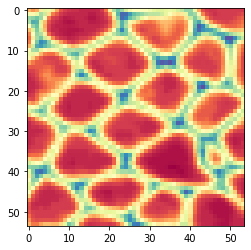

Epoch 103/250
36076/36076 [==============================] - 26s 709us/step - loss: 0.3830 - acc: 0.9994 - val_loss: 0.4912 - val_acc: 0.9926

Epoch 00103: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.49117660935205054, 'val_acc': 0.9926277047838268, 'loss': 0.38303185131164147, 'acc': 0.9993901768298011, 'lr': 1e-04}


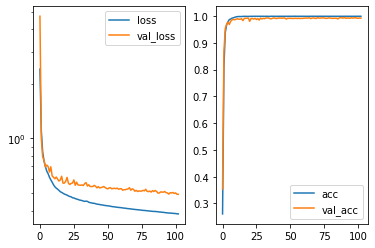

Predicted cell: MatureP1 Probability: [[0.999943]]
True Cell type: MatureP1
X [[0.32336953]]
True positional value X 0.3148148148148148
Y [[0.68914366]]
True positional value Y 0.6851851851851852
H [[0.37230253]]
True positional value H 0.3333333333333333
W [[0.31289738]]
True positional value W 0.3333333333333333


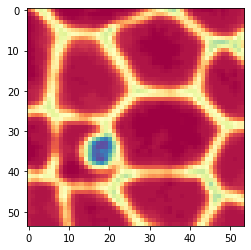

Epoch 104/250
36076/36076 [==============================] - 26s 710us/step - loss: 0.3827 - acc: 0.9993 - val_loss: 0.4942 - val_acc: 0.9932

Epoch 00104: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.4942434839884691, 'val_acc': 0.9931542972252833, 'loss': 0.38265652027530883, 'acc': 0.9992792999444376, 'lr': 1e-04}


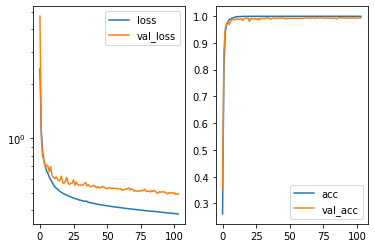

Predicted cell: MatureP1 Probability: [[0.9999976]]
True Cell type: MatureP1
X [[0.31174666]]
True positional value X 0.3148148148148148
Y [[0.4924862]]
True positional value Y 0.5
H [[0.4771536]]
True positional value H 0.5
W [[0.41389877]]
True positional value W 0.4074074074074074


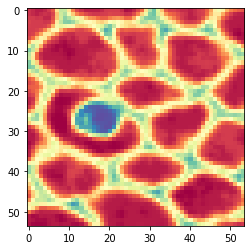

Epoch 105/250
36076/36076 [==============================] - 26s 716us/step - loss: 0.3821 - acc: 0.9993 - val_loss: 0.4958 - val_acc: 0.9921

Epoch 00105: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.4957570954490298, 'val_acc': 0.9921011123423704, 'loss': 0.38213723145854067, 'acc': 0.9992792999444376, 'lr': 1e-04}


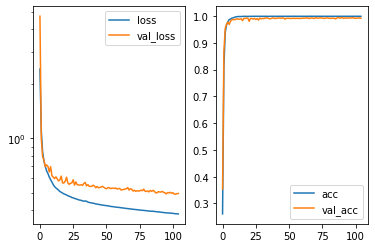

Predicted cell: Normal Probability: [[1.]]
True Cell type: Normal
X [[0.5054874]]
True positional value X 0.5
Y [[0.5067614]]
True positional value Y 0.5
H [[0.38344973]]
True positional value H 0.3333333333333333
W [[0.466913]]
True positional value W 0.48148148148148145


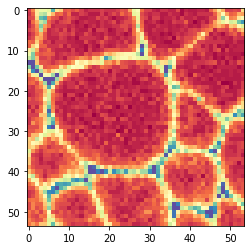

Epoch 106/250
36076/36076 [==============================] - 26s 716us/step - loss: 0.3812 - acc: 0.9993 - val_loss: 0.4990 - val_acc: 0.9947

Epoch 00106: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.4989830230712388, 'val_acc': 0.9947340745496523, 'loss': 0.38119494672135645, 'acc': 0.9993347384102501, 'lr': 1e-04}


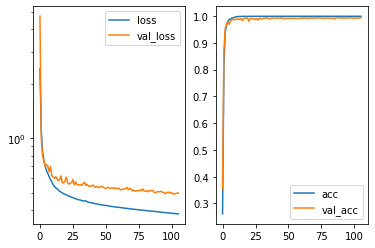

Predicted cell: MatureP1 Probability: [[1.]]
True Cell type: MatureP1
X [[0.50735873]]
True positional value X 0.5
Y [[0.67865217]]
True positional value Y 0.6851851851851852
H [[0.33716762]]
True positional value H 0.35185185185185186
W [[0.2691567]]
True positional value W 0.3148148148148148


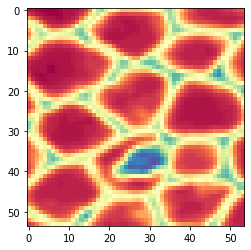

Epoch 107/250
36076/36076 [==============================] - 26s 714us/step - loss: 0.3809 - acc: 0.9992 - val_loss: 0.4915 - val_acc: 0.9932

Epoch 00107: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.49150917108213354, 'val_acc': 0.9931542972252833, 'loss': 0.38092775835022324, 'acc': 0.9992238614786252, 'lr': 1e-04}


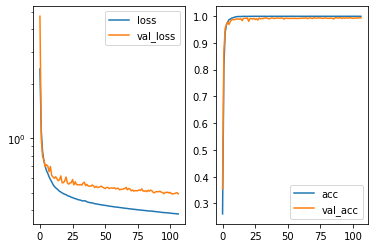

Predicted cell: MacroCheate Probability: [[1.]]
True Cell type: MacroCheate
X [[0.6851113]]
True positional value X 0.6851851851851852
Y [[0.314905]]
True positional value Y 0.3148148148148148
H [[0.79751927]]
True positional value H 0.7777777777777778
W [[0.6846802]]
True positional value W 0.6666666666666666


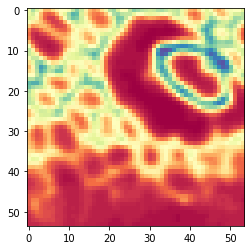

Epoch 108/250
36076/36076 [==============================] - 26s 707us/step - loss: 0.3801 - acc: 0.9994 - val_loss: 0.4928 - val_acc: 0.9916

Epoch 00108: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.49284935440120725, 'val_acc': 0.991574519900914, 'loss': 0.3800859610202215, 'acc': 0.9994178961089688, 'lr': 1e-04}


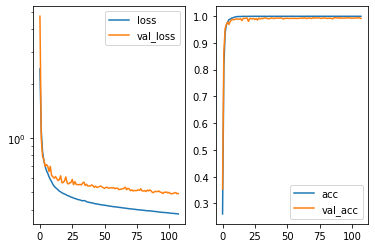

Predicted cell: MacroCheate Probability: [[0.9999999]]
True Cell type: MacroCheate
X [[0.4644586]]
True positional value X 0.5
Y [[0.3004264]]
True positional value Y 0.3148148148148148
H [[0.25191066]]
True positional value H 0.18518518518518517
W [[0.2010918]]
True positional value W 0.18518518518518517


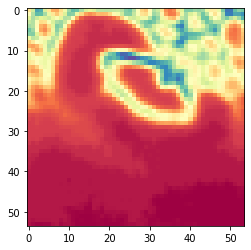

Epoch 109/250
36076/36076 [==============================] - 26s 711us/step - loss: 0.3792 - acc: 0.9995 - val_loss: 0.4940 - val_acc: 0.9926

Epoch 00109: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.4940300296017093, 'val_acc': 0.9926277047838268, 'loss': 0.37918159580439553, 'acc': 0.9995287730405938, 'lr': 1e-04}


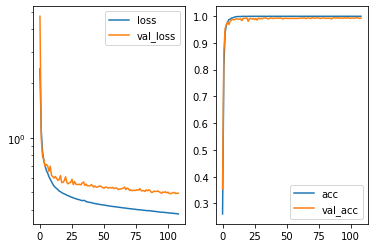

Predicted cell: Normal Probability: [[1.]]
True Cell type: Normal
X [[0.5085469]]
True positional value X 0.5
Y [[0.4832021]]
True positional value Y 0.5
H [[0.44756716]]
True positional value H 0.42592592592592593
W [[0.42850667]]
True positional value W 0.4074074074074074


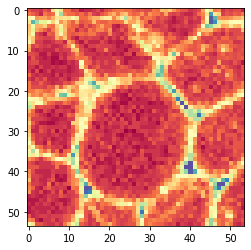

Epoch 110/250
36076/36076 [==============================] - 25s 706us/step - loss: 0.3790 - acc: 0.9993 - val_loss: 0.4915 - val_acc: 0.9937

Epoch 00110: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.49153755039463176, 'val_acc': 0.9936808896667396, 'loss': 0.3789933443181807, 'acc': 0.9993347384102501, 'lr': 1e-04}


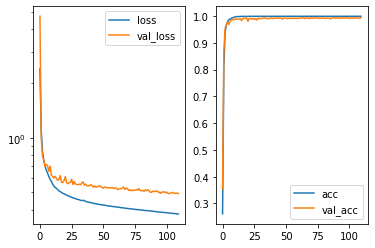

Predicted cell: MacroCheate Probability: [[1.]]
True Cell type: MacroCheate
X [[0.6925615]]
True positional value X 0.6851851851851852
Y [[0.50542367]]
True positional value Y 0.5
H [[0.4649465]]
True positional value H 0.42592592592592593
W [[0.6303841]]
True positional value W 0.5740740740740741


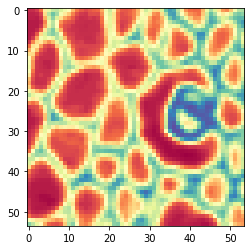

Epoch 111/250
36076/36076 [==============================] - 25s 707us/step - loss: 0.3782 - acc: 0.9993 - val_loss: 0.4909 - val_acc: 0.9916

Epoch 00111: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.4909213722976275, 'val_acc': 0.991574519900914, 'loss': 0.3781784828320643, 'acc': 0.9993347384102501, 'lr': 1e-04}


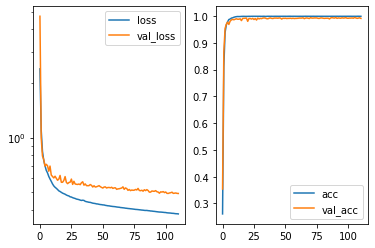

Predicted cell: NonMatureP1 Probability: [[0.999559]]
True Cell type: NonMatureP1
X [[0.3336254]]
True positional value X 0.3148148148148148
Y [[0.28303927]]
True positional value Y 0.3148148148148148
H [[0.3209085]]
True positional value H 0.35185185185185186
W [[0.35582694]]
True positional value W 0.3148148148148148


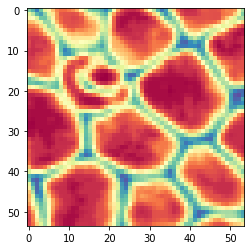

Epoch 112/250
36076/36076 [==============================] - 26s 711us/step - loss: 0.3778 - acc: 0.9993 - val_loss: 0.4918 - val_acc: 0.9932

Epoch 00112: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.49183014159205085, 'val_acc': 0.9931542972252833, 'loss': 0.37775660613936907, 'acc': 0.9993070191773439, 'lr': 1e-04}


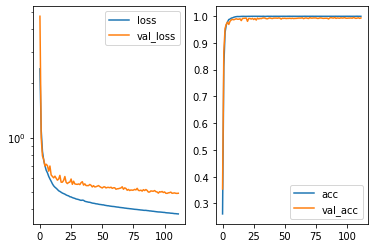

Predicted cell: MatureP1 Probability: [[0.9999473]]
True Cell type: MatureP1
X [[0.6937766]]
True positional value X 0.6851851851851852
Y [[0.31685737]]
True positional value Y 0.3148148148148148
H [[0.34943894]]
True positional value H 0.4074074074074074
W [[0.47405833]]
True positional value W 0.42592592592592593


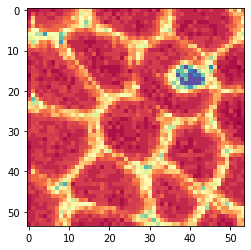

Epoch 113/250
36076/36076 [==============================] - 26s 710us/step - loss: 0.3770 - acc: 0.9993 - val_loss: 0.4878 - val_acc: 0.9932

Epoch 00113: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.4877947722377747, 'val_acc': 0.9931542972252833, 'loss': 0.3770194142835475, 'acc': 0.9993347384102501, 'lr': 1e-04}


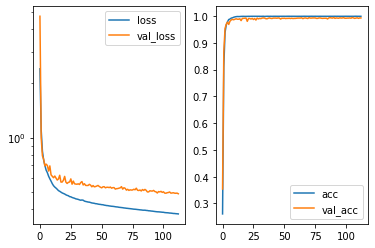

Predicted cell: MacroCheate Probability: [[0.9999994]]
True Cell type: MacroCheate
X [[0.680141]]
True positional value X 0.6851851851851852
Y [[0.30649585]]
True positional value Y 0.3148148148148148
H [[0.37008315]]
True positional value H 0.4074074074074074
W [[0.46035758]]
True positional value W 0.48148148148148145


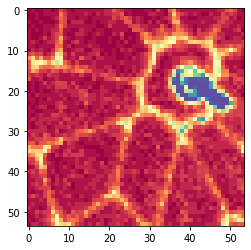

Epoch 114/250
36076/36076 [==============================] - 26s 711us/step - loss: 0.3764 - acc: 0.9992 - val_loss: 0.4857 - val_acc: 0.9932

Epoch 00114: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.4856648722436944, 'val_acc': 0.9931542972252833, 'loss': 0.376449659798835, 'acc': 0.9992238614786252, 'lr': 1e-04}


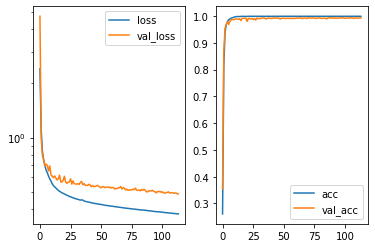

Predicted cell: Normal Probability: [[1.]]
True Cell type: Normal
X [[0.483357]]
True positional value X 0.5
Y [[0.5113777]]
True positional value Y 0.5
H [[0.24946843]]
True positional value H 0.18518518518518517
W [[0.3513557]]
True positional value W 0.42592592592592593


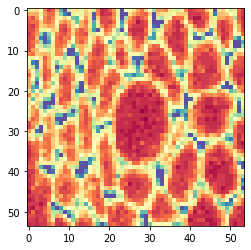

Epoch 115/250
36076/36076 [==============================] - 26s 710us/step - loss: 0.3762 - acc: 0.9994 - val_loss: 0.4883 - val_acc: 0.9932

Epoch 00115: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.48833896727421333, 'val_acc': 0.9931542972252833, 'loss': 0.3762442084866361, 'acc': 0.9993624576431563, 'lr': 1e-04}


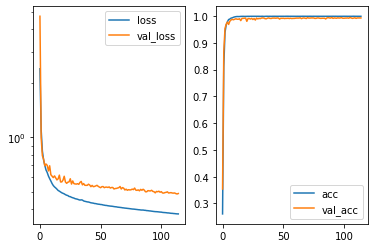

Predicted cell: MatureP1 Probability: [[0.99999857]]
True Cell type: MatureP1
X [[0.29643753]]
True positional value X 0.3148148148148148
Y [[0.32801464]]
True positional value Y 0.3148148148148148
H [[0.2861526]]
True positional value H 0.2777777777777778
W [[0.28687477]]
True positional value W 0.2777777777777778


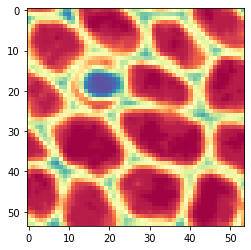

Epoch 116/250
36076/36076 [==============================] - 26s 709us/step - loss: 0.3755 - acc: 0.9994 - val_loss: 0.4938 - val_acc: 0.9932

Epoch 00116: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.49375615374485776, 'val_acc': 0.9931542982610669, 'loss': 0.37545294045727884, 'acc': 0.9993624576431563, 'lr': 1e-04}


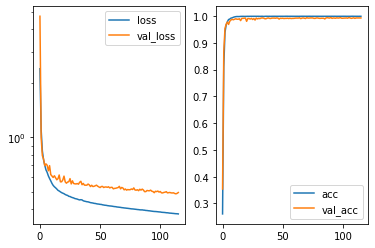

Predicted cell: Normal Probability: [[1.]]
True Cell type: Normal
X [[0.5116769]]
True positional value X 0.5
Y [[0.5047278]]
True positional value Y 0.5
H [[0.3921199]]
True positional value H 0.48148148148148145
W [[0.4421571]]
True positional value W 0.5740740740740741


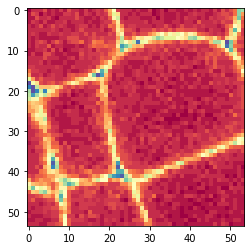

Epoch 117/250
36076/36076 [==============================] - 26s 709us/step - loss: 0.3750 - acc: 0.9994 - val_loss: 0.4859 - val_acc: 0.9926

Epoch 00117: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.4858613139770733, 'val_acc': 0.9926277047838268, 'loss': 0.3749558862845191, 'acc': 0.9993624576431563, 'lr': 1e-04}


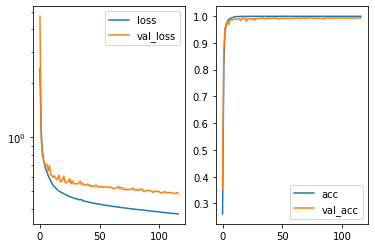

Predicted cell: MacroCheate Probability: [[1.]]
True Cell type: MacroCheate
X [[0.30901262]]
True positional value X 0.3148148148148148
Y [[0.5163498]]
True positional value Y 0.5
H [[0.73966134]]
True positional value H 0.7037037037037037
W [[0.8218005]]
True positional value W 0.8148148148148148


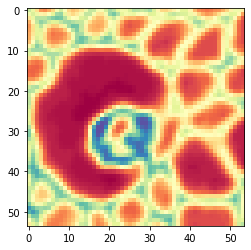

Epoch 118/250
36076/36076 [==============================] - 26s 711us/step - loss: 0.3745 - acc: 0.9994 - val_loss: 0.4893 - val_acc: 0.9937

Epoch 00118: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.4892858739053657, 'val_acc': 0.9936808896667396, 'loss': 0.37445771468162853, 'acc': 0.9993901768760626, 'lr': 1e-04}


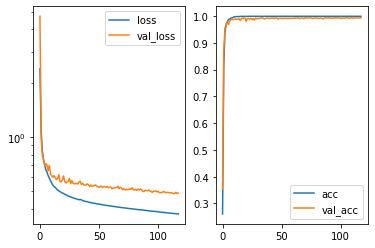

Predicted cell: Normal Probability: [[0.9364189]]
True Cell type: Normal
X [[0.4479496]]
True positional value X 0.5
Y [[0.35941407]]
True positional value Y 0.5
H [[0.36592063]]
True positional value H 0.37037037037037035
W [[0.41491917]]
True positional value W 0.35185185185185186


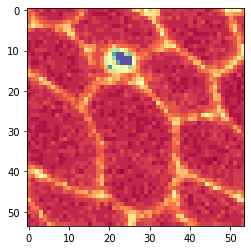

Epoch 119/250
36076/36076 [==============================] - 26s 710us/step - loss: 0.3740 - acc: 0.9994 - val_loss: 0.4812 - val_acc: 0.9937

Epoch 00119: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.4811625717783552, 'val_acc': 0.9936808896667396, 'loss': 0.3739636426873952, 'acc': 0.9993624576431563, 'lr': 1e-04}


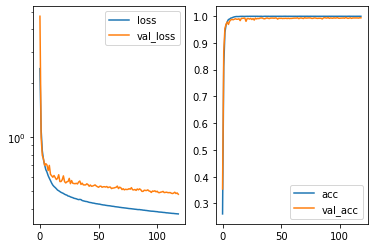

Predicted cell: MatureP1 Probability: [[0.9817271]]
True Cell type: MatureP1
X [[0.67258763]]
True positional value X 0.6851851851851852
Y [[0.32431096]]
True positional value Y 0.3148148148148148
H [[0.15843043]]
True positional value H 0.14814814814814814
W [[0.1852202]]
True positional value W 0.16666666666666666


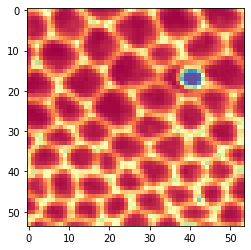

Epoch 120/250
36076/36076 [==============================] - 26s 711us/step - loss: 0.3730 - acc: 0.9993 - val_loss: 0.4822 - val_acc: 0.9926

Epoch 00120: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.4821766614129256, 'val_acc': 0.9926277047838268, 'loss': 0.3730066589550983, 'acc': 0.9993347384102501, 'lr': 1e-04}


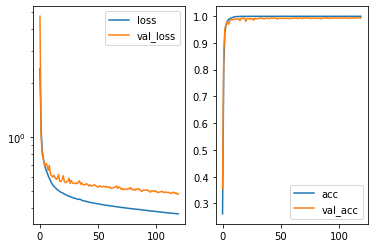

Predicted cell: MatureP1 Probability: [[0.9999932]]
True Cell type: MatureP1
X [[0.49934784]]
True positional value X 0.5
Y [[0.29608834]]
True positional value Y 0.3148148148148148
H [[0.27297083]]
True positional value H 0.2777777777777778
W [[0.26753604]]
True positional value W 0.2777777777777778


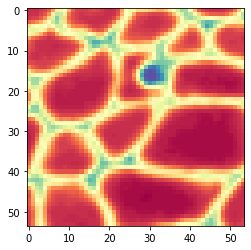

Epoch 121/250
36076/36076 [==============================] - 26s 713us/step - loss: 0.3722 - acc: 0.9993 - val_loss: 0.4918 - val_acc: 0.9932

Epoch 00121: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.491845236429106, 'val_acc': 0.9931542972252833, 'loss': 0.37216307375010477, 'acc': 0.9992792999444376, 'lr': 1e-04}


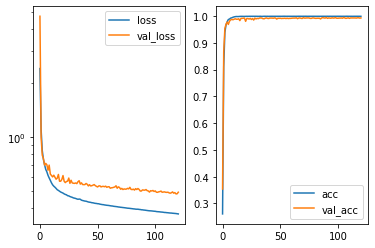

Predicted cell: MatureP1 Probability: [[0.9999993]]
True Cell type: MatureP1
X [[0.51345557]]
True positional value X 0.5
Y [[0.67118615]]
True positional value Y 0.6851851851851852
H [[0.42050964]]
True positional value H 0.48148148148148145
W [[0.33973998]]
True positional value W 0.4074074074074074


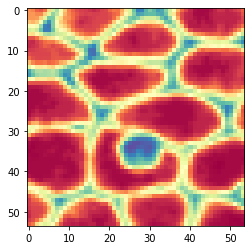

Epoch 122/250
36076/36076 [==============================] - 26s 714us/step - loss: 0.3724 - acc: 0.9994 - val_loss: 0.4827 - val_acc: 0.9932

Epoch 00122: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.4827086357394917, 'val_acc': 0.9931542972252833, 'loss': 0.37241528612545105, 'acc': 0.9994178961089688, 'lr': 1e-04}


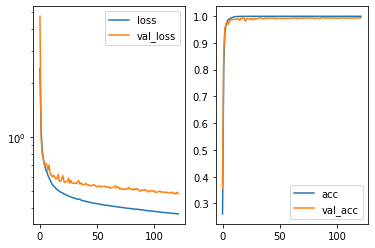

Predicted cell: Normal Probability: [[0.99999607]]
True Cell type: Normal
X [[0.49500978]]
True positional value X 0.5
Y [[0.50812405]]
True positional value Y 0.5
H [[0.36055368]]
True positional value H 0.35185185185185186
W [[0.34997004]]
True positional value W 0.2962962962962963


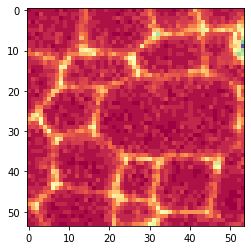

Epoch 123/250
36076/36076 [==============================] - 26s 711us/step - loss: 0.3715 - acc: 0.9993 - val_loss: 0.4838 - val_acc: 0.9937

Epoch 00123: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.4837687368641532, 'val_acc': 0.9936808896667396, 'loss': 0.3715360638591452, 'acc': 0.9992792999444376, 'lr': 1e-04}


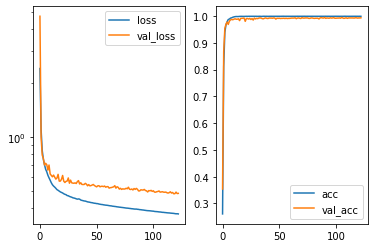

Predicted cell: Normal Probability: [[0.999964]]
True Cell type: Normal
X [[0.49715704]]
True positional value X 0.5
Y [[0.50425637]]
True positional value Y 0.5
H [[0.3964634]]
True positional value H 0.4074074074074074
W [[0.37989566]]
True positional value W 0.2777777777777778


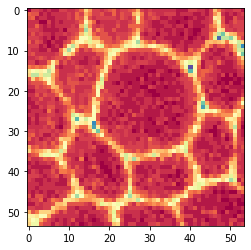

Epoch 124/250
36076/36076 [==============================] - 26s 709us/step - loss: 0.3706 - acc: 0.9993 - val_loss: 0.4831 - val_acc: 0.9937

Epoch 00124: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.48308199028895993, 'val_acc': 0.9936808896667396, 'loss': 0.3705976945437406, 'acc': 0.9993347384102501, 'lr': 1e-04}


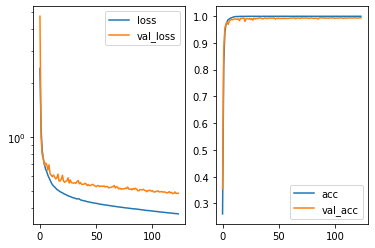

Predicted cell: NonMatureP1 Probability: [[0.9999788]]
True Cell type: NonMatureP1
X [[0.68092287]]
True positional value X 0.6851851851851852
Y [[0.70572305]]
True positional value Y 0.6851851851851852
H [[0.38240117]]
True positional value H 0.3888888888888889
W [[0.33654365]]
True positional value W 0.3148148148148148


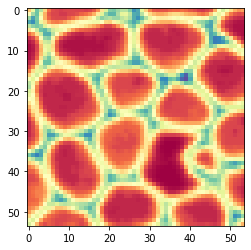

Epoch 125/250
36076/36076 [==============================] - 25s 706us/step - loss: 0.3704 - acc: 0.9993 - val_loss: 0.4885 - val_acc: 0.9937

Epoch 00125: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.4885238361804343, 'val_acc': 0.9936808896667396, 'loss': 0.37039173321497126, 'acc': 0.9993347384102501, 'lr': 1e-04}


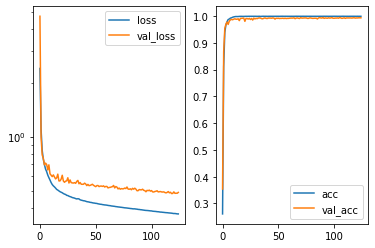

Predicted cell: NonMatureP1 Probability: [[0.99948716]]
True Cell type: NonMatureP1
X [[0.5036643]]
True positional value X 0.5
Y [[0.6442682]]
True positional value Y 0.6851851851851852
H [[0.36563593]]
True positional value H 0.3148148148148148
W [[0.37096143]]
True positional value W 0.3888888888888889


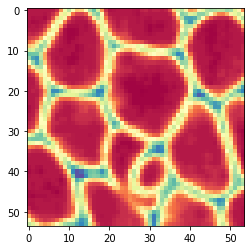

Epoch 126/250
36076/36076 [==============================] - 25s 706us/step - loss: 0.3698 - acc: 0.9994 - val_loss: 0.4846 - val_acc: 0.9926

Epoch 00126: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.4845646185081466, 'val_acc': 0.9926277047838268, 'loss': 0.3698212541759589, 'acc': 0.9993624576431563, 'lr': 1e-04}


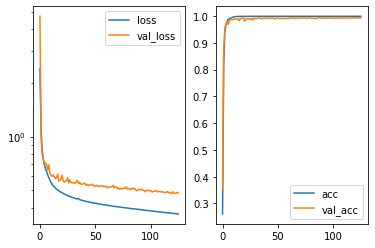

Predicted cell: MatureP1 Probability: [[0.99999976]]
True Cell type: MatureP1
X [[0.503769]]
True positional value X 0.5
Y [[0.4846653]]
True positional value Y 0.5
H [[0.37070465]]
True positional value H 0.4074074074074074
W [[0.33331087]]
True positional value W 0.3148148148148148


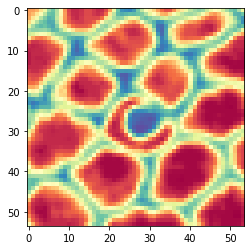

Epoch 127/250
36076/36076 [==============================] - 26s 708us/step - loss: 0.3692 - acc: 0.9992 - val_loss: 0.4798 - val_acc: 0.9937

Epoch 00127: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.4798204368858227, 'val_acc': 0.9936808896667396, 'loss': 0.369208709239854, 'acc': 0.9992238614786252, 'lr': 1e-04}


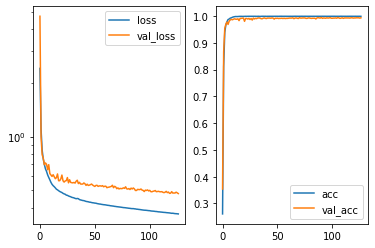

Predicted cell: Normal Probability: [[0.9999833]]
True Cell type: Normal
X [[0.49330798]]
True positional value X 0.5
Y [[0.50451314]]
True positional value Y 0.5
H [[0.38871956]]
True positional value H 0.2962962962962963
W [[0.36803794]]
True positional value W 0.25925925925925924


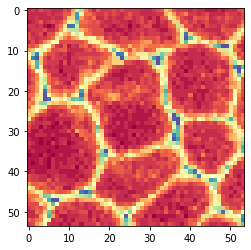

Epoch 128/250
36076/36076 [==============================] - 25s 706us/step - loss: 0.3684 - acc: 0.9994 - val_loss: 0.4771 - val_acc: 0.9926

Epoch 00128: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.4770900080742618, 'val_acc': 0.9926277047838268, 'loss': 0.3683920881445253, 'acc': 0.9993624576431563, 'lr': 1e-04}


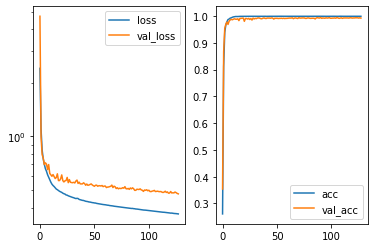

Predicted cell: Normal Probability: [[0.99999917]]
True Cell type: Normal
X [[0.50558835]]
True positional value X 0.5
Y [[0.4915453]]
True positional value Y 0.5
H [[0.27482873]]
True positional value H 0.2777777777777778
W [[0.3256389]]
True positional value W 0.3888888888888889


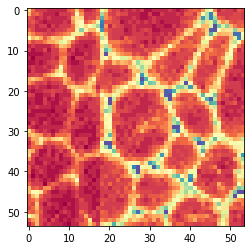

Epoch 129/250
36076/36076 [==============================] - 25s 706us/step - loss: 0.3680 - acc: 0.9994 - val_loss: 0.4761 - val_acc: 0.9932

Epoch 00129: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.4761162763240778, 'val_acc': 0.9931542972252833, 'loss': 0.3679617050944708, 'acc': 0.9993901768760626, 'lr': 1e-04}


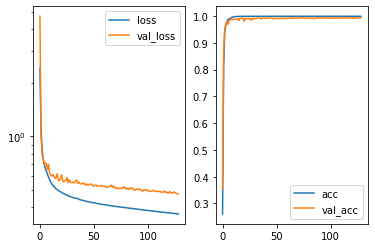

Predicted cell: Normal Probability: [[0.9999249]]
True Cell type: Normal
X [[0.60636574]]
True positional value X 0.5
Y [[0.46265525]]
True positional value Y 0.5
H [[0.1941134]]
True positional value H 0.12962962962962962
W [[0.21686819]]
True positional value W 0.16666666666666666


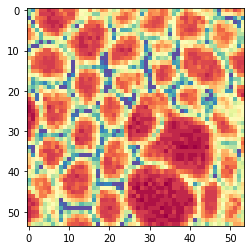

Epoch 130/250
36076/36076 [==============================] - 26s 708us/step - loss: 0.3673 - acc: 0.9994 - val_loss: 0.4814 - val_acc: 0.9926

Epoch 00130: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.4814260529806389, 'val_acc': 0.9926277058196106, 'loss': 0.3672818256721143, 'acc': 0.9994178961089688, 'lr': 1e-04}


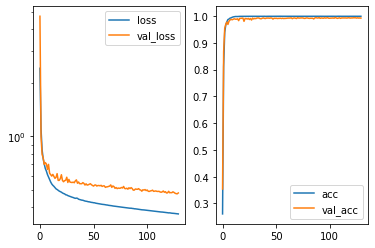

Predicted cell: Normal Probability: [[0.99999535]]
True Cell type: Normal
X [[0.56858313]]
True positional value X 0.5
Y [[0.49478734]]
True positional value Y 0.5
H [[0.22800615]]
True positional value H 0.25925925925925924
W [[0.2749231]]
True positional value W 0.2777777777777778


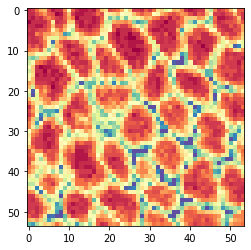

Epoch 131/250
36076/36076 [==============================] - 26s 707us/step - loss: 0.3670 - acc: 0.9992 - val_loss: 0.4773 - val_acc: 0.9932

Epoch 00131: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.4773119796791348, 'val_acc': 0.9931542972252833, 'loss': 0.36695420384169125, 'acc': 0.9992238614786252, 'lr': 1e-04}


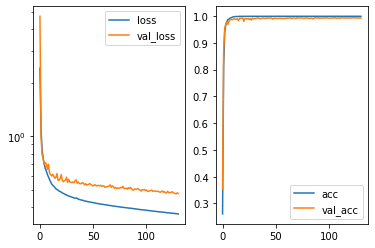

Predicted cell: MatureP1 Probability: [[0.9999918]]
True Cell type: MatureP1
X [[0.4984277]]
True positional value X 0.5
Y [[0.70171446]]
True positional value Y 0.6851851851851862
H [[0.30763274]]
True positional value H 0.3148148148148148
W [[0.24074832]]
True positional value W 0.25925925925925924


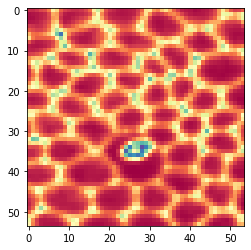

Epoch 132/250
36076/36076 [==============================] - 26s 713us/step - loss: 0.3666 - acc: 0.9993 - val_loss: 0.4824 - val_acc: 0.9916

Epoch 00132: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.48244666392518193, 'val_acc': 0.991574519900914, 'loss': 0.3665613624952838, 'acc': 0.9992515807115314, 'lr': 1e-04}


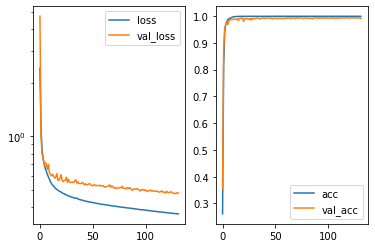

Predicted cell: NonMatureP1 Probability: [[0.99998987]]
True Cell type: NonMatureP1
X [[0.6800834]]
True positional value X 0.6851851851851852
Y [[0.50760764]]
True positional value Y 0.5
H [[0.40342125]]
True positional value H 0.42592592592592593
W [[0.4022693]]
True positional value W 0.35185185185185186


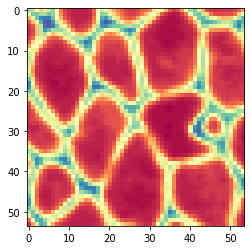

Epoch 133/250
36076/36076 [==============================] - 26s 711us/step - loss: 0.3657 - acc: 0.9993 - val_loss: 0.4770 - val_acc: 0.9937

Epoch 00133: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.4769980865224152, 'val_acc': 0.9936808896667396, 'loss': 0.36574404360793594, 'acc': 0.9992792999444376, 'lr': 1e-04}


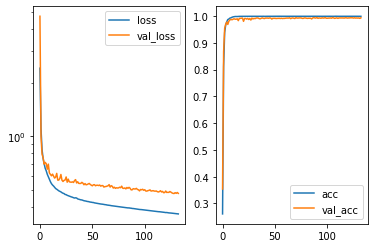

Predicted cell: MacroCheate Probability: [[0.9999988]]
True Cell type: MacroCheate
X [[0.31153825]]
True positional value X 0.3148148148148148
Y [[0.4942397]]
True positional value Y 0.5
H [[0.55808973]]
True positional value H 0.6296296296296297
W [[0.60879666]]
True positional value W 0.6481481481481481


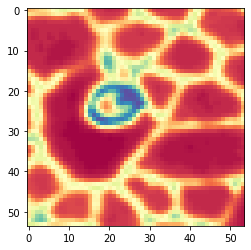

Epoch 134/250
36076/36076 [==============================] - 26s 713us/step - loss: 0.3652 - acc: 0.9993 - val_loss: 0.4766 - val_acc: 0.9937

Epoch 00134: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.4766125024432192, 'val_acc': 0.9936808896667396, 'loss': 0.3651735067056941, 'acc': 0.9992792999444376, 'lr': 1e-04}


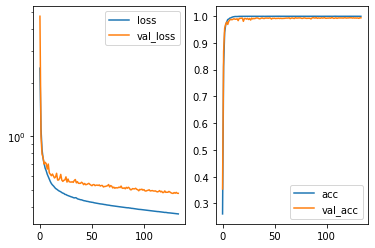

Predicted cell: Normal Probability: [[1.]]
True Cell type: Normal
X [[0.5216707]]
True positional value X 0.5
Y [[0.48269165]]
True positional value Y 0.5
H [[0.34374413]]
True positional value H 0.3888888888888889
W [[0.5025827]]
True positional value W 0.48148148148148145


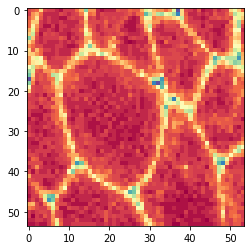

Epoch 135/250
36076/36076 [==============================] - 25s 706us/step - loss: 0.3647 - acc: 0.9993 - val_loss: 0.4712 - val_acc: 0.9932

Epoch 00135: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.4711730872536409, 'val_acc': 0.9931542972252833, 'loss': 0.3646601217821916, 'acc': 0.9992792999444376, 'lr': 1e-04}


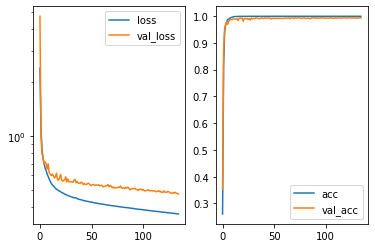

Predicted cell: MacroCheate Probability: [[0.99949145]]
True Cell type: MacroCheate
X [[0.69067276]]
True positional value X 0.6851851851851852
Y [[0.35339037]]
True positional value Y 0.3148148148148148
H [[0.60044146]]
True positional value H 0.6481481481481481
W [[0.6750355]]
True positional value W 0.6851851851851852


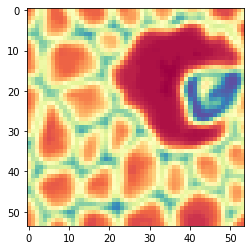

Epoch 136/250
36076/36076 [==============================] - 25s 706us/step - loss: 0.3642 - acc: 0.9993 - val_loss: 0.4770 - val_acc: 0.9937

Epoch 00136: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.47697442620914193, 'val_acc': 0.9936808896667396, 'loss': 0.36416032366774304, 'acc': 0.9993347384102501, 'lr': 1e-04}


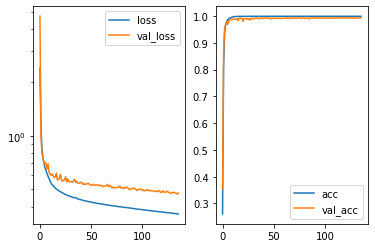

Predicted cell: MacroCheate Probability: [[0.9999747]]
True Cell type: MacroCheate
X [[0.30319667]]
True positional value X 0.3148148148148148
Y [[0.34914207]]
True positional value Y 0.3148148148148148
H [[0.3787148]]
True positional value H 0.4074074074074074
W [[0.54519176]]
True positional value W 0.6111111111111112


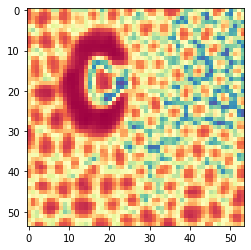

Epoch 137/250
36076/36076 [==============================] - 26s 710us/step - loss: 0.3635 - acc: 0.9993 - val_loss: 0.4732 - val_acc: 0.9937

Epoch 00137: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.47321706019997156, 'val_acc': 0.9936808896667396, 'loss': 0.36350794620122145, 'acc': 0.9992515806652699, 'lr': 1e-04}


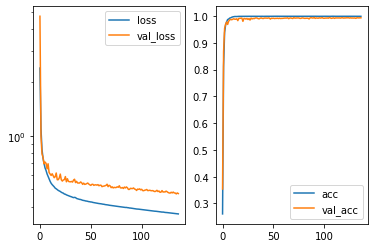

Predicted cell: MatureP1 Probability: [[0.99999976]]
True Cell type: MatureP1
X [[0.6625706]]
True positional value X 0.6851851851851852
Y [[0.51949215]]
True positional value Y 0.5
H [[0.42611158]]
True positional value H 0.42592592592592593
W [[0.29870263]]
True positional value W 0.3333333333333333


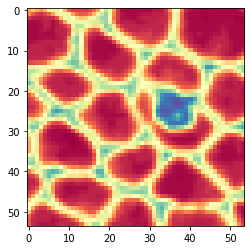

Epoch 138/250
36076/36076 [==============================] - 26s 708us/step - loss: 0.3631 - acc: 0.9992 - val_loss: 0.4717 - val_acc: 0.9926

Epoch 00138: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.4717225394417199, 'val_acc': 0.9926277047838268, 'loss': 0.3630690045943082, 'acc': 0.9992238614786252, 'lr': 1e-04}


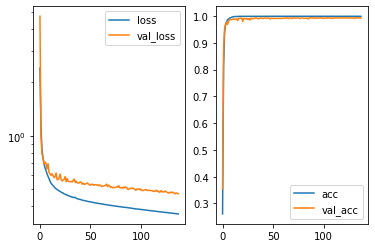

Predicted cell: Normal Probability: [[0.9999995]]
True Cell type: Normal
X [[0.5267116]]
True positional value X 0.5
Y [[0.48959994]]
True positional value Y 0.5
H [[0.31495684]]
True positional value H 0.24074074074074073
W [[0.42718914]]
True positional value W 0.25925925925925924


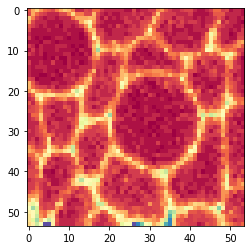

Epoch 139/250
36076/36076 [==============================] - 26s 710us/step - loss: 0.3625 - acc: 0.9993 - val_loss: 0.4784 - val_acc: 0.9937

Epoch 00139: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.4784378054865164, 'val_acc': 0.9936808896667396, 'loss': 0.3625112803644002, 'acc': 0.9993347384102501, 'lr': 1e-04}


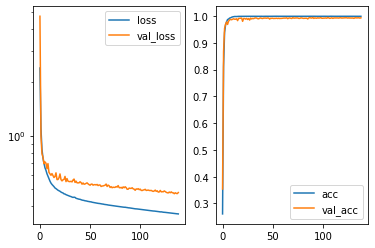

Predicted cell: MatureP1 Probability: [[0.9999999]]
True Cell type: MatureP1
X [[0.31414753]]
True positional value X 0.3148148148148148
Y [[0.31960878]]
True positional value Y 0.3148148148148148
H [[0.3680031]]
True positional value H 0.35185185185185186
W [[0.34731558]]
True positional value W 0.35185185185185186


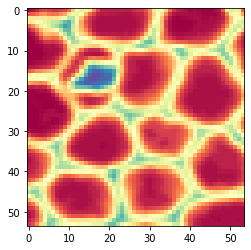

Epoch 140/250
36076/36076 [==============================] - 26s 707us/step - loss: 0.3619 - acc: 0.9992 - val_loss: 0.4713 - val_acc: 0.9932

Epoch 00140: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.47130962313320085, 'val_acc': 0.9931542972252833, 'loss': 0.361853886901678, 'acc': 0.9992238614786252, 'lr': 1e-04}


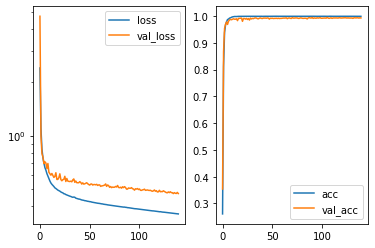

Predicted cell: MacroCheate Probability: [[1.]]
True Cell type: MacroCheate
X [[0.3060701]]
True positional value X 0.3148148148148148
Y [[0.48235965]]
True positional value Y 0.5
H [[0.63695294]]
True positional value H 0.6851851851851852
W [[0.69022924]]
True positional value W 0.7777777777777778


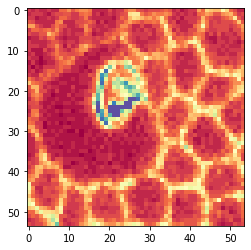

Epoch 141/250
36076/36076 [==============================] - 26s 708us/step - loss: 0.3616 - acc: 0.9993 - val_loss: 0.4726 - val_acc: 0.9932

Epoch 00141: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.47262450760763025, 'val_acc': 0.9931542972252833, 'loss': 0.36162288626898603, 'acc': 0.9992515807115314, 'lr': 1e-04}


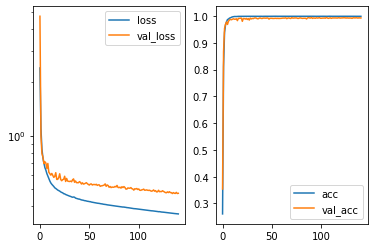

Predicted cell: MatureP1 Probability: [[0.999764]]
True Cell type: MatureP1
X [[0.6609396]]
True positional value X 0.6851851851851852
Y [[0.32675582]]
True positional value Y 0.3148148148148148
H [[0.30283585]]
True positional value H 0.25925925925925924
W [[0.23029828]]
True positional value W 0.18518518518518517


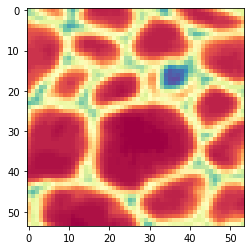

Epoch 142/250
36076/36076 [==============================] - 26s 707us/step - loss: 0.3604 - acc: 0.9994 - val_loss: 0.4717 - val_acc: 0.9937

Epoch 00142: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.47171876537542456, 'val_acc': 0.9936808896667396, 'loss': 0.36043028759313983, 'acc': 0.9994178961089688, 'lr': 1e-04}


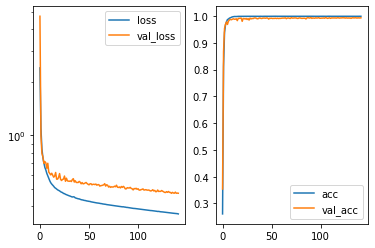

Predicted cell: Normal Probability: [[0.9999999]]
True Cell type: Normal
X [[0.5145223]]
True positional value X 0.5
Y [[0.47610414]]
True positional value Y 0.5
H [[0.30907074]]
True positional value H 0.37037037037037035
W [[0.30366242]]
True positional value W 0.37037037037037035


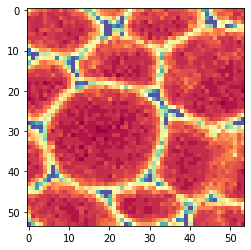

Epoch 143/250
36076/36076 [==============================] - 25s 707us/step - loss: 0.3605 - acc: 0.9993 - val_loss: 0.4713 - val_acc: 0.9937

Epoch 00143: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.4713012408023762, 'val_acc': 0.9936808896667396, 'loss': 0.3604666065853839, 'acc': 0.9992792999444376, 'lr': 1e-04}


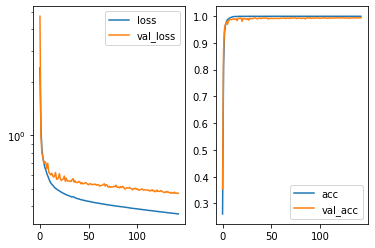

Predicted cell: MacroCheate Probability: [[1.]]
True Cell type: MacroCheate
X [[0.5050447]]
True positional value X 0.5
Y [[0.490443]]
True positional value Y 0.5
H [[0.6638851]]
True positional value H 0.6666666666666666
W [[0.6480446]]
True positional value W 0.5370370370370371


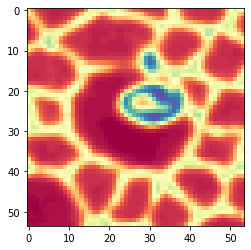

Epoch 144/250
36076/36076 [==============================] - 25s 707us/step - loss: 0.3602 - acc: 0.9993 - val_loss: 0.4752 - val_acc: 0.9910

Epoch 00144: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.4751576804499553, 'val_acc': 0.9910479274594577, 'loss': 0.36020697566883725, 'acc': 0.9993347384102501, 'lr': 1e-04}


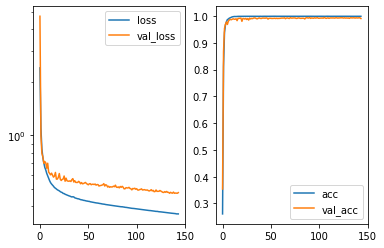

Predicted cell: MatureP1 Probability: [[0.9999989]]
True Cell type: MatureP1
X [[0.31680268]]
True positional value X 0.3148148148148148
Y [[0.5127724]]
True positional value Y 0.5
H [[0.3308146]]
True positional value H 0.35185185185185186
W [[0.32961702]]
True positional value W 0.2962962962962963


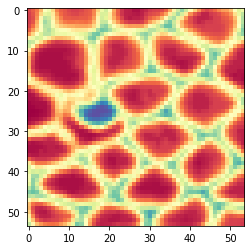

Epoch 145/250
36076/36076 [==============================] - 26s 710us/step - loss: 0.3595 - acc: 0.9993 - val_loss: 0.4724 - val_acc: 0.9910

Epoch 00145: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.47237491370691254, 'val_acc': 0.9910479274594577, 'loss': 0.35951109427955835, 'acc': 0.9993070191773439, 'lr': 1e-04}


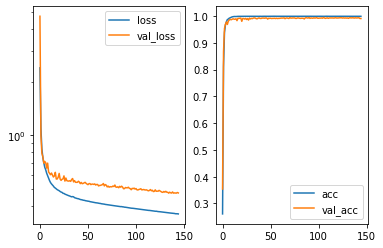

Predicted cell: MacroCheate Probability: [[1.]]
True Cell type: MacroCheate
X [[0.33359504]]
True positional value X 0.3148148148148148
Y [[0.4865143]]
True positional value Y 0.5
H [[0.596569]]
True positional value H 0.5925925925925926
W [[0.59579027]]
True positional value W 0.5925925925925926


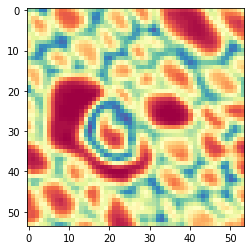

Epoch 146/250
36076/36076 [==============================] - 26s 712us/step - loss: 0.3592 - acc: 0.9993 - val_loss: 0.4666 - val_acc: 0.9926

Epoch 00146: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.46664733829279836, 'val_acc': 0.9926277047838268, 'loss': 0.35921409443947705, 'acc': 0.9992515807115314, 'lr': 1e-04}


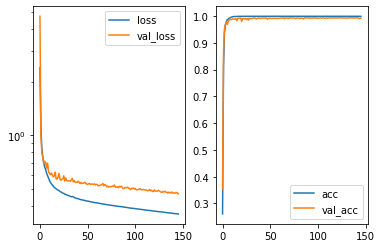

Predicted cell: MacroCheate Probability: [[0.9999343]]
True Cell type: MacroCheate
X [[0.3373474]]
True positional value X 0.3148148148148148
Y [[0.320705]]
True positional value Y 0.3148148148148148
H [[0.40054724]]
True positional value H 0.4074074074074074
W [[0.5739325]]
True positional value W 0.5370370370370371


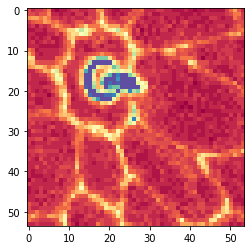

Epoch 147/250
36076/36076 [==============================] - 26s 708us/step - loss: 0.3583 - acc: 0.9993 - val_loss: 0.4731 - val_acc: 0.9937

Epoch 00147: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.4730829070466892, 'val_acc': 0.9936808896667396, 'loss': 0.3583347215820593, 'acc': 0.9993347384102501, 'lr': 1e-04}


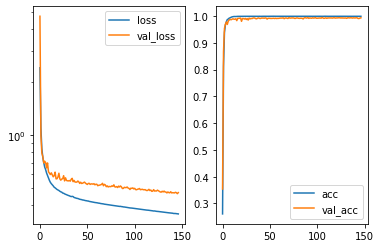

Predicted cell: MacroCheate Probability: [[0.9999933]]
True Cell type: MacroCheate
X [[0.6985503]]
True positional value X 0.6851851851851852
Y [[0.6825392]]
True positional value Y 0.6851851851851852
H [[0.3483268]]
True positional value H 0.42592592592592593
W [[0.4149021]]
True positional value W 0.4074074074074074


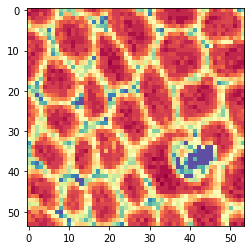

Epoch 148/250
36076/36076 [==============================] - 26s 707us/step - loss: 0.3580 - acc: 0.9993 - val_loss: 0.4777 - val_acc: 0.9932

Epoch 00148: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.47768903640209215, 'val_acc': 0.9931542982610669, 'loss': 0.3579647559286393, 'acc': 0.9993070191773439, 'lr': 1e-04}


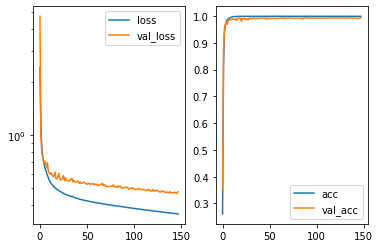

Predicted cell: Normal Probability: [[1.]]
True Cell type: Normal
X [[0.5233201]]
True positional value X 0.5
Y [[0.49412787]]
True positional value Y 0.5
H [[0.5342221]]
True positional value H 0.5740740740740741
W [[0.50116646]]
True positional value W 0.5


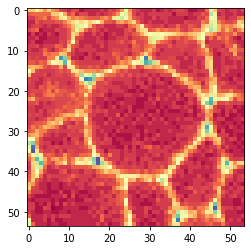

Epoch 149/250
36076/36076 [==============================] - 26s 709us/step - loss: 0.3575 - acc: 0.9994 - val_loss: 0.4646 - val_acc: 0.9926

Epoch 00149: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.4646330857634733, 'val_acc': 0.9926277047838268, 'loss': 0.3574702578758583, 'acc': 0.9993901768760626, 'lr': 1e-04}


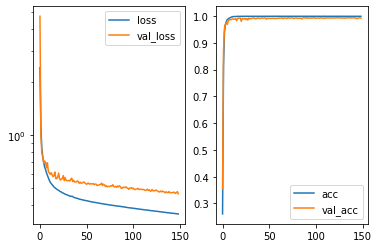

Predicted cell: MacroCheate Probability: [[1.]]
True Cell type: MacroCheate
X [[0.5107453]]
True positional value X 0.5
Y [[0.302958]]
True positional value Y 0.3148148148148148
H [[0.5003892]]
True positional value H 0.5370370370370371
W [[0.8084154]]
True positional value W 0.8888888888888888


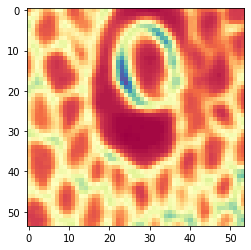

Epoch 150/250
36076/36076 [==============================] - 26s 708us/step - loss: 0.3571 - acc: 0.9993 - val_loss: 0.4696 - val_acc: 0.9932

Epoch 00150: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.4696251299897265, 'val_acc': 0.9931542972252833, 'loss': 0.3571084483174213, 'acc': 0.9993070191773439, 'lr': 1e-04}


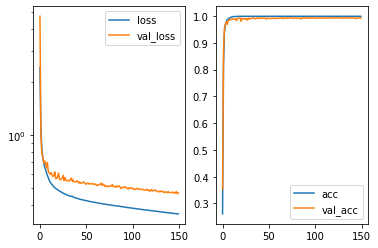

Predicted cell: MatureP1 Probability: [[0.9993012]]
True Cell type: MatureP1
X [[0.6278994]]
True positional value X 0.6851851851851852
Y [[0.45914036]]
True positional value Y 0.5
H [[0.5526813]]
True positional value H 0.5
W [[0.31354162]]
True positional value W 0.2962962962962963


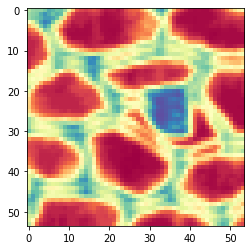

Epoch 151/250
36076/36076 [==============================] - 25s 706us/step - loss: 0.3562 - acc: 0.9995 - val_loss: 0.4684 - val_acc: 0.9916

Epoch 00151: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.4684082025317784, 'val_acc': 0.991574519900914, 'loss': 0.35618347127813765, 'acc': 0.9994733345747814, 'lr': 1e-04}


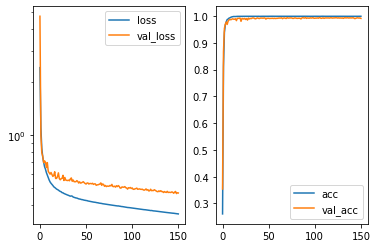

Predicted cell: MatureP1 Probability: [[0.99999905]]
True Cell type: MatureP1
X [[0.6873145]]
True positional value X 0.6851851851851852
Y [[0.7022406]]
True positional value Y 0.6851851851851852
H [[0.24594638]]
True positional value H 0.25925925925925924
W [[0.2920236]]
True positional value W 0.2962962962962963


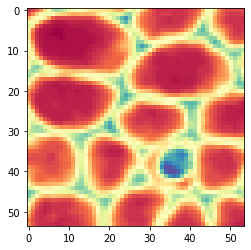

Epoch 152/250
36076/36076 [==============================] - 26s 709us/step - loss: 0.3556 - acc: 0.9994 - val_loss: 0.4691 - val_acc: 0.9926

Epoch 00152: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.4691014347137935, 'val_acc': 0.9926277047838268, 'loss': 0.35561253378761093, 'acc': 0.9993624576431563, 'lr': 1e-04}


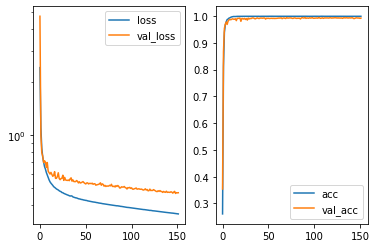

Predicted cell: MacroCheate Probability: [[0.9999931]]
True Cell type: MacroCheate
X [[0.29213846]]
True positional value X 0.3148148148148148
Y [[0.7063179]]
True positional value Y 0.6851851851851852
H [[0.73258865]]
True positional value H 0.7777777777777778
W [[0.6309558]]
True positional value W 0.6111111111111112


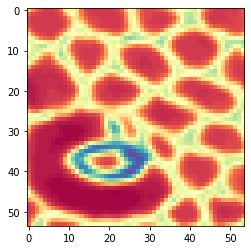

Epoch 153/250
36076/36076 [==============================] - 25s 706us/step - loss: 0.3552 - acc: 0.9994 - val_loss: 0.4690 - val_acc: 0.9926

Epoch 00153: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.4689911889082008, 'val_acc': 0.9926277047838268, 'loss': 0.3552258760612679, 'acc': 0.9994178961089688, 'lr': 1e-04}


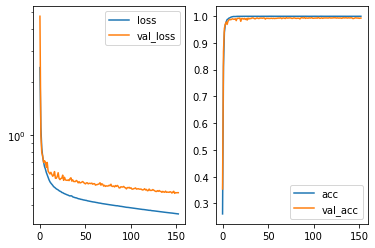

Predicted cell: MatureP1 Probability: [[0.9999697]]
True Cell type: MatureP1
X [[0.6629715]]
True positional value X 0.6851851851851852
Y [[0.500653]]
True positional value Y 0.5
H [[0.21142732]]
True positional value H 0.2037037037037037
W [[0.26639813]]
True positional value W 0.25925925925925924


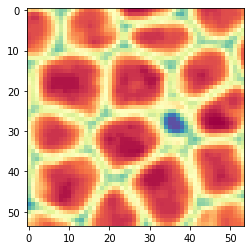

Epoch 154/250
36076/36076 [==============================] - 26s 707us/step - loss: 0.3548 - acc: 0.9993 - val_loss: 0.4627 - val_acc: 0.9910

Epoch 00154: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.4627470344289345, 'val_acc': 0.9910479274594577, 'loss': 0.3548335800818295, 'acc': 0.9993347384102501, 'lr': 1e-04}


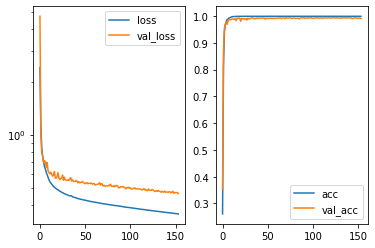

Predicted cell: MatureP1 Probability: [[0.9999056]]
True Cell type: MatureP1
X [[0.52139235]]
True positional value X 0.5
Y [[0.28645873]]
True positional value Y 0.3148148148148148
H [[0.44103682]]
True positional value H 0.48148148148148145
W [[0.40144068]]
True positional value W 0.35185185185185186


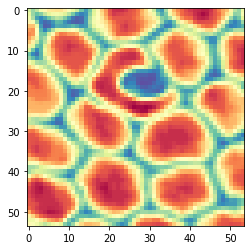

Epoch 155/250
36076/36076 [==============================] - 26s 708us/step - loss: 0.3543 - acc: 0.9993 - val_loss: 0.4645 - val_acc: 0.9942

Epoch 00155: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.46449543145721117, 'val_acc': 0.994207482108196, 'loss': 0.3543111040423273, 'acc': 0.9993347384102501, 'lr': 1e-04}


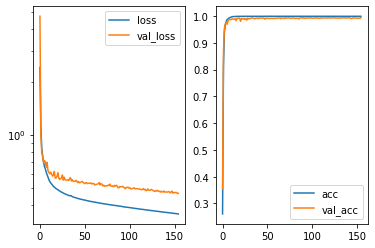

Predicted cell: Normal Probability: [[0.99999774]]
True Cell type: Normal
X [[0.5026536]]
True positional value X 0.5
Y [[0.5059278]]
True positional value Y 0.5
H [[0.23405054]]
True positional value H 0.3888888888888889
W [[0.3379954]]
True positional value W 0.4444444444444444


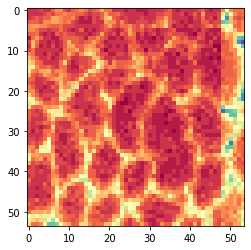

Epoch 156/250
36076/36076 [==============================] - 26s 707us/step - loss: 0.3536 - acc: 0.9993 - val_loss: 0.4602 - val_acc: 0.9942

Epoch 00156: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.4602045401766025, 'val_acc': 0.994207482108196, 'loss': 0.3536400066925954, 'acc': 0.9992792999444376, 'lr': 1e-04}


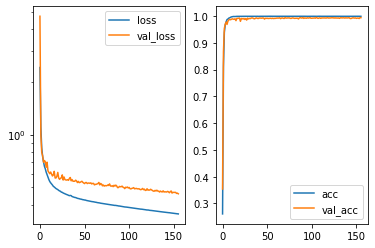

Predicted cell: Normal Probability: [[0.9999999]]
True Cell type: Normal
X [[0.51431197]]
True positional value X 0.5
Y [[0.49430126]]
True positional value Y 0.5
H [[0.31192786]]
True positional value H 0.2962962962962963
W [[0.32044825]]
True positional value W 0.3148148148148148


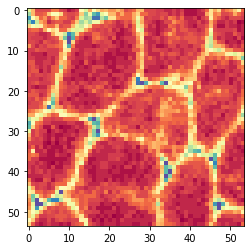

Epoch 157/250
36076/36076 [==============================] - 26s 709us/step - loss: 0.3532 - acc: 0.9993 - val_loss: 0.4649 - val_acc: 0.9937

Epoch 00157: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.4649355959553289, 'val_acc': 0.9936808896667396, 'loss': 0.3531526717282885, 'acc': 0.9993347384102501, 'lr': 1e-04}


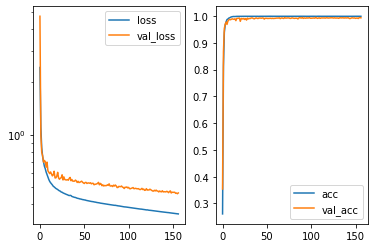

Predicted cell: Normal Probability: [[0.9999993]]
True Cell type: Normal
X [[0.47278556]]
True positional value X 0.5
Y [[0.50801253]]
True positional value Y 0.5
H [[0.18399683]]
True positional value H 0.2037037037037037
W [[0.24862354]]
True positional value W 0.2777777777777778


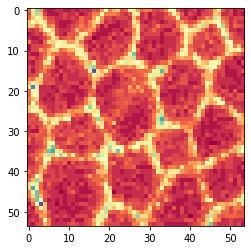

Epoch 158/250
36076/36076 [==============================] - 26s 709us/step - loss: 0.3530 - acc: 0.9993 - val_loss: 0.4634 - val_acc: 0.9916

Epoch 00158: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.4633998038926961, 'val_acc': 0.991574519900914, 'loss': 0.35301406728294793, 'acc': 0.9993070191773439, 'lr': 1e-04}


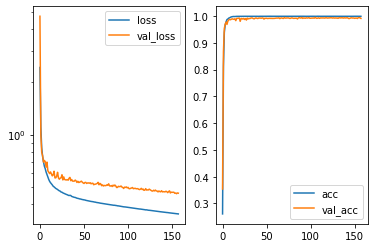

Predicted cell: MacroCheate Probability: [[0.99999964]]
True Cell type: MacroCheate
X [[0.6481103]]
True positional value X 0.6851851851851852
Y [[0.7061391]]
True positional value Y 0.6851851851851852
H [[0.50660026]]
True positional value H 0.46296296296296297
W [[0.70788807]]
True positional value W 0.6666666666666666


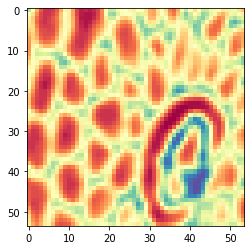

Epoch 159/250
36076/36076 [==============================] - 26s 710us/step - loss: 0.3521 - acc: 0.9993 - val_loss: 0.4652 - val_acc: 0.9937

Epoch 00159: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.4652495297430188, 'val_acc': 0.9936808896667396, 'loss': 0.3520828221368742, 'acc': 0.9992792999444376, 'lr': 1e-04}


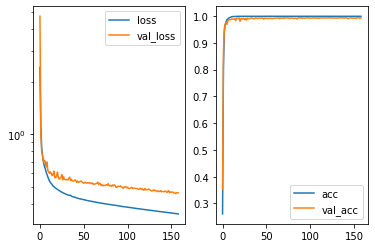

Predicted cell: Normal Probability: [[1.]]
True Cell type: Normal
X [[0.4919575]]
True positional value X 0.5
Y [[0.50587386]]
True positional value Y 0.5
H [[0.3015305]]
True positional value H 0.3148148148148148
W [[0.31450546]]
True positional value W 0.35185185185185186


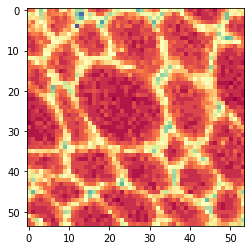

Epoch 160/250
36076/36076 [==============================] - 26s 710us/step - loss: 0.3518 - acc: 0.9992 - val_loss: 0.4603 - val_acc: 0.9937

Epoch 00160: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.46029211229999295, 'val_acc': 0.9936808896667396, 'loss': 0.3518330762994066, 'acc': 0.9992238614786252, 'lr': 1e-04}


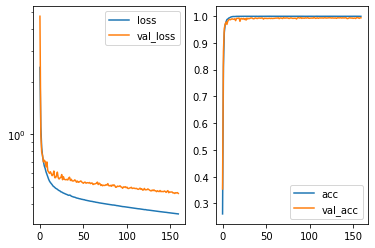

Predicted cell: MatureP1 Probability: [[0.9999999]]
True Cell type: MatureP1
X [[0.30278403]]
True positional value X 0.3148148148148148
Y [[0.49945498]]
True positional value Y 0.5
H [[0.47606793]]
True positional value H 0.5
W [[0.42659155]]
True positional value W 0.4074074074074074


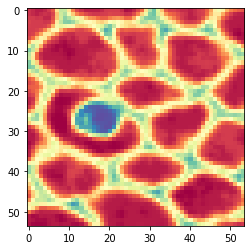

Epoch 161/250
36076/36076 [==============================] - 26s 710us/step - loss: 0.3511 - acc: 0.9994 - val_loss: 0.4610 - val_acc: 0.9932

Epoch 00161: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.4610307143354742, 'val_acc': 0.9931542972252833, 'loss': 0.3510737131018374, 'acc': 0.9993624576431563, 'lr': 1e-04}


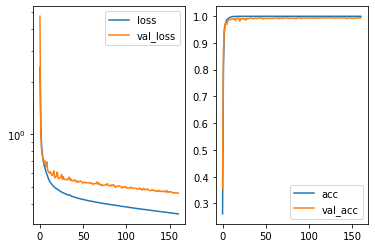

Predicted cell: NonMatureP1 Probability: [[0.99999833]]
True Cell type: NonMatureP1
X [[0.52452517]]
True positional value X 0.5
Y [[0.46157882]]
True positional value Y 0.5
H [[0.4142233]]
True positional value H 0.35185185185185186
W [[0.3153835]]
True positional value W 0.2962962962962963


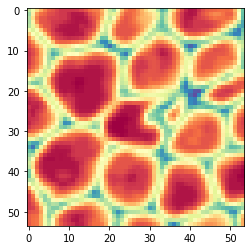

Epoch 162/250
36076/36076 [==============================] - 25s 706us/step - loss: 0.3504 - acc: 0.9993 - val_loss: 0.4585 - val_acc: 0.9942

Epoch 00162: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.4585284715956798, 'val_acc': 0.994207482108196, 'loss': 0.3503826476079237, 'acc': 0.9992792999444376, 'lr': 1e-04}


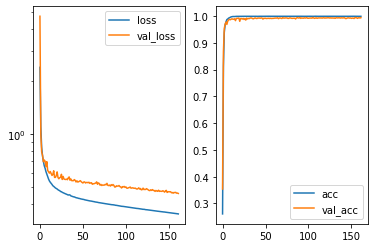

Predicted cell: NonMatureP1 Probability: [[0.99999785]]
True Cell type: NonMatureP1
X [[0.30526417]]
True positional value X 0.3148148148148148
Y [[0.5107819]]
True positional value Y 0.5
H [[0.47825432]]
True positional value H 0.4444444444444444
W [[0.41667622]]
True positional value W 0.46296296296296297


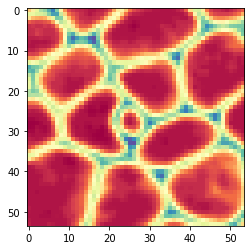

Epoch 163/250
36076/36076 [==============================] - 26s 708us/step - loss: 0.3501 - acc: 0.9993 - val_loss: 0.4592 - val_acc: 0.9932

Epoch 00163: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.45924408689117735, 'val_acc': 0.9931542972252833, 'loss': 0.3500857101646994, 'acc': 0.9992515807115314, 'lr': 1e-04}


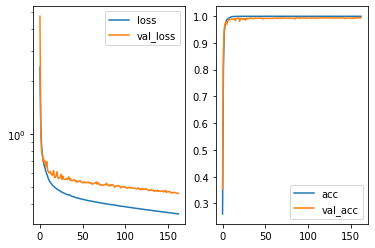

Predicted cell: NonMatureP1 Probability: [[0.999997]]
True Cell type: NonMatureP1
X [[0.6686388]]
True positional value X 0.6851851851851852
Y [[0.49215567]]
True positional value Y 0.5
H [[0.4208146]]
True positional value H 0.3888888888888889
W [[0.35744286]]
True positional value W 0.37037037037037035


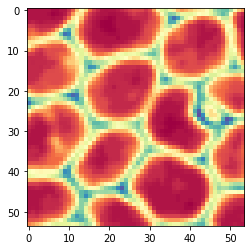

Epoch 164/250
36076/36076 [==============================] - 26s 708us/step - loss: 0.3497 - acc: 0.9993 - val_loss: 0.4573 - val_acc: 0.9942

Epoch 00164: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.4572937046464586, 'val_acc': 0.994207482108196, 'loss': 0.3497330748013163, 'acc': 0.9992515807115314, 'lr': 1e-04}


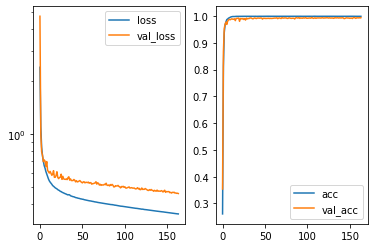

Predicted cell: MacroCheate Probability: [[1.]]
True Cell type: MacroCheate
X [[0.6802902]]
True positional value X 0.6851851851851852
Y [[0.29903713]]
True positional value Y 0.3148148148148148
H [[0.54151213]]
True positional value H 0.5185185185185185
W [[0.48104838]]
True positional value W 0.46296296296296297


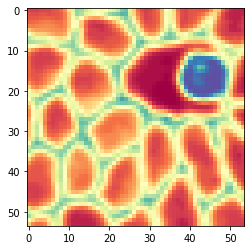

Epoch 165/250
36076/36076 [==============================] - 26s 709us/step - loss: 0.3493 - acc: 0.9993 - val_loss: 0.4555 - val_acc: 0.9942

Epoch 00165: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.4554749488391143, 'val_acc': 0.994207482108196, 'loss': 0.34933161041612093, 'acc': 0.9993347384102501, 'lr': 1e-04}


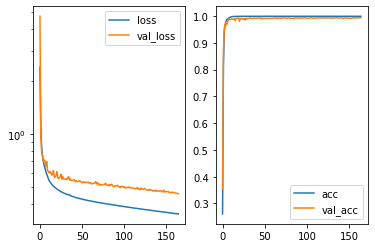

Predicted cell: MatureP1 Probability: [[1.]]
True Cell type: MatureP1
X [[0.6711805]]
True positional value X 0.6851851851851852
Y [[0.3048182]]
True positional value Y 0.3148148148148148
H [[0.5149062]]
True positional value H 0.5185185185185185
W [[0.32068712]]
True positional value W 0.3333333333333333


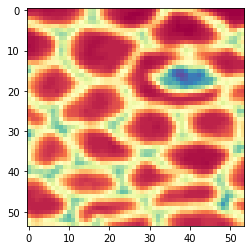

Epoch 166/250
36076/36076 [==============================] - 25s 706us/step - loss: 0.3487 - acc: 0.9993 - val_loss: 0.4594 - val_acc: 0.9942

Epoch 00166: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.45937773329512327, 'val_acc': 0.994207482108196, 'loss': 0.34874492072123275, 'acc': 0.9993070191773439, 'lr': 1e-04}


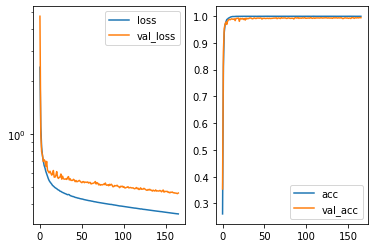

Predicted cell: MacroCheate Probability: [[0.9999672]]
True Cell type: MacroCheate
X [[0.3123742]]
True positional value X 0.3148148148148148
Y [[0.309675]]
True positional value Y 0.3148148148148148
H [[0.41743916]]
True positional value H 0.3888888888888889
W [[0.4727593]]
True positional value W 0.48148148148148145


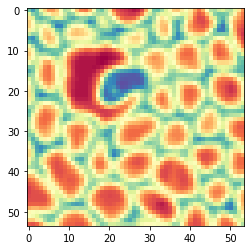

Epoch 167/250
36076/36076 [==============================] - 26s 709us/step - loss: 0.3481 - acc: 0.9993 - val_loss: 0.4635 - val_acc: 0.9937

Epoch 00167: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.46350852667249587, 'val_acc': 0.9936808896667396, 'loss': 0.34808683056355, 'acc': 0.9993070191773439, 'lr': 1e-04}


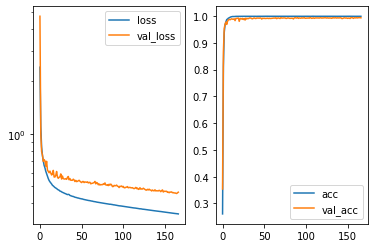

Predicted cell: MatureP1 Probability: [[0.99999964]]
True Cell type: MatureP1
X [[0.2957148]]
True positional value X 0.3148148148148148
Y [[0.501683]]
True positional value Y 0.5
H [[0.47012582]]
True positional value H 0.46296296296296297
W [[0.33459404]]
True positional value W 0.3333333333333333


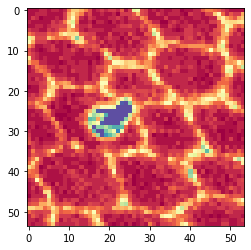

Epoch 168/250
36076/36076 [==============================] - 26s 712us/step - loss: 0.3478 - acc: 0.9993 - val_loss: 0.4613 - val_acc: 0.9937

Epoch 00168: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.4613432328973462, 'val_acc': 0.9936808896667396, 'loss': 0.3477848907283119, 'acc': 0.9993347383639887, 'lr': 1e-04}


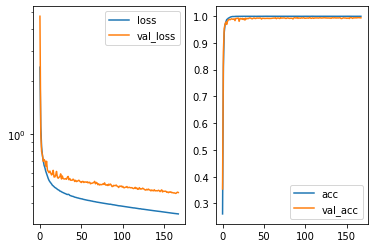

Predicted cell: NonMatureP1 Probability: [[0.9999968]]
True Cell type: NonMatureP1
X [[0.27845842]]
True positional value X 0.3148148148148148
Y [[0.5097857]]
True positional value Y 0.5
H [[0.33317357]]
True positional value H 0.3333333333333333
W [[0.31770018]]
True positional value W 0.3148148148148148


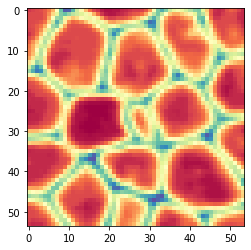

Epoch 169/250
36076/36076 [==============================] - 26s 712us/step - loss: 0.3471 - acc: 0.9993 - val_loss: 0.4544 - val_acc: 0.9942

Epoch 00169: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.4543929316452643, 'val_acc': 0.994207482108196, 'loss': 0.34708495063545935, 'acc': 0.9993347384102501, 'lr': 1e-04}


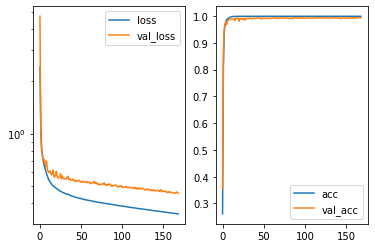

Predicted cell: MacroCheate Probability: [[1.]]
True Cell type: MacroCheate
X [[0.68375504]]
True positional value X 0.6851851851851852
Y [[0.31987178]]
True positional value Y 0.3148148148148148
H [[0.7951206]]
True positional value H 0.7777777777777778
W [[0.66982365]]
True positional value W 0.6666666666666666


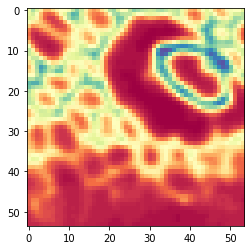

Epoch 170/250
36076/36076 [==============================] - 26s 710us/step - loss: 0.3466 - acc: 0.9994 - val_loss: 0.4569 - val_acc: 0.9932

Epoch 00170: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.4569077933380766, 'val_acc': 0.9931542972252833, 'loss': 0.34664617123790453, 'acc': 0.9993624575968949, 'lr': 1e-04}


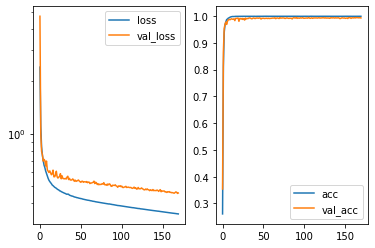

Predicted cell: MacroCheate Probability: [[0.99999964]]
True Cell type: MacroCheate
X [[0.46073997]]
True positional value X 0.5
Y [[0.50227773]]
True positional value Y 0.5
H [[0.7175791]]
True positional value H 0.7037037037037037
W [[0.5263103]]
True positional value W 0.5370370370370371


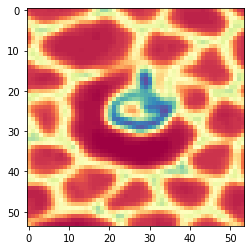

Epoch 171/250
36076/36076 [==============================] - 26s 715us/step - loss: 0.3460 - acc: 0.9994 - val_loss: 0.4569 - val_acc: 0.9921

Epoch 00171: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.45686326159057394, 'val_acc': 0.9921011123423704, 'loss': 0.3460431646839427, 'acc': 0.9993624576431563, 'lr': 1e-04}


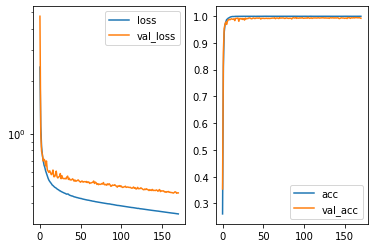

Predicted cell: MatureP1 Probability: [[0.9999963]]
True Cell type: MatureP1
X [[0.6789449]]
True positional value X 0.6851851851851852
Y [[0.5190213]]
True positional value Y 0.5
H [[0.23734443]]
True positional value H 0.2037037037037037
W [[0.24725261]]
True positional value W 0.2037037037037037


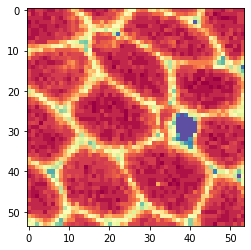

Epoch 172/250
36076/36076 [==============================] - 26s 711us/step - loss: 0.3455 - acc: 0.9993 - val_loss: 0.4590 - val_acc: 0.9932

Epoch 00172: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.4589963567577079, 'val_acc': 0.9931542972252833, 'loss': 0.3455016289638672, 'acc': 0.9992792999444376, 'lr': 1e-04}


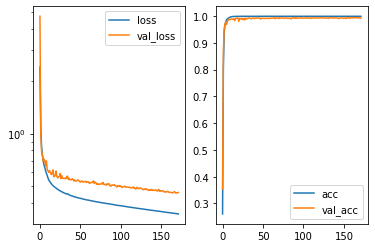

Predicted cell: MatureP1 Probability: [[1.]]
True Cell type: MatureP1
X [[0.4922303]]
True positional value X 0.5
Y [[0.6648336]]
True positional value Y 0.6851851851851852
H [[0.31656307]]
True positional value H 0.35185185185185186
W [[0.28775495]]
True positional value W 0.2962962962962963


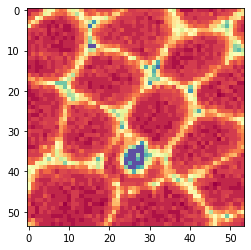

Epoch 173/250
36076/36076 [==============================] - 26s 709us/step - loss: 0.3455 - acc: 0.9993 - val_loss: 0.4591 - val_acc: 0.9942

Epoch 00173: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.4591272364421039, 'val_acc': 0.994207482108196, 'loss': 0.34551403727099483, 'acc': 0.9993070191773439, 'lr': 1e-04}


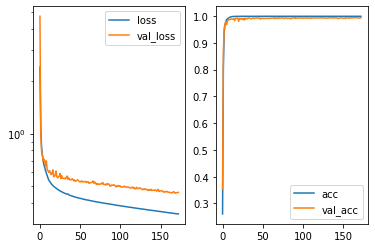

Predicted cell: NonMatureP1 Probability: [[0.9999993]]
True Cell type: NonMatureP1
X [[0.31866923]]
True positional value X 0.3148148148148148
Y [[0.32279766]]
True positional value Y 0.3148148148148148
H [[0.26169288]]
True positional value H 0.3148148148148148
W [[0.3039552]]
True positional value W 0.3148148148148148


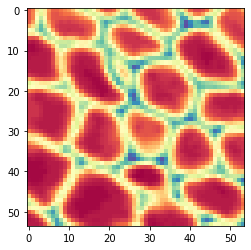

Epoch 174/250
36076/36076 [==============================] - 26s 711us/step - loss: 0.3450 - acc: 0.9993 - val_loss: 0.4713 - val_acc: 0.9905

Epoch 00174: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.4712750007442075, 'val_acc': 0.9905213350180013, 'loss': 0.34500831371202795, 'acc': 0.9992792999444376, 'lr': 1e-04}


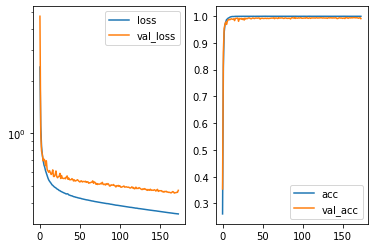

Predicted cell: Normal Probability: [[0.9999988]]
True Cell type: Normal
X [[0.47930717]]
True positional value X 0.5
Y [[0.5066842]]
True positional value Y 0.5
H [[0.18904886]]
True positional value H 0.2037037037037037
W [[0.24957089]]
True positional value W 0.2777777777777778


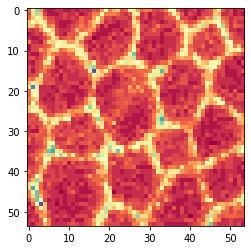

Epoch 175/250
36076/36076 [==============================] - 26s 707us/step - loss: 0.3442 - acc: 0.9993 - val_loss: 0.4548 - val_acc: 0.9937

Epoch 00175: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.45476717809867456, 'val_acc': 0.9936808896667396, 'loss': 0.3442401690663645, 'acc': 0.9992515807115314, 'lr': 1e-04}


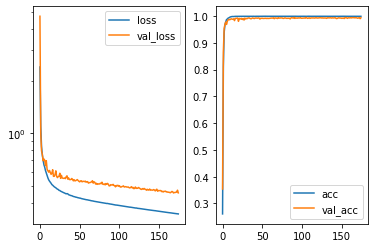

Predicted cell: MacroCheate Probability: [[1.]]
True Cell type: MacroCheate
X [[0.34123418]]
True positional value X 0.3148148148148148
Y [[0.63836783]]
True positional value Y 0.6851851851851852
H [[0.45531857]]
True positional value H 0.5185185185185185
W [[0.38244626]]
True positional value W 0.42592592592592593


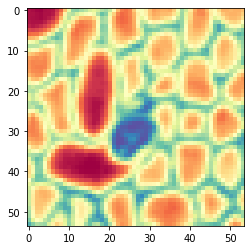

Epoch 176/250
36076/36076 [==============================] - 25s 706us/step - loss: 0.3437 - acc: 0.9994 - val_loss: 0.4533 - val_acc: 0.9926

Epoch 00176: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.4533331095544585, 'val_acc': 0.9926277047838268, 'loss': 0.34372300615740503, 'acc': 0.9993624576431563, 'lr': 1e-04}


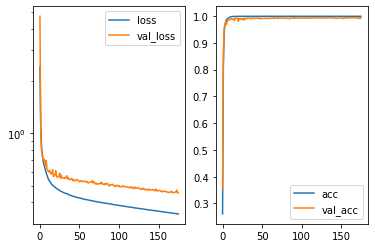

Predicted cell: MatureP1 Probability: [[0.9995926]]
True Cell type: MatureP1
X [[0.5149803]]
True positional value X 0.5
Y [[0.49510902]]
True positional value Y 0.5
H [[0.33330548]]
True positional value H 0.3888888888888889
W [[0.40981093]]
True positional value W 0.4444444444444444


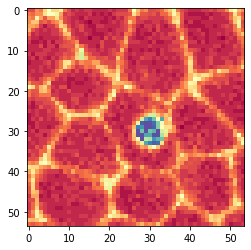

Epoch 177/250
36076/36076 [==============================] - 26s 708us/step - loss: 0.3433 - acc: 0.9992 - val_loss: 0.4541 - val_acc: 0.9942

Epoch 00177: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.4541327727192512, 'val_acc': 0.994207482108196, 'loss': 0.3432908488927203, 'acc': 0.999196142245719, 'lr': 1e-04}


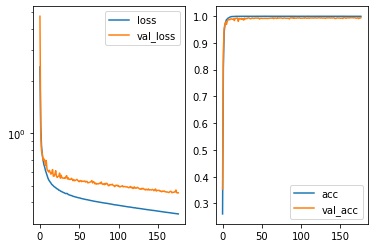

Predicted cell: Normal Probability: [[1.]]
True Cell type: Normal
X [[0.47795236]]
True positional value X 0.5
Y [[0.4731059]]
True positional value Y 0.5
H [[0.23342538]]
True positional value H 0.25925925925925924
W [[0.30275103]]
True positional value W 0.2962962962962963


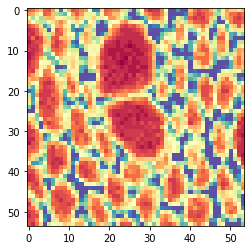

Epoch 178/250
36076/36076 [==============================] - 26s 713us/step - loss: 0.3428 - acc: 0.9994 - val_loss: 0.4513 - val_acc: 0.9921

Epoch 00178: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.45134538603557167, 'val_acc': 0.9921011123423704, 'loss': 0.34280095784147874, 'acc': 0.9993624576431563, 'lr': 1e-04}


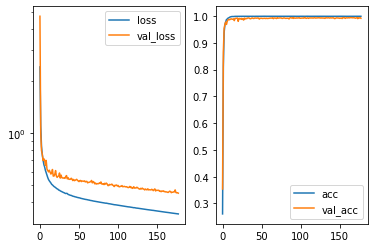

Predicted cell: NonMatureP1 Probability: [[0.4905982]]
True Cell type: Normal
X [[0.5143443]]
True positional value X 0.5
Y [[0.56339496]]
True positional value Y 0.5
H [[0.23361057]]
True positional value H 0.25925925925925924
W [[0.25209332]]
True positional value W 0.3333333333333333


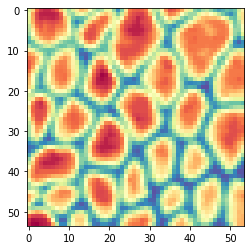

Epoch 179/250
36076/36076 [==============================] - 26s 714us/step - loss: 0.3425 - acc: 0.9993 - val_loss: 0.4535 - val_acc: 0.9937

Epoch 00179: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.45345171055648126, 'val_acc': 0.9936808896667396, 'loss': 0.3424692962185244, 'acc': 0.9992515807115314, 'lr': 1e-04}


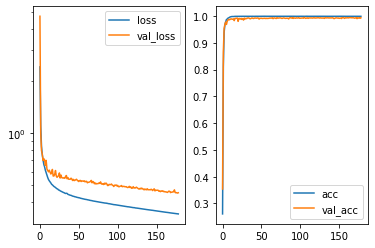

Predicted cell: MatureP1 Probability: [[0.99396616]]
True Cell type: MatureP1
X [[0.5768957]]
True positional value X 0.5
Y [[0.5405476]]
True positional value Y 0.6851851851851852
H [[0.33681852]]
True positional value H 0.4074074074074074
W [[0.4057205]]
True positional value W 0.3888888888888889


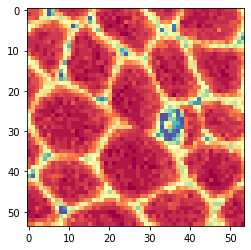

Epoch 180/250
36076/36076 [==============================] - 26s 711us/step - loss: 0.3418 - acc: 0.9993 - val_loss: 0.4506 - val_acc: 0.9937

Epoch 00180: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.45064123063541955, 'val_acc': 0.9936808896667396, 'loss': 0.341829487176808, 'acc': 0.9992792999444376, 'lr': 1e-04}


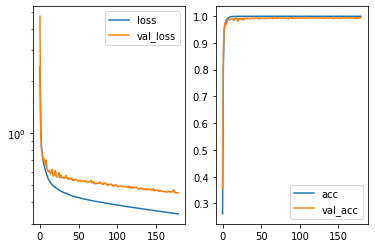

Predicted cell: MacroCheate Probability: [[1.]]
True Cell type: MacroCheate
X [[0.70917124]]
True positional value X 0.6851851851851852
Y [[0.6580206]]
True positional value Y 0.6851851851851852
H [[0.40881866]]
True positional value H 0.46296296296296297
W [[0.37728435]]
True positional value W 0.35185185185185186


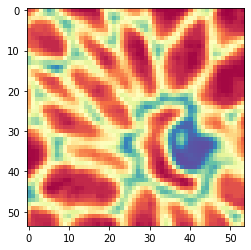

Epoch 181/250
36076/36076 [==============================] - 26s 710us/step - loss: 0.3410 - acc: 0.9993 - val_loss: 0.4499 - val_acc: 0.9942

Epoch 00181: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.44994698927049703, 'val_acc': 0.994207482108196, 'loss': 0.34103380704893616, 'acc': 0.9993347384102501, 'lr': 1e-04}


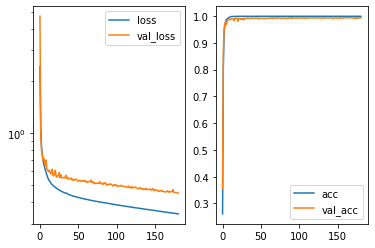

Predicted cell: MatureP1 Probability: [[0.99999917]]
True Cell type: MatureP1
X [[0.33090788]]
True positional value X 0.3148148148148148
Y [[0.5014574]]
True positional value Y 0.5
H [[0.3954394]]
True positional value H 0.3888888888888889
W [[0.3866375]]
True positional value W 0.3333333333333333


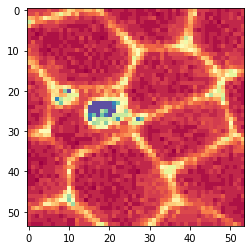

Epoch 182/250
36076/36076 [==============================] - 26s 710us/step - loss: 0.3407 - acc: 0.9991 - val_loss: 0.4504 - val_acc: 0.9937

Epoch 00182: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.4504247754262961, 'val_acc': 0.9936808896667396, 'loss': 0.34066053586559186, 'acc': 0.9991407037336449, 'lr': 1e-04}


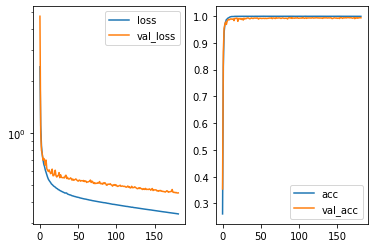

Predicted cell: NonMatureP1 Probability: [[0.983576]]
True Cell type: MatureP1
X [[0.30836338]]
True positional value X 0.3148148148148148
Y [[0.6863554]]
True positional value Y 0.6851851851851852
H [[0.29097933]]
True positional value H 0.2962962962962963
W [[0.26228526]]
True positional value W 0.25925925925925924


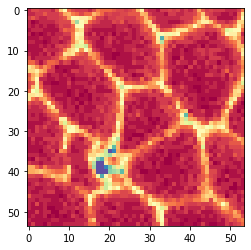

Epoch 183/250
36076/36076 [==============================] - 26s 711us/step - loss: 0.3403 - acc: 0.9994 - val_loss: 0.4513 - val_acc: 0.9942

Epoch 00183: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.45130115694093226, 'val_acc': 0.994207482108196, 'loss': 0.34025685559396057, 'acc': 0.9993624576431563, 'lr': 1e-04}


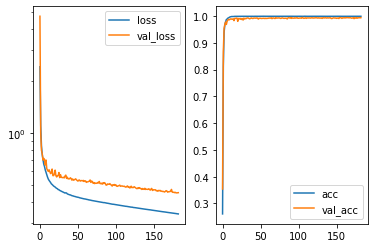

Predicted cell: MacroCheate Probability: [[1.]]
True Cell type: MacroCheate
X [[0.69144446]]
True positional value X 0.6851851851851852
Y [[0.30388334]]
True positional value Y 0.3148148148148148
H [[0.4565138]]
True positional value H 0.46296296296296297
W [[0.44965327]]
True positional value W 0.5185185185185185


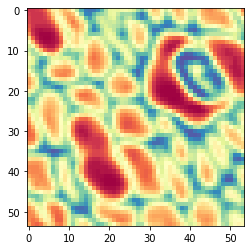

Epoch 184/250
36076/36076 [==============================] - 26s 711us/step - loss: 0.3398 - acc: 0.9993 - val_loss: 0.4523 - val_acc: 0.9937

Epoch 00184: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.45233781959836017, 'val_acc': 0.9936808896667396, 'loss': 0.3398436200415193, 'acc': 0.9992792999444376, 'lr': 1e-04}


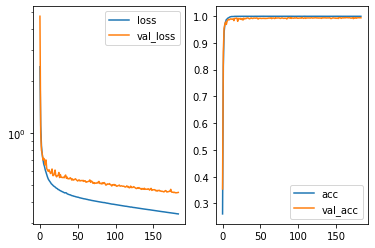

Predicted cell: MatureP1 Probability: [[0.99992335]]
True Cell type: MatureP1
X [[0.31473958]]
True positional value X 0.3148148148148148
Y [[0.50715923]]
True positional value Y 0.5
H [[0.48927414]]
True positional value H 0.46296296296296297
W [[0.3651355]]
True positional value W 0.37037037037037035


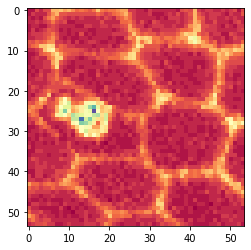

Epoch 185/250
36076/36076 [==============================] - 26s 712us/step - loss: 0.3393 - acc: 0.9994 - val_loss: 0.4485 - val_acc: 0.9942

Epoch 00185: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.4485121042619196, 'val_acc': 0.994207482108196, 'loss': 0.3393139556514568, 'acc': 0.9993624576431563, 'lr': 1e-04}


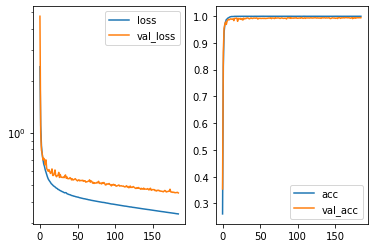

Predicted cell: Normal Probability: [[0.9999994]]
True Cell type: Normal
X [[0.50288415]]
True positional value X 0.5
Y [[0.5036152]]
True positional value Y 0.5
H [[0.37874293]]
True positional value H 0.14814814814814814
W [[0.29452428]]
True positional value W 0.24074074074074073


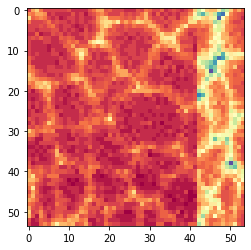

Epoch 186/250
36076/36076 [==============================] - 26s 710us/step - loss: 0.3387 - acc: 0.9994 - val_loss: 0.4497 - val_acc: 0.9937

Epoch 00186: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.4497270715776527, 'val_acc': 0.9936808896667396, 'loss': 0.3386703920193873, 'acc': 0.9993901768760626, 'lr': 1e-04}


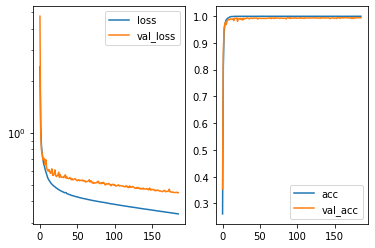

Predicted cell: MacroCheate Probability: [[0.9999987]]
True Cell type: MacroCheate
X [[0.6870505]]
True positional value X 0.6851851851851852
Y [[0.4875239]]
True positional value Y 0.5
H [[0.5001861]]
True positional value H 0.48148148148148145
W [[0.73554283]]
True positional value W 0.7407407407407407


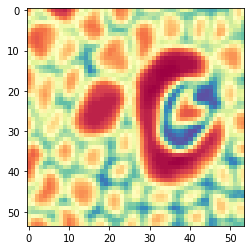

Epoch 187/250
36076/36076 [==============================] - 26s 710us/step - loss: 0.3382 - acc: 0.9993 - val_loss: 0.4494 - val_acc: 0.9942

Epoch 00187: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.44936477276386244, 'val_acc': 0.994207482108196, 'loss': 0.3382437248288931, 'acc': 0.9992515807115314, 'lr': 1e-04}


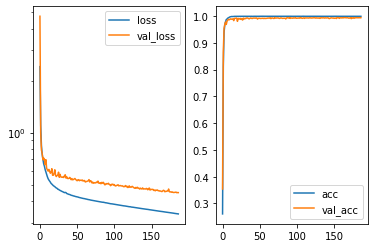

Predicted cell: MacroCheate Probability: [[0.9999988]]
True Cell type: MacroCheate
X [[0.5009427]]
True positional value X 0.5
Y [[0.4926346]]
True positional value Y 0.5
H [[0.3257413]]
True positional value H 0.3333333333333333
W [[0.32202393]]
True positional value W 0.3148148148148148


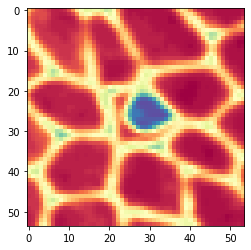

Epoch 188/250
36076/36076 [==============================] - 26s 709us/step - loss: 0.3380 - acc: 0.9993 - val_loss: 0.4450 - val_acc: 0.9942

Epoch 00188: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.44502508349955994, 'val_acc': 0.994207482108196, 'loss': 0.3380088079020617, 'acc': 0.9992515807115314, 'lr': 1e-04}


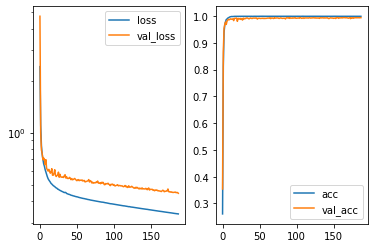

Predicted cell: MatureP1 Probability: [[0.99999964]]
True Cell type: MatureP1
X [[0.3237204]]
True positional value X 0.3148148148148148
Y [[0.30838808]]
True positional value Y 0.3148148148148148
H [[0.339087]]
True positional value H 0.3888888888888889
W [[0.3963303]]
True positional value W 0.35185185185185186


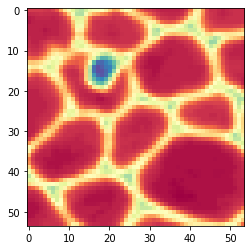

Epoch 189/250
36076/36076 [==============================] - 26s 710us/step - loss: 0.3376 - acc: 0.9993 - val_loss: 0.4484 - val_acc: 0.9942

Epoch 00189: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.448375462606871, 'val_acc': 0.9942074831439797, 'loss': 0.3376018597243273, 'acc': 0.9993347384102501, 'lr': 1e-04}


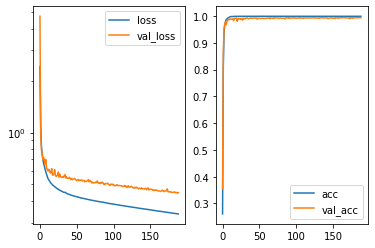

Predicted cell: NonMatureP1 Probability: [[0.995896]]
True Cell type: NonMatureP1
X [[0.52870315]]
True positional value X 0.5
Y [[0.45736265]]
True positional value Y 0.3148148148148148
H [[0.32605374]]
True positional value H 0.3888888888888889
W [[0.34174016]]
True positional value W 0.46296296296296297


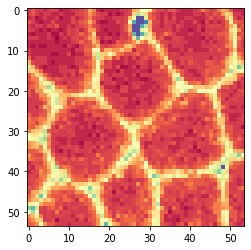

Epoch 190/250
36076/36076 [==============================] - 26s 710us/step - loss: 0.3370 - acc: 0.9993 - val_loss: 0.4503 - val_acc: 0.9932

Epoch 00190: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.4502875442847633, 'val_acc': 0.9931542972252833, 'loss': 0.33696055756279814, 'acc': 0.9992792999444376, 'lr': 1e-04}


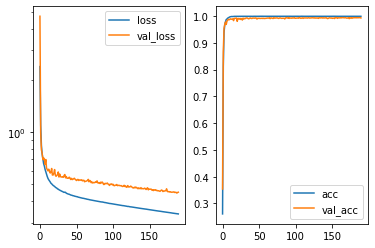

Predicted cell: NonMatureP1 Probability: [[0.9999391]]
True Cell type: NonMatureP1
X [[0.32175893]]
True positional value X 0.3148148148148148
Y [[0.520906]]
True positional value Y 0.5
H [[0.25180957]]
True positional value H 0.2962962962962963
W [[0.21451914]]
True positional value W 0.24074074074074073


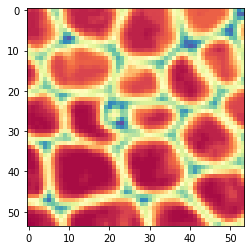

Epoch 191/250
36076/36076 [==============================] - 26s 709us/step - loss: 0.3365 - acc: 0.9993 - val_loss: 0.4434 - val_acc: 0.9942

Epoch 00191: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.4433977691326222, 'val_acc': 0.994207482108196, 'loss': 0.336481484021008, 'acc': 0.9993070191773439, 'lr': 1e-04}


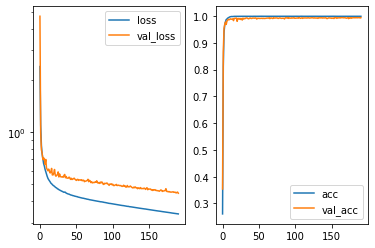

Predicted cell: MatureP1 Probability: [[0.9999944]]
True Cell type: MatureP1
X [[0.50011265]]
True positional value X 0.5
Y [[0.31221122]]
True positional value Y 0.3148148148148148
H [[0.38714445]]
True positional value H 0.4074074074074074
W [[0.37094358]]
True positional value W 0.3888888888888889


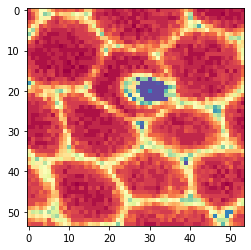

Epoch 192/250
36076/36076 [==============================] - 26s 709us/step - loss: 0.3361 - acc: 0.9993 - val_loss: 0.4434 - val_acc: 0.9942

Epoch 00192: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.4434252362492337, 'val_acc': 0.994207482108196, 'loss': 0.3361152704598198, 'acc': 0.9992515807115314, 'lr': 1e-04}


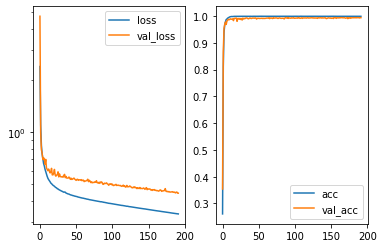

Predicted cell: MacroCheate Probability: [[0.9999827]]
True Cell type: MacroCheate
X [[0.6841787]]
True positional value X 0.6851851851851852
Y [[0.71540105]]
True positional value Y 0.6851851851851852
H [[0.40821978]]
True positional value H 0.4074074074074074
W [[0.5282548]]
True positional value W 0.5


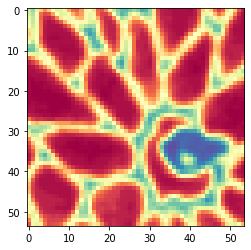

Epoch 193/250
36076/36076 [==============================] - 26s 709us/step - loss: 0.3354 - acc: 0.9993 - val_loss: 0.4416 - val_acc: 0.9942

Epoch 00193: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.4415565015392093, 'val_acc': 0.994207482108196, 'loss': 0.3353515482256822, 'acc': 0.9992515807115314, 'lr': 1e-04}


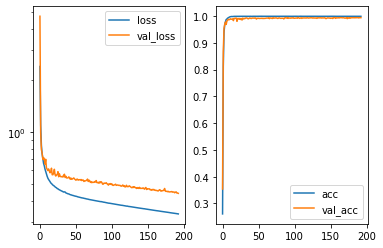

Predicted cell: MacroCheate Probability: [[0.999985]]
True Cell type: MacroCheate
X [[0.69484967]]
True positional value X 0.6851851851851852
Y [[0.33654273]]
True positional value Y 0.3148148148148148
H [[0.37455487]]
True positional value H 0.4074074074074074
W [[0.3932826]]
True positional value W 0.42592592592592593


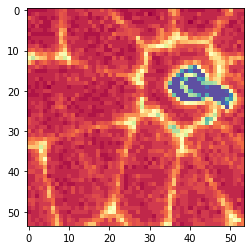

Epoch 194/250
36076/36076 [==============================] - 26s 708us/step - loss: 0.3354 - acc: 0.9994 - val_loss: 0.4481 - val_acc: 0.9937

Epoch 00194: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.4480570480188236, 'val_acc': 0.9936808896667396, 'loss': 0.33540531590767636, 'acc': 0.9994178961089688, 'lr': 1e-04}


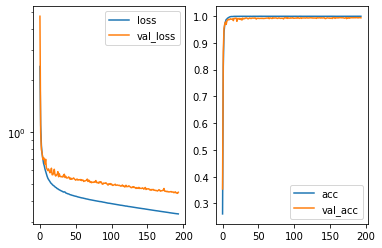

Predicted cell: MacroCheate Probability: [[0.9998759]]
True Cell type: Normal
X [[0.31754076]]
True positional value X 0.5
Y [[0.70001537]]
True positional value Y 0.5
H [[0.4240299]]
True positional value H 0.4074074074074074
W [[0.3619448]]
True positional value W 0.2962962962962963


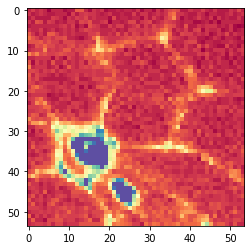

Epoch 195/250
36076/36076 [==============================] - 26s 710us/step - loss: 0.3345 - acc: 0.9993 - val_loss: 0.4407 - val_acc: 0.9942

Epoch 00195: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.4407360407790113, 'val_acc': 0.994207482108196, 'loss': 0.33453830953037705, 'acc': 0.9993070191773439, 'lr': 1e-04}


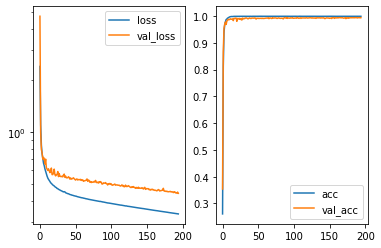

Predicted cell: MacroCheate Probability: [[1.]]
True Cell type: MacroCheate
X [[0.7091241]]
True positional value X 0.6851851851851852
Y [[0.5007178]]
True positional value Y 0.5
H [[0.5447068]]
True positional value H 0.5555555555555556
W [[0.6258741]]
True positional value W 0.6296296296296297


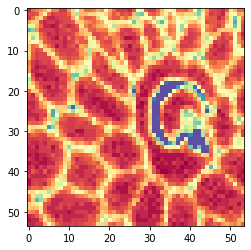

Epoch 196/250
36076/36076 [==============================] - 26s 709us/step - loss: 0.3342 - acc: 0.9994 - val_loss: 0.4479 - val_acc: 0.9937

Epoch 00196: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.4478632956037024, 'val_acc': 0.9936808896667396, 'loss': 0.33417047064721234, 'acc': 0.9993624576431563, 'lr': 1e-04}


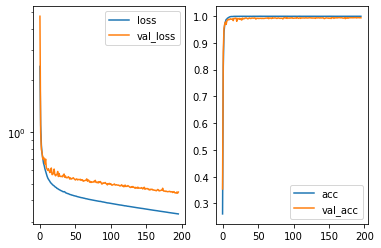

Predicted cell: Normal Probability: [[1.]]
True Cell type: Normal
X [[0.4910106]]
True positional value X 0.5
Y [[0.5248793]]
True positional value Y 0.5
H [[0.20920676]]
True positional value H 0.24074074074074073
W [[0.31048468]]
True positional value W 0.2962962962962963


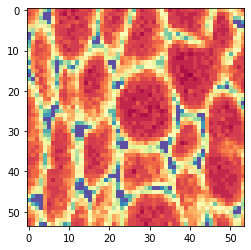

Epoch 197/250
36076/36076 [==============================] - 26s 710us/step - loss: 0.3337 - acc: 0.9994 - val_loss: 0.4445 - val_acc: 0.9942

Epoch 00197: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.4445197967525028, 'val_acc': 0.994207482108196, 'loss': 0.33371028724418855, 'acc': 0.9993901768760626, 'lr': 1e-04}


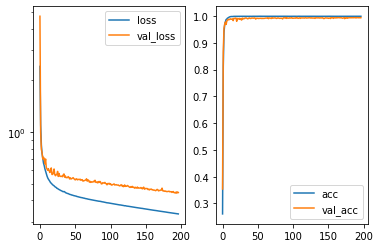

Predicted cell: MatureP1 Probability: [[0.99999964]]
True Cell type: MatureP1
X [[0.47578564]]
True positional value X 0.5
Y [[0.3042556]]
True positional value Y 0.3148148148148148
H [[0.30912352]]
True positional value H 0.35185185185185186
W [[0.32662177]]
True positional value W 0.3148148148148148


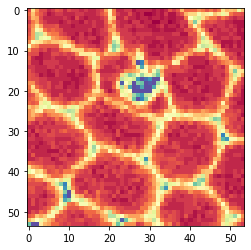

Epoch 198/250
36076/36076 [==============================] - 26s 710us/step - loss: 0.3333 - acc: 0.9993 - val_loss: 0.4417 - val_acc: 0.9932

Epoch 00198: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.4416936283333795, 'val_acc': 0.9931542972252833, 'loss': 0.33328517722586515, 'acc': 0.9993070191773439, 'lr': 1e-04}


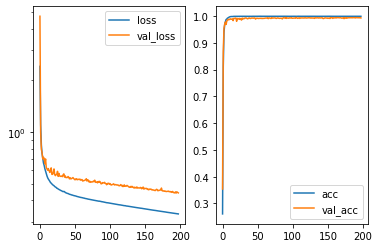

Predicted cell: MatureP1 Probability: [[1.]]
True Cell type: MatureP1
X [[0.67449415]]
True positional value X 0.6851851851851852
Y [[0.4996673]]
True positional value Y 0.5
H [[0.3959551]]
True positional value H 0.3888888888888889
W [[0.3168657]]
True positional value W 0.35185185185185186


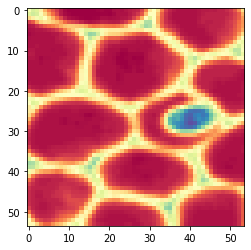

Epoch 199/250
36076/36076 [==============================] - 26s 710us/step - loss: 0.3325 - acc: 0.9995 - val_loss: 0.4387 - val_acc: 0.9937

Epoch 00199: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.4387376514185473, 'val_acc': 0.9936808896667396, 'loss': 0.3325311352248625, 'acc': 0.9994733345747814, 'lr': 1e-04}


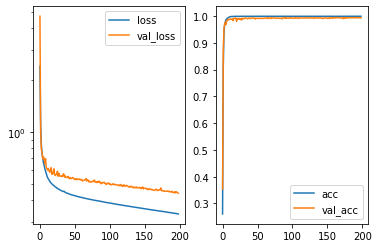

Predicted cell: MatureP1 Probability: [[1.]]
True Cell type: MatureP1
X [[0.50635713]]
True positional value X 0.5
Y [[0.69488585]]
True positional value Y 0.6851851851851852
H [[0.34292752]]
True positional value H 0.37037037037037035
W [[0.39584523]]
True positional value W 0.42592592592592593


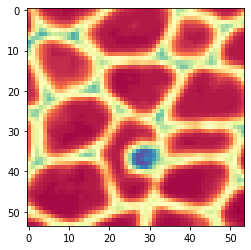

Epoch 200/250
36076/36076 [==============================] - 26s 711us/step - loss: 0.3324 - acc: 0.9993 - val_loss: 0.4457 - val_acc: 0.9932

Epoch 00200: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.44569981164088557, 'val_acc': 0.9931542972252833, 'loss': 0.3323843418851318, 'acc': 0.9993347384102501, 'lr': 1e-04}


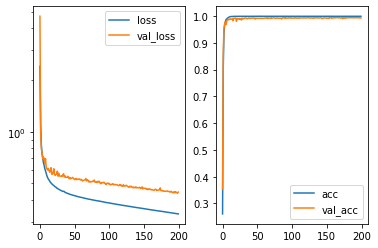

Predicted cell: MacroCheate Probability: [[1.]]
True Cell type: MacroCheate
X [[0.48421672]]
True positional value X 0.5
Y [[0.66138613]]
True positional value Y 0.6851851851851852
H [[0.3930599]]
True positional value H 0.3888888888888889
W [[0.458561]]
True positional value W 0.46296296296296297


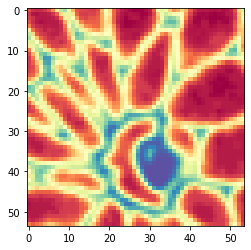

Epoch 201/250
36076/36076 [==============================] - 26s 712us/step - loss: 0.3319 - acc: 0.9993 - val_loss: 0.4482 - val_acc: 0.9937

Epoch 00201: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.4482107379362419, 'val_acc': 0.9936808896667396, 'loss': 0.3319114129153915, 'acc': 0.9992792999444376, 'lr': 1e-04}


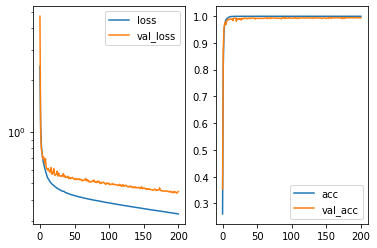

Predicted cell: Normal Probability: [[0.9999777]]
True Cell type: Normal
X [[0.5041275]]
True positional value X 0.5
Y [[0.50844294]]
True positional value Y 0.5
H [[0.33711523]]
True positional value H 0.24074074074074073
W [[0.28275213]]
True positional value W 0.25925925925925924


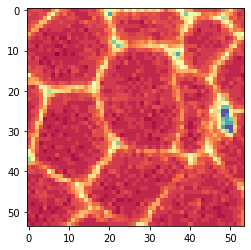

Epoch 202/250
36076/36076 [==============================] - 26s 712us/step - loss: 0.3314 - acc: 0.9993 - val_loss: 0.4418 - val_acc: 0.9932

Epoch 00202: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.4418497559049997, 'val_acc': 0.9931542972252833, 'loss': 0.33139134209414306, 'acc': 0.9992792999444376, 'lr': 1e-04}


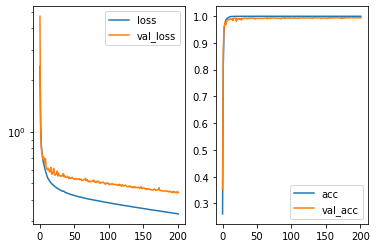

Predicted cell: MacroCheate Probability: [[1.]]
True Cell type: MacroCheate
X [[0.6701759]]
True positional value X 0.6851851851851852
Y [[0.32549214]]
True positional value Y 0.3148148148148148
H [[0.44447708]]
True positional value H 0.46296296296296297
W [[0.7655318]]
True positional value W 0.8333333333333334


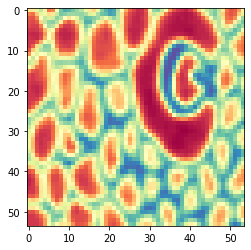

Epoch 203/250
36076/36076 [==============================] - 26s 713us/step - loss: 0.3309 - acc: 0.9993 - val_loss: 0.4443 - val_acc: 0.9937

Epoch 00203: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.44434925949906223, 'val_acc': 0.9936808896667396, 'loss': 0.3308587430691637, 'acc': 0.9993347384102501, 'lr': 1e-04}


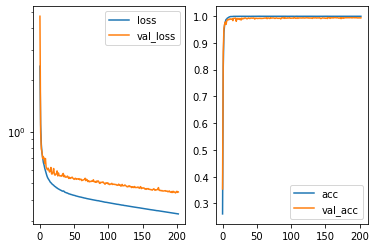

Predicted cell: Normal Probability: [[0.9999999]]
True Cell type: Normal
X [[0.48552048]]
True positional value X 0.5
Y [[0.5139253]]
True positional value Y 0.5
H [[0.39142758]]
True positional value H 0.3148148148148148
W [[0.2878356]]
True positional value W 0.2962962962962963


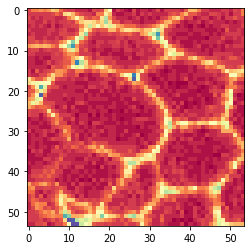

Epoch 204/250
36076/36076 [==============================] - 26s 710us/step - loss: 0.3302 - acc: 0.9993 - val_loss: 0.4382 - val_acc: 0.9942

Epoch 00204: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.43824306736185775, 'val_acc': 0.994207482108196, 'loss': 0.3302315785524282, 'acc': 0.9993347384102501, 'lr': 1e-04}


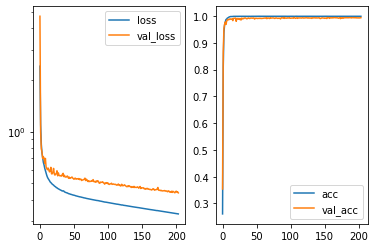

Predicted cell: MacroCheate Probability: [[1.]]
True Cell type: MacroCheate
X [[0.4900391]]
True positional value X 0.5
Y [[0.4980288]]
True positional value Y 0.5
H [[0.5202317]]
True positional value H 0.48148148148148145
W [[0.6765115]]
True positional value W 0.7592592592592593


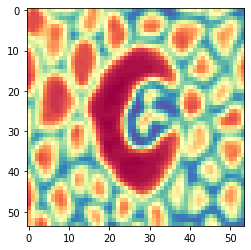

Epoch 205/250
36076/36076 [==============================] - 26s 710us/step - loss: 0.3299 - acc: 0.9993 - val_loss: 0.4426 - val_acc: 0.9916

Epoch 00205: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.4426036411018482, 'val_acc': 0.991574519900914, 'loss': 0.32994180509316867, 'acc': 0.9992792999444376, 'lr': 1e-04}


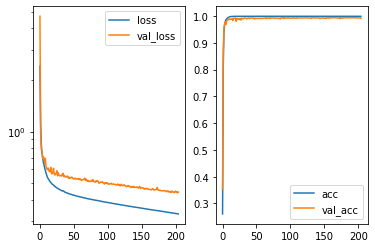

Predicted cell: Normal Probability: [[1.]]
True Cell type: Normal
X [[0.5125395]]
True positional value X 0.5
Y [[0.5011549]]
True positional value Y 0.5
H [[0.40411413]]
True positional value H 0.3888888888888889
W [[0.4600884]]
True positional value W 0.3148148148148148


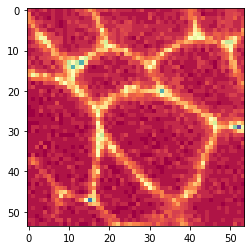

Epoch 206/250
36076/36076 [==============================] - 26s 712us/step - loss: 0.3293 - acc: 0.9994 - val_loss: 0.4385 - val_acc: 0.9937

Epoch 00206: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.4385360024551645, 'val_acc': 0.9936808907025233, 'loss': 0.3292863431011498, 'acc': 0.9993624576431563, 'lr': 1e-04}


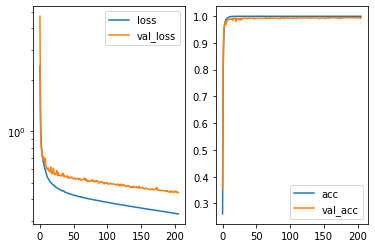

Predicted cell: MacroCheate Probability: [[1.]]
True Cell type: MacroCheate
X [[0.522997]]
True positional value X 0.5
Y [[0.50185776]]
True positional value Y 0.5
H [[0.57107383]]
True positional value H 0.5555555555555556
W [[0.52615786]]
True positional value W 0.5185185185185185


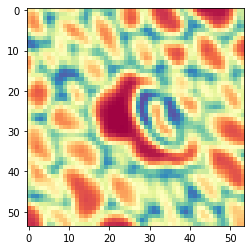

Epoch 207/250
36076/36076 [==============================] - 26s 708us/step - loss: 0.3291 - acc: 0.9992 - val_loss: 0.4357 - val_acc: 0.9942

Epoch 00207: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.43565988422946716, 'val_acc': 0.994207482108196, 'loss': 0.32906012371065135, 'acc': 0.9992238614786252, 'lr': 1e-04}


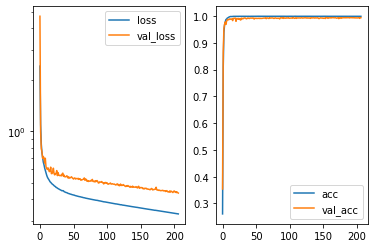

Predicted cell: MacroCheate Probability: [[0.99999]]
True Cell type: MacroCheate
X [[0.6749766]]
True positional value X 0.6851851851851852
Y [[0.7066658]]
True positional value Y 0.6851851851851852
H [[0.28737968]]
True positional value H 0.3148148148148148
W [[0.31205672]]
True positional value W 0.37037037037037035


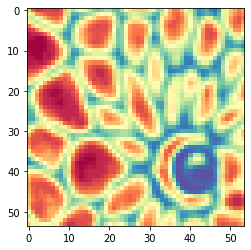

Epoch 208/250
36076/36076 [==============================] - 25s 706us/step - loss: 0.3287 - acc: 0.9993 - val_loss: 0.4381 - val_acc: 0.9926

Epoch 00208: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.43806131999388437, 'val_acc': 0.9926277047838268, 'loss': 0.3287178035658206, 'acc': 0.9992792999444376, 'lr': 1e-04}


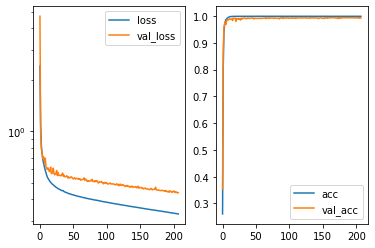

Predicted cell: MatureP1 Probability: [[0.9999999]]
True Cell type: MatureP1
X [[0.3248465]]
True positional value X 0.3148148148148148
Y [[0.68075573]]
True positional value Y 0.6851851851851852
H [[0.35410142]]
True positional value H 0.37037037037037035
W [[0.33509085]]
True positional value W 0.3333333333333333


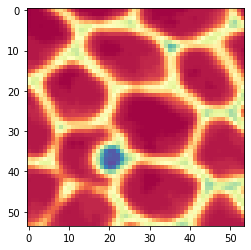

Epoch 209/250
36076/36076 [==============================] - 26s 710us/step - loss: 0.3282 - acc: 0.9992 - val_loss: 0.4423 - val_acc: 0.9942

Epoch 00209: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.4423213468343726, 'val_acc': 0.994207482108196, 'loss': 0.3282093481460264, 'acc': 0.9992238614786252, 'lr': 1e-04}


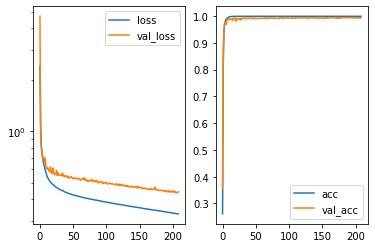

Predicted cell: Normal Probability: [[1.]]
True Cell type: Normal
X [[0.4782806]]
True positional value X 0.5
Y [[0.5136181]]
True positional value Y 0.5
H [[0.5661036]]
True positional value H 0.5925925925925926
W [[0.39126092]]
True positional value W 0.3333333333333333


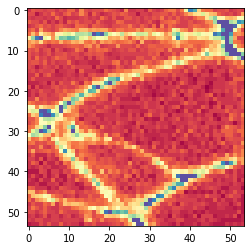

Epoch 210/250
36076/36076 [==============================] - 26s 711us/step - loss: 0.3277 - acc: 0.9992 - val_loss: 0.4388 - val_acc: 0.9932

Epoch 00210: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.4388313872240417, 'val_acc': 0.9931542972252833, 'loss': 0.3276757010137814, 'acc': 0.9992238614786252, 'lr': 1e-04}


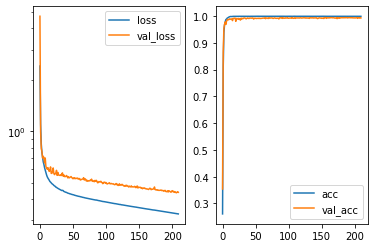

Predicted cell: NonMatureP1 Probability: [[0.9999542]]
True Cell type: NonMatureP1
X [[0.48001572]]
True positional value X 0.5
Y [[0.54067105]]
True positional value Y 0.5
H [[0.4127584]]
True positional value H 0.4444444444444444
W [[0.27751195]]
True positional value W 0.25925925925925924


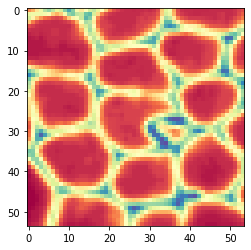

Epoch 211/250
36076/36076 [==============================] - 26s 708us/step - loss: 0.3274 - acc: 0.9992 - val_loss: 0.4429 - val_acc: 0.9926

Epoch 00211: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.44289415131561877, 'val_acc': 0.9926277047838268, 'loss': 0.32740108052700057, 'acc': 0.9992238614786252, 'lr': 1e-04}


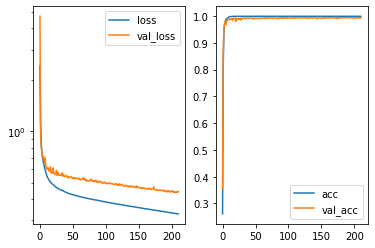

Predicted cell: Normal Probability: [[0.9999999]]
True Cell type: Normal
X [[0.54147685]]
True positional value X 0.5
Y [[0.4826813]]
True positional value Y 0.5
H [[0.37761158]]
True positional value H 0.37037037037037035
W [[0.452051]]
True positional value W 0.37037037037037035


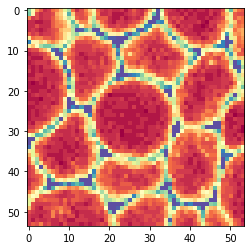

Epoch 212/250
36076/36076 [==============================] - 26s 708us/step - loss: 0.3273 - acc: 0.9991 - val_loss: 0.4385 - val_acc: 0.9926

Epoch 00212: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.4385165164915118, 'val_acc': 0.9926277047838268, 'loss': 0.3273121028831256, 'acc': 0.9991129845470001, 'lr': 1e-04}


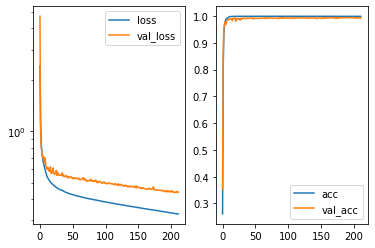

Predicted cell: Normal Probability: [[0.9999999]]
True Cell type: Normal
X [[0.5094662]]
True positional value X 0.5
Y [[0.5031427]]
True positional value Y 0.5
H [[0.5385124]]
True positional value H 0.5555555555555556
W [[0.55244625]]
True positional value W 0.6851851851851852


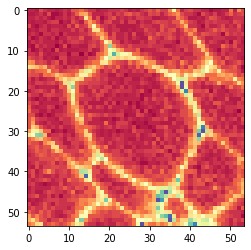

Epoch 213/250
36076/36076 [==============================] - 26s 712us/step - loss: 0.3268 - acc: 0.9993 - val_loss: 0.4419 - val_acc: 0.9926

Epoch 00213: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.44191248430083335, 'val_acc': 0.9926277047838268, 'loss': 0.3267922144148167, 'acc': 0.9993347384102501, 'lr': 1e-04}


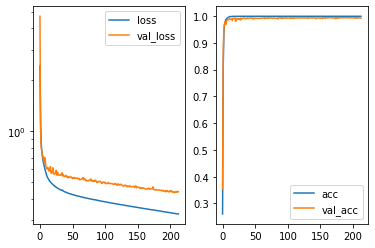

Predicted cell: MacroCheate Probability: [[1.]]
True Cell type: MacroCheate
X [[0.6831587]]
True positional value X 0.6851851851851852
Y [[0.4961792]]
True positional value Y 0.5
H [[0.6931603]]
True positional value H 0.7407407407407407
W [[0.72876865]]
True positional value W 0.7407407407407407


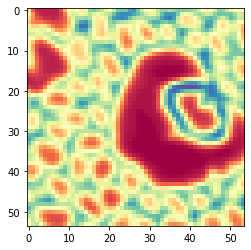

Epoch 214/250
36076/36076 [==============================] - 26s 709us/step - loss: 0.3259 - acc: 0.9994 - val_loss: 0.4402 - val_acc: 0.9937

Epoch 00214: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.4401533229216706, 'val_acc': 0.9936808896667396, 'loss': 0.32592524012647983, 'acc': 0.9993624576431563, 'lr': 1e-04}


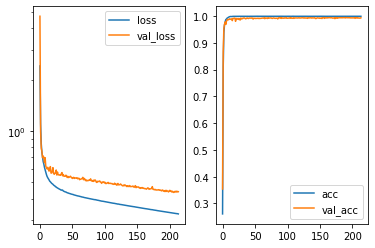

Predicted cell: Normal Probability: [[1.]]
True Cell type: Normal
X [[0.5251906]]
True positional value X 0.5
Y [[0.47367388]]
True positional value Y 0.5
H [[0.39220253]]
True positional value H 0.3148148148148148
W [[0.3486735]]
True positional value W 0.2962962962962963


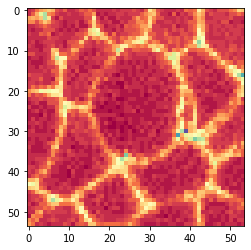

Epoch 215/250
36076/36076 [==============================] - 26s 709us/step - loss: 0.3254 - acc: 0.9993 - val_loss: 0.4377 - val_acc: 0.9932

Epoch 00215: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.43774216403579513, 'val_acc': 0.9931542961894995, 'loss': 0.3254071460758613, 'acc': 0.9993347384102501, 'lr': 1e-04}


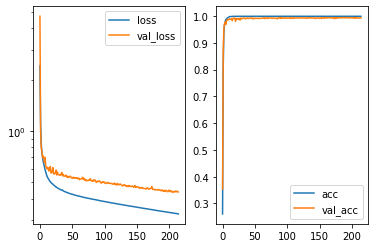

Predicted cell: Normal Probability: [[1.]]
True Cell type: Normal
X [[0.4943472]]
True positional value X 0.5
Y [[0.50474787]]
True positional value Y 0.5
H [[0.36584902]]
True positional value H 0.3333333333333333
W [[0.38888627]]
True positional value W 0.4444444444444444


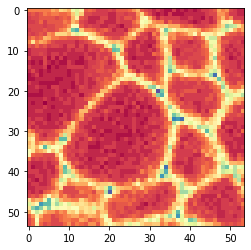

Epoch 216/250
36076/36076 [==============================] - 26s 708us/step - loss: 0.3252 - acc: 0.9992 - val_loss: 0.4338 - val_acc: 0.9937

Epoch 00216: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.4338447059406112, 'val_acc': 0.9936808896667396, 'loss': 0.32522882347176196, 'acc': 0.999196142245719, 'lr': 1e-04}


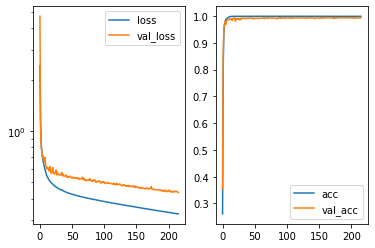

Predicted cell: Normal Probability: [[1.]]
True Cell type: Normal
X [[0.5193112]]
True positional value X 0.5
Y [[0.45947826]]
True positional value Y 0.5
H [[0.24947855]]
True positional value H 0.25925925925925924
W [[0.26377252]]
True positional value W 0.16666666666666666


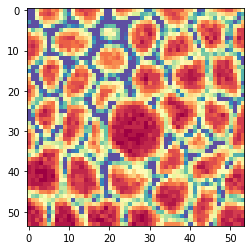

Epoch 217/250
36076/36076 [==============================] - 26s 710us/step - loss: 0.3246 - acc: 0.9993 - val_loss: 0.4362 - val_acc: 0.9926

Epoch 00217: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.4361894111560482, 'val_acc': 0.9926277047838268, 'loss': 0.32457746997721804, 'acc': 0.9992792999444376, 'lr': 1e-04}


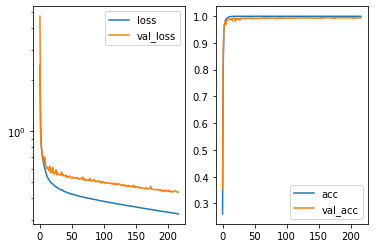

Predicted cell: MacroCheate Probability: [[1.]]
True Cell type: MacroCheate
X [[0.6829175]]
True positional value X 0.6851851851851852
Y [[0.50459594]]
True positional value Y 0.5
H [[0.2340973]]
True positional value H 0.18518518518518517
W [[0.20077777]]
True positional value W 0.18518518518518517


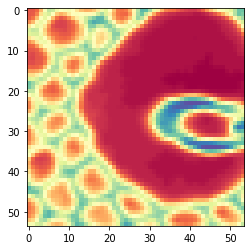

Epoch 218/250
36076/36076 [==============================] - 26s 709us/step - loss: 0.3242 - acc: 0.9993 - val_loss: 0.4283 - val_acc: 0.9942

Epoch 00218: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.4283079669436635, 'val_acc': 0.994207482108196, 'loss': 0.3241893602476269, 'acc': 0.9993070191773439, 'lr': 1e-04}


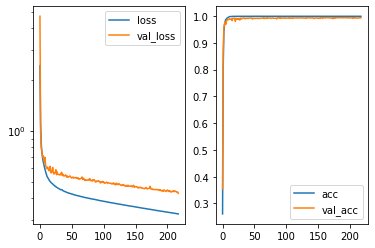

Predicted cell: Normal Probability: [[1.]]
True Cell type: Normal
X [[0.46952814]]
True positional value X 0.5
Y [[0.5017098]]
True positional value Y 0.5
H [[0.3198406]]
True positional value H 0.24074074074074073
W [[0.43539864]]
True positional value W 0.4074074074074074


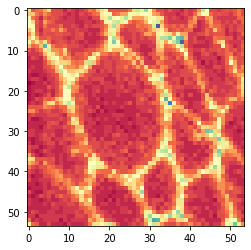

Epoch 219/250
36076/36076 [==============================] - 26s 709us/step - loss: 0.3236 - acc: 0.9993 - val_loss: 0.4329 - val_acc: 0.9942

Epoch 00219: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.4328543133111675, 'val_acc': 0.994207482108196, 'loss': 0.32361579140269686, 'acc': 0.9993347384102501, 'lr': 1e-04}


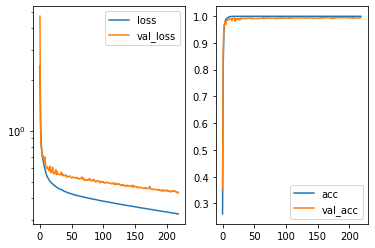

Predicted cell: Normal Probability: [[0.99999714]]
True Cell type: Normal
X [[0.5304392]]
True positional value X 0.5
Y [[0.5230144]]
True positional value Y 0.5
H [[0.3477497]]
True positional value H 0.35185185185185186
W [[0.29821372]]
True positional value W 0.3148148148148148


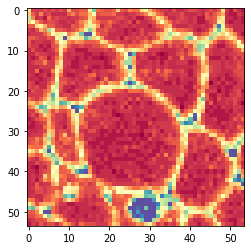

Epoch 220/250
36076/36076 [==============================] - 26s 710us/step - loss: 0.3230 - acc: 0.9992 - val_loss: 0.4358 - val_acc: 0.9942

Epoch 00220: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.43584735635834787, 'val_acc': 0.994207482108196, 'loss': 0.32303046444287414, 'acc': 0.9992238614323636, 'lr': 1e-04}


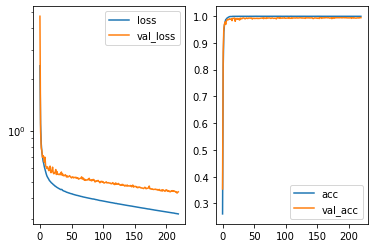

Predicted cell: Normal Probability: [[1.]]
True Cell type: Normal
X [[0.5095861]]
True positional value X 0.5
Y [[0.48609507]]
True positional value Y 0.5
H [[0.33148703]]
True positional value H 0.4444444444444444
W [[0.38993263]]
True positional value W 0.42592592592592593


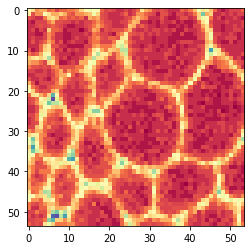

Epoch 221/250
36076/36076 [==============================] - 26s 709us/step - loss: 0.3230 - acc: 0.9993 - val_loss: 0.4310 - val_acc: 0.9932

Epoch 00221: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.43097906843369227, 'val_acc': 0.9931542972252833, 'loss': 0.32301749631536153, 'acc': 0.9992515807115314, 'lr': 1e-04}


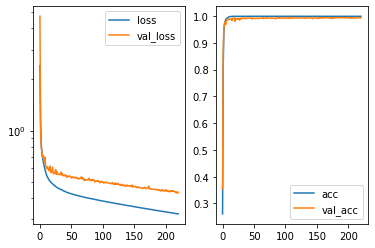

Predicted cell: MacroCheate Probability: [[1.]]
True Cell type: MacroCheate
X [[0.3272434]]
True positional value X 0.3148148148148148
Y [[0.50934815]]
True positional value Y 0.5
H [[0.3904587]]
True positional value H 0.35185185185185186
W [[0.4131986]]
True positional value W 0.42592592592592593


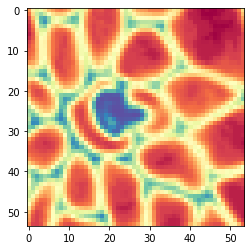

Epoch 222/250
36076/36076 [==============================] - 26s 713us/step - loss: 0.3224 - acc: 0.9993 - val_loss: 0.4298 - val_acc: 0.9942

Epoch 00222: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.42978266600309517, 'val_acc': 0.994207482108196, 'loss': 0.32235356505118845, 'acc': 0.9993347384102501, 'lr': 1e-04}


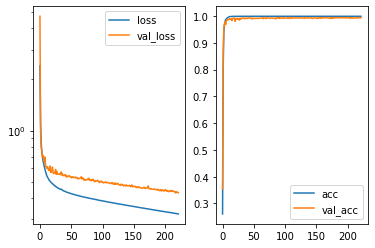

Predicted cell: Normal Probability: [[0.9999993]]
True Cell type: Normal
X [[0.49833968]]
True positional value X 0.5
Y [[0.49826443]]
True positional value Y 0.5
H [[0.22890922]]
True positional value H 0.3333333333333333
W [[0.22726351]]
True positional value W 0.2222222222222222


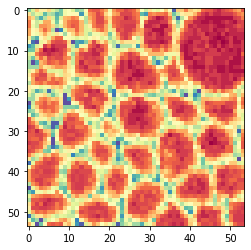

Epoch 223/250
36076/36076 [==============================] - 26s 710us/step - loss: 0.3220 - acc: 0.9992 - val_loss: 0.4320 - val_acc: 0.9937

Epoch 00223: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.4319970765008369, 'val_acc': 0.9936808896667396, 'loss': 0.32197253962672856, 'acc': 0.9992238614786252, 'lr': 1e-04}


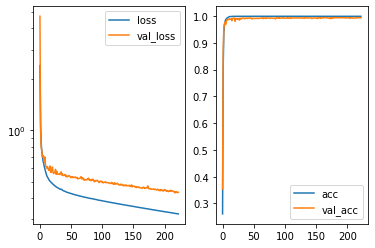

Predicted cell: Normal Probability: [[1.]]
True Cell type: Normal
X [[0.49869347]]
True positional value X 0.5
Y [[0.4964782]]
True positional value Y 0.5
H [[0.39469582]]
True positional value H 0.18518518518518517
W [[0.4231826]]
True positional value W 0.35185185185185186


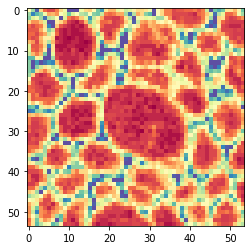

Epoch 224/250
36076/36076 [==============================] - 26s 710us/step - loss: 0.3216 - acc: 0.9993 - val_loss: 0.4274 - val_acc: 0.9942

Epoch 00224: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.42735147694338615, 'val_acc': 0.994207482108196, 'loss': 0.3215588811350868, 'acc': 0.9992515807115314, 'lr': 1e-04}


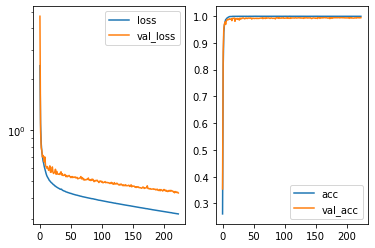

Predicted cell: Normal Probability: [[0.9999999]]
True Cell type: Normal
X [[0.49558857]]
True positional value X 0.5
Y [[0.51978886]]
True positional value Y 0.5
H [[0.27674797]]
True positional value H 0.16666666666666666
W [[0.29224628]]
True positional value W 0.12962962962962962


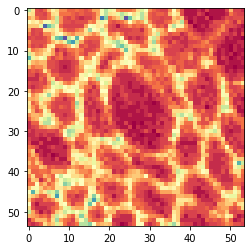

Epoch 225/250
36076/36076 [==============================] - 26s 709us/step - loss: 0.3210 - acc: 0.9992 - val_loss: 0.4254 - val_acc: 0.9953

Epoch 00225: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.4254006080058702, 'val_acc': 0.9952606669911088, 'loss': 0.3209713769898815, 'acc': 0.9992238614323636, 'lr': 1e-04}


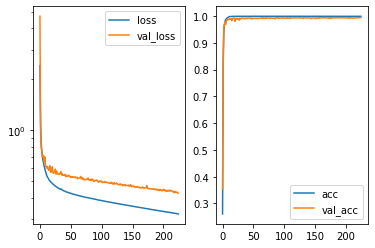

Predicted cell: MatureP1 Probability: [[1.]]
True Cell type: MatureP1
X [[0.3283561]]
True positional value X 0.3148148148148148
Y [[0.6914559]]
True positional value Y 0.6851851851851852
H [[0.37392998]]
True positional value H 0.35185185185185186
W [[0.25105268]]
True positional value W 0.2777777777777778


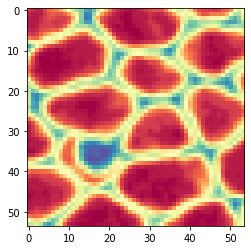

Epoch 226/250
36076/36076 [==============================] - 25s 706us/step - loss: 0.3206 - acc: 0.9993 - val_loss: 0.4331 - val_acc: 0.9932

Epoch 00226: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.4330844729903373, 'val_acc': 0.9931542972252833, 'loss': 0.3205982465902101, 'acc': 0.9992515807115314, 'lr': 1e-04}


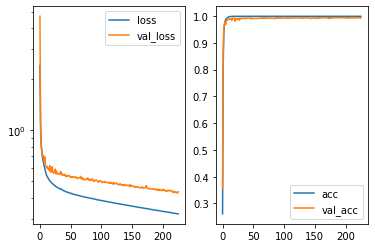

Predicted cell: NonMatureP1 Probability: [[0.99987054]]
True Cell type: NonMatureP1
X [[0.50216824]]
True positional value X 0.5
Y [[0.29521257]]
True positional value Y 0.3148148148148148
H [[0.2508108]]
True positional value H 0.2222222222222222
W [[0.38070688]]
True positional value W 0.4074074074074074


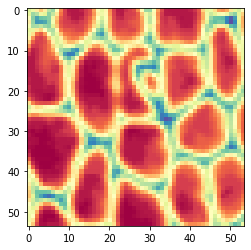

Epoch 227/250
36076/36076 [==============================] - 26s 709us/step - loss: 0.3202 - acc: 0.9993 - val_loss: 0.4291 - val_acc: 0.9937

Epoch 00227: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.42907716959259773, 'val_acc': 0.9936808907025233, 'loss': 0.32018219419125243, 'acc': 0.9992515807115314, 'lr': 1e-04}


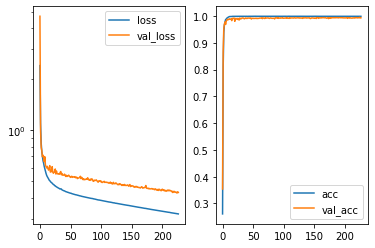

Predicted cell: MacroCheate Probability: [[1.]]
True Cell type: MacroCheate
X [[0.4858955]]
True positional value X 0.5
Y [[0.50587904]]
True positional value Y 0.5
H [[0.48035592]]
True positional value H 0.4444444444444444
W [[0.44805187]]
True positional value W 0.4444444444444444


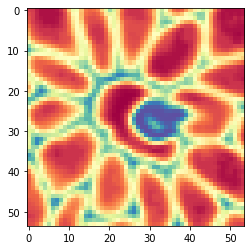

Epoch 228/250
36076/36076 [==============================] - 26s 709us/step - loss: 0.3198 - acc: 0.9993 - val_loss: 0.4318 - val_acc: 0.9937

Epoch 00228: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.4318051495603538, 'val_acc': 0.9936808896667396, 'loss': 0.31982343563193927, 'acc': 0.9993347384102501, 'lr': 1e-04}


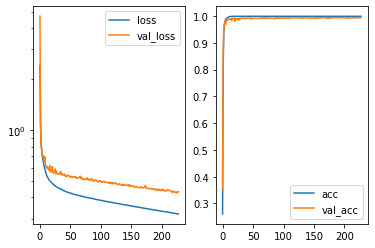

Predicted cell: MatureP1 Probability: [[0.9999211]]
True Cell type: MatureP1
X [[0.69699395]]
True positional value X 0.6851851851851852
Y [[0.7014899]]
True positional value Y 0.6851851851851852
H [[0.3561525]]
True positional value H 0.3148148148148148
W [[0.3186883]]
True positional value W 0.35185185185185186


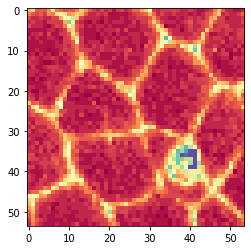

Epoch 229/250
36076/36076 [==============================] - 25s 707us/step - loss: 0.3193 - acc: 0.9993 - val_loss: 0.4273 - val_acc: 0.9942

Epoch 00229: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.4272751934657667, 'val_acc': 0.994207482108196, 'loss': 0.3193340712745407, 'acc': 0.9993347384102501, 'lr': 1e-04}


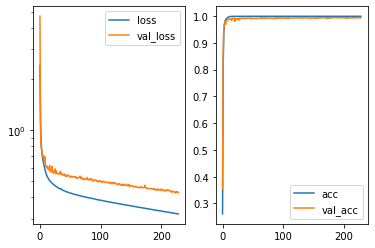

Predicted cell: MacroCheate Probability: [[0.9999932]]
True Cell type: MacroCheate
X [[0.6940229]]
True positional value X 0.6851851851851852
Y [[0.6744381]]
True positional value Y 0.6851851851851852
H [[0.59510785]]
True positional value H 0.5555555555555556
W [[0.43337733]]
True positional value W 0.42592592592592593


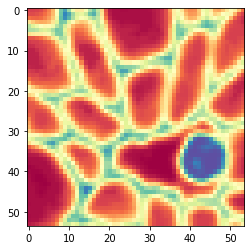

Epoch 230/250
36076/36076 [==============================] - 26s 708us/step - loss: 0.3188 - acc: 0.9992 - val_loss: 0.4301 - val_acc: 0.9926

Epoch 00230: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.4301321794322568, 'val_acc': 0.9926277047838268, 'loss': 0.31876284393255455, 'acc': 0.9992238614786252, 'lr': 1e-04}


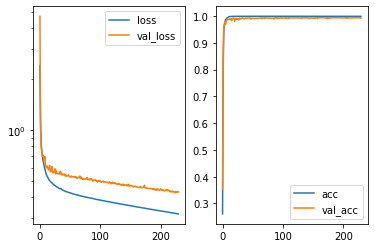

Predicted cell: Normal Probability: [[0.9999627]]
True Cell type: Normal
X [[0.49130708]]
True positional value X 0.5
Y [[0.50593036]]
True positional value Y 0.5
H [[0.2400355]]
True positional value H 0.2222222222222222
W [[0.36083478]]
True positional value W 0.25925925925925924


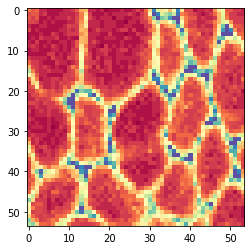

Epoch 231/250
36076/36076 [==============================] - 25s 707us/step - loss: 0.3183 - acc: 0.9994 - val_loss: 0.4221 - val_acc: 0.9942

Epoch 00231: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.4221230101874152, 'val_acc': 0.994207482108196, 'loss': 0.3183415140971097, 'acc': 0.9993901768760626, 'lr': 1e-04}


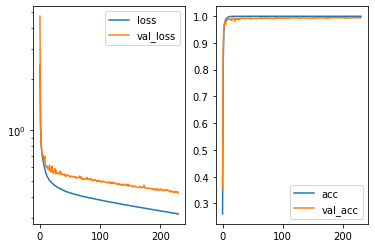

Predicted cell: Normal Probability: [[1.]]
True Cell type: Normal
X [[0.5136682]]
True positional value X 0.5
Y [[0.48108035]]
True positional value Y 0.5
H [[0.30853182]]
True positional value H 0.37037037037037035
W [[0.30260596]]
True positional value W 0.37037037037037035


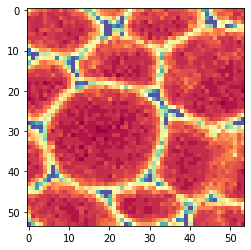

Epoch 232/250
36076/36076 [==============================] - 26s 710us/step - loss: 0.3180 - acc: 0.9993 - val_loss: 0.4276 - val_acc: 0.9942

Epoch 00232: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.42760820841400043, 'val_acc': 0.994207482108196, 'loss': 0.31798228696823017, 'acc': 0.9993070191773439, 'lr': 1e-04}


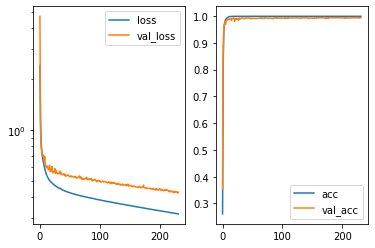

Predicted cell: Normal Probability: [[0.9785443]]
True Cell type: Normal
X [[0.4813671]]
True positional value X 0.5
Y [[0.5115147]]
True positional value Y 0.5
H [[0.25663155]]
True positional value H 0.25925925925925924
W [[0.20468406]]
True positional value W 0.2222222222222222


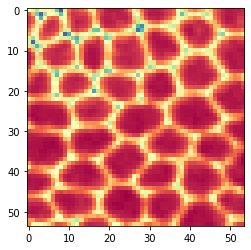

Epoch 233/250
36076/36076 [==============================] - 26s 714us/step - loss: 0.3176 - acc: 0.9994 - val_loss: 0.4215 - val_acc: 0.9947

Epoch 00233: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.421519667804712, 'val_acc': 0.9947340745496523, 'loss': 0.31759099934420704, 'acc': 0.9993624576431563, 'lr': 1e-04}


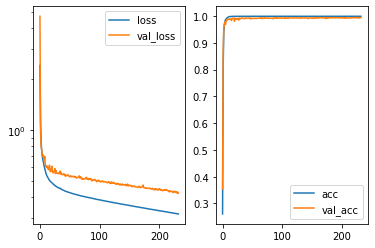

Predicted cell: Normal Probability: [[1.]]
True Cell type: Normal
X [[0.5099093]]
True positional value X 0.5
Y [[0.47337592]]
True positional value Y 0.5
H [[0.23682046]]
True positional value H 0.16666666666666666
W [[0.44334242]]
True positional value W 0.37037037037037035


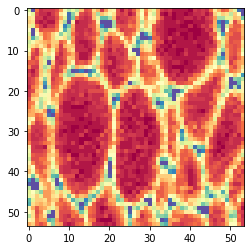

Epoch 234/250
36076/36076 [==============================] - 26s 712us/step - loss: 0.3172 - acc: 0.9993 - val_loss: 0.4267 - val_acc: 0.9942

Epoch 00234: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.4266567670746563, 'val_acc': 0.994207482108196, 'loss': 0.3172163614175684, 'acc': 0.9993070191773439, 'lr': 1e-04}


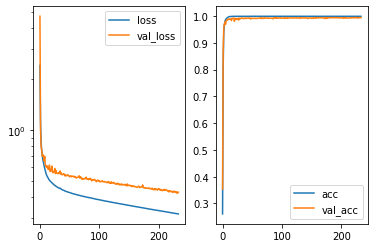

Predicted cell: Normal Probability: [[1.]]
True Cell type: Normal
X [[0.5062129]]
True positional value X 0.5
Y [[0.502978]]
True positional value Y 0.5
H [[0.3762932]]
True positional value H 0.6481481481481481
W [[0.30976215]]
True positional value W 0.46296296296296297


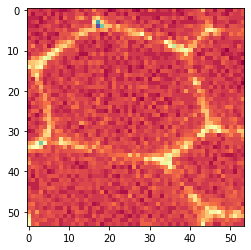

Epoch 235/250
36076/36076 [==============================] - 26s 711us/step - loss: 0.3166 - acc: 0.9993 - val_loss: 0.4265 - val_acc: 0.9942

Epoch 00235: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.42652744982291546, 'val_acc': 0.994207482108196, 'loss': 0.31660618233778537, 'acc': 0.9993347384102501, 'lr': 1e-04}


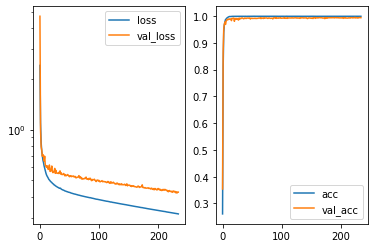

Predicted cell: MacroCheate Probability: [[0.99998915]]
True Cell type: MacroCheate
X [[0.29331]]
True positional value X 0.3148148148148148
Y [[0.48031726]]
True positional value Y 0.5
H [[0.7727729]]
True positional value H 0.7962962962962963
W [[0.5969339]]
True positional value W 0.6111111111111112


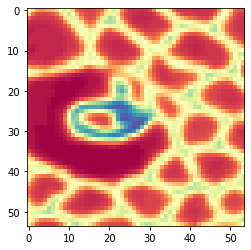

Epoch 236/250
36076/36076 [==============================] - 26s 710us/step - loss: 0.3162 - acc: 0.9993 - val_loss: 0.4243 - val_acc: 0.9937

Epoch 00236: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.4243033042451217, 'val_acc': 0.9936808896667396, 'loss': 0.3162263349757674, 'acc': 0.9992515807115314, 'lr': 1e-04}


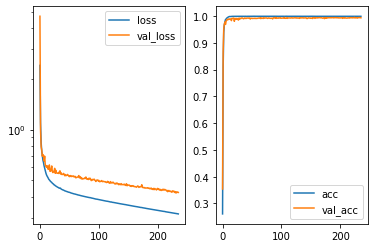

Predicted cell: MacroCheate Probability: [[1.]]
True Cell type: MacroCheate
X [[0.48704767]]
True positional value X 0.5
Y [[0.6757723]]
True positional value Y 0.6851851851851852
H [[0.5461865]]
True positional value H 0.5185185185185185
W [[0.71160245]]
True positional value W 0.7037037037037037


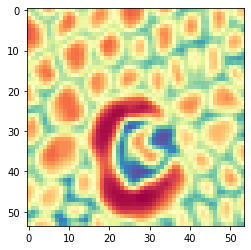

Epoch 237/250
36076/36076 [==============================] - 26s 709us/step - loss: 0.3159 - acc: 0.9993 - val_loss: 0.4280 - val_acc: 0.9937

Epoch 00237: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.4279562851797599, 'val_acc': 0.9936808896667396, 'loss': 0.3158738118460998, 'acc': 0.9992792999444376, 'lr': 1e-04}


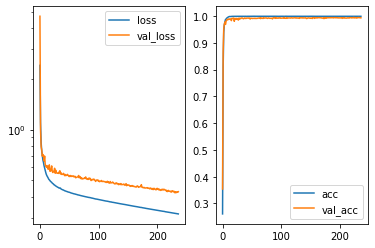

Predicted cell: MatureP1 Probability: [[1.]]
True Cell type: MatureP1
X [[0.51379645]]
True positional value X 0.5
Y [[0.4720178]]
True positional value Y 0.5
H [[0.22588135]]
True positional value H 0.18518518518518517
W [[0.2290479]]
True positional value W 0.18518518518518517


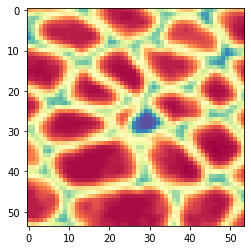

Epoch 238/250
36076/36076 [==============================] - 26s 710us/step - loss: 0.3154 - acc: 0.9993 - val_loss: 0.4244 - val_acc: 0.9937

Epoch 00238: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.42444729081513444, 'val_acc': 0.9936808896667396, 'loss': 0.3154459477779487, 'acc': 0.9993070191773439, 'lr': 1e-04}


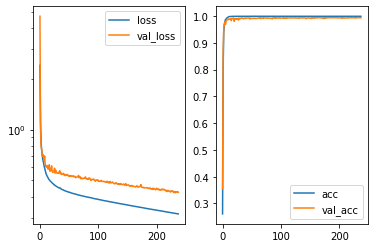

Predicted cell: MacroCheate Probability: [[1.]]
True Cell type: MacroCheate
X [[0.3007834]]
True positional value X 0.3148148148148148
Y [[0.68561083]]
True positional value Y 0.6851851851851852
H [[0.43096912]]
True positional value H 0.3888888888888889
W [[0.43907726]]
True positional value W 0.4444444444444444


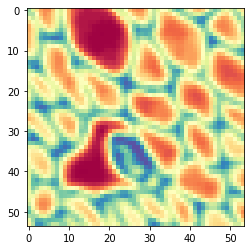

Epoch 239/250
36076/36076 [==============================] - 26s 711us/step - loss: 0.3149 - acc: 0.9993 - val_loss: 0.4231 - val_acc: 0.9942

Epoch 00239: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.42306620595077266, 'val_acc': 0.994207482108196, 'loss': 0.3148955995617004, 'acc': 0.9993070191773439, 'lr': 1e-04}


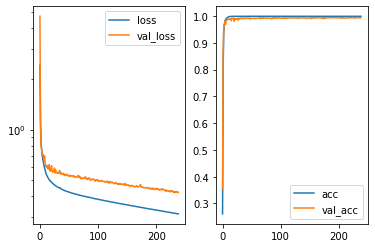

Predicted cell: MatureP1 Probability: [[1.]]
True Cell type: MatureP1
X [[0.5076143]]
True positional value X 0.5
Y [[0.3150109]]
True positional value Y 0.3148148148148148
H [[0.30091533]]
True positional value H 0.2962962962962963
W [[0.30999422]]
True positional value W 0.3333333333333333


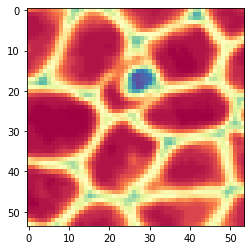

Epoch 240/250
36076/36076 [==============================] - 26s 715us/step - loss: 0.3143 - acc: 0.9993 - val_loss: 0.4247 - val_acc: 0.9942

Epoch 00240: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.4247404992611801, 'val_acc': 0.994207482108196, 'loss': 0.3143113303910154, 'acc': 0.9992792999444376, 'lr': 1e-04}


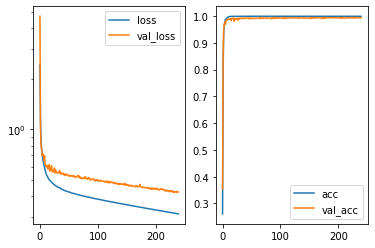

Predicted cell: Normal Probability: [[1.]]
True Cell type: Normal
X [[0.47275728]]
True positional value X 0.5
Y [[0.5064057]]
True positional value Y 0.5
H [[0.29467934]]
True positional value H 0.37037037037037035
W [[0.35541296]]
True positional value W 0.37037037037037035


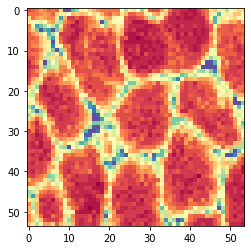

Epoch 241/250
36076/36076 [==============================] - 26s 715us/step - loss: 0.3140 - acc: 0.9993 - val_loss: 0.4216 - val_acc: 0.9947

Epoch 00241: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.4216287287051204, 'val_acc': 0.9947340755854361, 'loss': 0.31398500006946206, 'acc': 0.9992792999444376, 'lr': 1e-04}


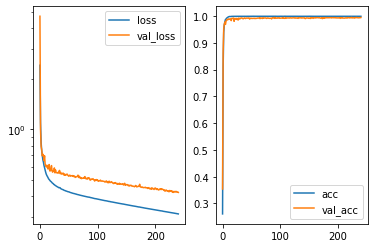

Predicted cell: MatureP1 Probability: [[0.9999994]]
True Cell type: MatureP1
X [[0.68175495]]
True positional value X 0.6851851851851852
Y [[0.30668303]]
True positional value Y 0.3148148148148148
H [[0.38605613]]
True positional value H 0.35185185185185186
W [[0.3629741]]
True positional value W 0.37037037037037035


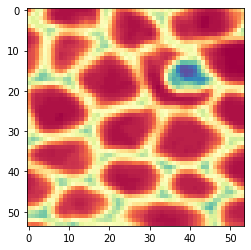

Epoch 242/250
36076/36076 [==============================] - 26s 715us/step - loss: 0.3137 - acc: 0.9993 - val_loss: 0.4267 - val_acc: 0.9926

Epoch 00242: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.42673790796987005, 'val_acc': 0.9926277047838268, 'loss': 0.3137165777354669, 'acc': 0.9993347384102501, 'lr': 1e-04}


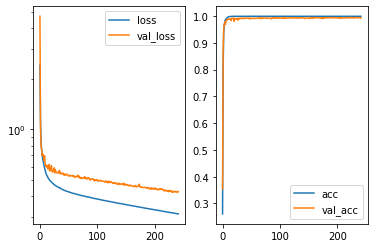

Predicted cell: NonMatureP1 Probability: [[0.9999957]]
True Cell type: NonMatureP1
X [[0.48691303]]
True positional value X 0.5
Y [[0.5098507]]
True positional value Y 0.5
H [[0.2831986]]
True positional value H 0.3333333333333333
W [[0.23314449]]
True positional value W 0.24074074074074073


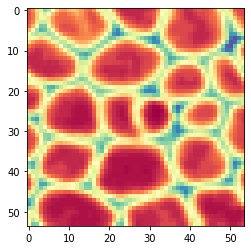

Epoch 243/250
36076/36076 [==============================] - 26s 713us/step - loss: 0.3134 - acc: 0.9993 - val_loss: 0.4207 - val_acc: 0.9942

Epoch 00243: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.42073957646376464, 'val_acc': 0.994207482108196, 'loss': 0.31339331785608704, 'acc': 0.9992792999444376, 'lr': 1e-04}


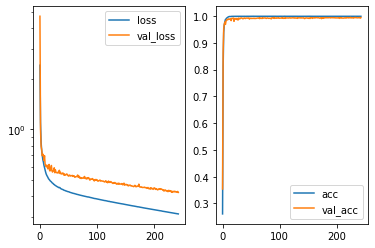

Predicted cell: Normal Probability: [[0.99999964]]
True Cell type: Normal
X [[0.5117386]]
True positional value X 0.5
Y [[0.50786436]]
True positional value Y 0.5
H [[0.17556188]]
True positional value H 0.18518518518518517
W [[0.1890319]]
True positional value W 0.16666666666666666


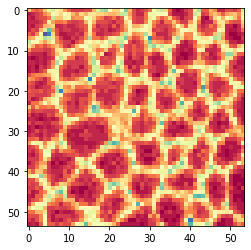

Epoch 244/250
36076/36076 [==============================] - 26s 712us/step - loss: 0.3126 - acc: 0.9993 - val_loss: 0.4222 - val_acc: 0.9937

Epoch 00244: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.4222399261105745, 'val_acc': 0.9936808896667396, 'loss': 0.3126138913643335, 'acc': 0.9993070191773439, 'lr': 1e-04}


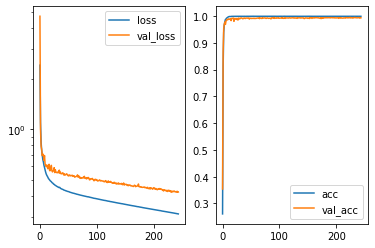

Predicted cell: MacroCheate Probability: [[1.]]
True Cell type: MacroCheate
X [[0.29793167]]
True positional value X 0.3148148148148148
Y [[0.50907135]]
True positional value Y 0.5
H [[0.3668366]]
True positional value H 0.3888888888888889
W [[0.46568084]]
True positional value W 0.48148148148148145


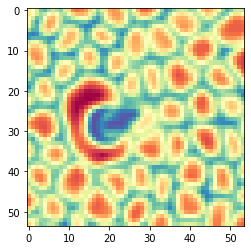

Epoch 245/250
36076/36076 [==============================] - 26s 712us/step - loss: 0.3127 - acc: 0.9992 - val_loss: 0.4276 - val_acc: 0.9926

Epoch 00245: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.4276270170221836, 'val_acc': 0.9926277047838268, 'loss': 0.3127100338513154, 'acc': 0.999196142245719, 'lr': 1e-04}


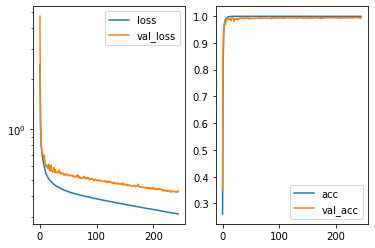

Predicted cell: MacroCheate Probability: [[1.]]
True Cell type: MacroCheate
X [[0.49088067]]
True positional value X 0.5
Y [[0.47084022]]
True positional value Y 0.5
H [[0.5231217]]
True positional value H 0.5
W [[0.8604156]]
True positional value W 0.8888888888888888


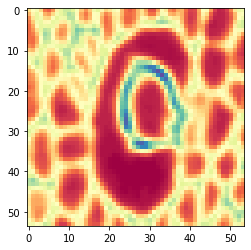

Epoch 246/250
36076/36076 [==============================] - 26s 715us/step - loss: 0.3119 - acc: 0.9993 - val_loss: 0.4199 - val_acc: 0.9932

Epoch 00246: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.41990605117522645, 'val_acc': 0.9931542972252833, 'loss': 0.31186234363828613, 'acc': 0.9993070191773439, 'lr': 1e-04}


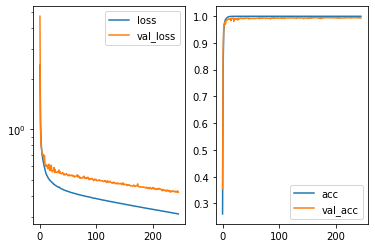

Predicted cell: MacroCheate Probability: [[1.]]
True Cell type: MacroCheate
X [[0.51230013]]
True positional value X 0.5
Y [[0.47574592]]
True positional value Y 0.5
H [[0.5163659]]
True positional value H 0.48148148148148145
W [[0.57086563]]
True positional value W 0.5925925925925926


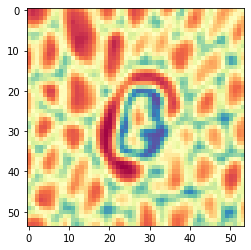

Epoch 247/250
36076/36076 [==============================] - 26s 714us/step - loss: 0.3115 - acc: 0.9993 - val_loss: 0.4204 - val_acc: 0.9942

Epoch 00247: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.4203879725091893, 'val_acc': 0.994207482108196, 'loss': 0.3115299053804905, 'acc': 0.9993347384102501, 'lr': 1e-04}


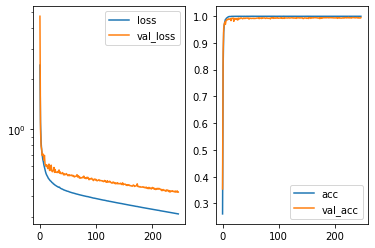

Predicted cell: MacroCheate Probability: [[0.9999964]]
True Cell type: MacroCheate
X [[0.5125349]]
True positional value X 0.5
Y [[0.49307668]]
True positional value Y 0.5
H [[0.30913052]]
True positional value H 0.3333333333333333
W [[0.34407526]]
True positional value W 0.35185185185185186


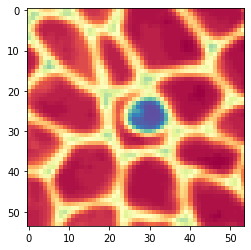

Epoch 248/250
36076/36076 [==============================] - 26s 716us/step - loss: 0.3116 - acc: 0.9992 - val_loss: 0.4268 - val_acc: 0.9932

Epoch 00248: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.4268181344406927, 'val_acc': 0.9931542972252833, 'loss': 0.31157948243431643, 'acc': 0.9992238614786252, 'lr': 1e-04}


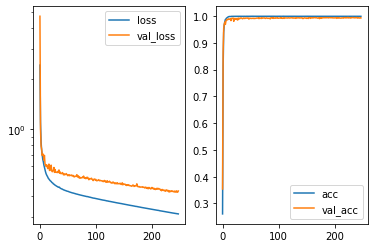

Predicted cell: MatureP1 Probability: [[0.9999999]]
True Cell type: MatureP1
X [[0.53517735]]
True positional value X 0.5
Y [[0.688843]]
True positional value Y 0.6851851851851852
H [[0.35205275]]
True positional value H 0.35185185185185186
W [[0.328453]]
True positional value W 0.3148148148148148


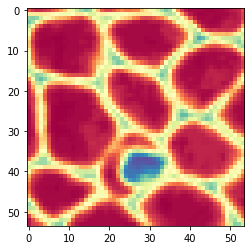

Epoch 249/250
36076/36076 [==============================] - 26s 710us/step - loss: 0.3109 - acc: 0.9993 - val_loss: 0.4201 - val_acc: 0.9937

Epoch 00249: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.4200800882162955, 'val_acc': 0.9936808896667396, 'loss': 0.3108644517988862, 'acc': 0.9993070191773439, 'lr': 1e-04}


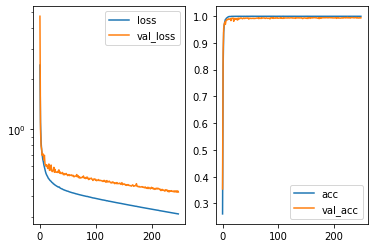

Predicted cell: Normal Probability: [[0.9999982]]
True Cell type: Normal
X [[0.51131177]]
True positional value X 0.5
Y [[0.48977742]]
True positional value Y 0.5
H [[0.31547844]]
True positional value H 0.37037037037037035
W [[0.33709157]]
True positional value W 0.2777777777777778


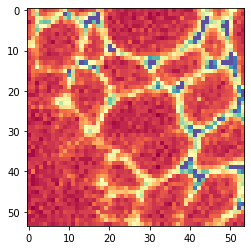

Epoch 250/250
36076/36076 [==============================] - 26s 714us/step - loss: 0.3103 - acc: 0.9994 - val_loss: 0.4187 - val_acc: 0.9926

Epoch 00250: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/OSnetbin2d47V0f48.h5
{'val_loss': 0.41870054280902286, 'val_acc': 0.9926277047838268, 'loss': 0.3103402572469101, 'acc': 0.9994456153418751, 'lr': 1e-04}


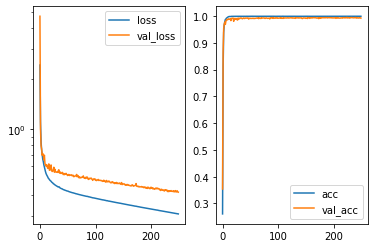

Predicted cell: MacroCheate Probability: [[0.9999994]]
True Cell type: MacroCheate
X [[0.4710134]]
True positional value X 0.5
Y [[0.3011672]]
True positional value Y 0.3148148148148148
H [[0.24487567]]
True positional value H 0.18518518518518517
W [[0.18091908]]
True positional value W 0.18518518518518517


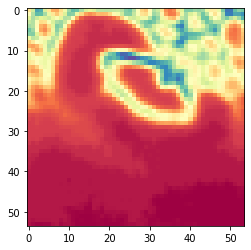

In [5]:
Train = NEATStaticDetection(config, NpzDirectory,KeyCategories, KeyCord,TrainModelName,ValidationModelName, ModelDir, Model_Name, show = show, yoloV0 = yoloV0)

Train.loadData()

Train.TrainModel()
